# Facebook Interview Questions
Leetcode (numbered)

Other technical interview questions:
* zero out rows and columns that contain zero in a 2D matrix.
* Remove duplicates from array and
* Implement dot product (`sum([i*j for (i, j) in zip(list1, list2)])`)
* stack, queue
* LeetCode #20 but returning 0/1 instead of True/False (https://leetcode.com/problems/valid-parentheses/)
* Parse an nginx log file and sort based on most frequent lines
* Access a github API and count number of repos with specific words; learn an obscure API
* Let struct A{ int a; char b;...}. How can you get the offset of a, b

Interview questions:
* What is your proudest technical accomplishment?
* Describe a situation where you had to use persuasion to get someone to do something. What was effective?
* Tell me about a time when you had to deal with pushback on your ideas from superior colleagues or stakeholders.
* Describe when you deal with someone difficult, how you handle it?

In [4]:
from typing import List, Optional

In [14]:
# given array of continuous numbers differing by 1, find missing numbers in the sequence
# t.c. O(n+(max(nums)−min(nums))), space O((max(nums)−min(nums))) - t.c. can be huge, consider intervals
# [1, 2, 4, 5, 7] - 3, 6 are missing
from typing import List
def find_missing(nums: List) -> List:
    # edge cases
    if not (hasattr(nums, "__getitem__") and hasattr(nums, "__len__")):    # if we use Iterable instead of List
        raise TypeError("Must be a sequence with indexing.")               # needed to avoid Iterator - no len()
    if not isinstance(nums, Iterable):
        raise TypeError('Check type')
    if not all(isinstance(x, int) for x in nums):
        raise TypeError("All elements must be integers")
        
    if len(nums) < 2:
        return []
    # initiate vars
    m = []
    # iterate
    for idx in range(len(nums)-1):
        if nums[idx+1] - nums[idx] > 1:
            m.extend(list(range(nums[idx]+1, nums[idx+1])))
    return m    


nums = [1, 2, 4, 5, 7]
find_missing(nums)

[3, 6]

In [16]:
# longest_increasing_subsequence in a list
def longest_increasing(nums: List) -> int:
    # edge cases
    if not (hasattr(nums, "__getitem__") and hasattr(nums, "__len__")):    # if we use Iterable instead of List
        raise TypeError("Must be a sequence with indexing.")
    
    if not all(isinstance(x, (int, float)) for x in nums):
        raise TypeError("All elements must be numeric.")
        
    if not isinstance(nums, list): raise TypeError('m')
    if not nums:
        return 0
    elif len(nums) == 1:
        return 1
        
    # initiate
    max_len, cur_len = 1, 1
    # iterate
    for i in range(len(nums)-1):
        if nums[i+1] > nums[i]:
            cur_len += 1
            max_len = max(max_len, cur_len)
        else:
            cur_len = 1
    return max_len
        
    
nums = [1, 2, 4, 3, 5, 7, 9, 3, 2, 1, 2]
longest_increasing(nums)

4

In [2]:
from typing import List
def zero_out(matrix: List[List[int]]) -> List[List[int]]:
    """
    Zeroes out all rows and columns of a 2D matrix where there is a zero.
    Args:
    matrix: A 2D matrix.
    Returns:
    A new 2D matrix with all rows and columns that contain a zero zeroed out.
    """
    # edge cases
    
    # 1. Validate that matrix is not empty and truly a list of lists
    if not matrix:
        return []
    if not isinstance(matrix, list) or any(not isinstance(row, list) for row in matrix):
        raise TypeError('Matrix must be a non-empty list of lists.')

    # (Optional) Check all elements are integers:
    if any(any(not isinstance(x, int) for x in row) for row in matrix):
        raise TypeError("All elements must be integers.")

    # 2. Make a copy if you really want a "new" matrix
    new_matrix = [row[:] for row in matrix]
        
    # initiate
    zero_rows = set()
    zero_cols = set()
        
    # iterate
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if j in zero_cols: continue
            if matrix[i][j]==0:
                zero_rows.add(i)
                zero_cols.add(j)
                
    for i in zero_rows:
        matrix[i] = [0]*len(matrix[0])
    for j in zero_cols:
        for i in range(len(matrix)):
            matrix[i][j]=0
            
    return matrix


matrix = [
  [1, 2, 3],
  [4, 5, 0],
  [6, 7, 8]
]
zero_out(matrix)

[[1, 2, 0], [0, 0, 0], [6, 7, 0]]

https://stackoverflow.com/questions/61212929/getting-the-count-of-github-repositories-for-a-search-query

# Copied from Google (also used in Facebook interviews)

## 5. Longest Palindromic Substring
Given a string s, return the longest palindromic substring in s.
A string is called a palindrome string if the reverse of that string is the same as the original string.

Example 1:
Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.

Example 2:
Input: s = "cbbd"
Output: "bb"

Constraints:

1 <= s.length <= 1000
s consist of only digits and English letters.

In [ ]:
# time = O(n^2) because we iterate n centers O(n), expanding each left and right O(n)
# space = O(1)
def longest_ps(s: str) -> str:
    if not isinstance(s, str):
        raise ValueError("Input must be a string.")
    if len(s) < 2:
        return s

    def expand_center(left: int, right: int) -> tuple:        
        while left >= 0 and right < len(s) and s[left] == s[right]: # expand until palindrome
            left -= 1
            right += 1        
        return left + 1, right - 1        # return bounds of palindrome

    start, end = 0, 0                     # start and end of longest palindrome
    for i in range(len(s)):
        # Check for odd-length palindromes (single character center)
        left1, right1 = expand_center(i, i)
        # Check for even-length palindromes (two character center)
        left2, right2 = expand_center(i, i + 1)

        # Update the longest palindrome found
        if right1 - left1 > end - start:
            start, end = left1, right1
        if right2 - left2 > end - start:
            start, end = left2, right2

    return s[start:end + 1]


## 34. Find First and Last Position of Element in Sorted Array
Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value.

If target is not found in the array, return [-1, -1].

You must write an algorithm with O(log n) runtime complexity.

Example 1:
Input: nums = [5,7,7,8,8,10], target = 8
Output: [3,4]

Example 2:
Input: nums = [5,7,7,8,8,10], target = 6
Output: [-1,-1]

Example 3:
Input: nums = [], target = 0
Output: [-1,-1]

Constraints:

0 <= nums.length <= 105
-109 <= nums[i] <= 109
nums is a non-decreasing array.
-109 <= target <= 109

Algorithm (bin search)

Define a function called findBound which takes three arguments: the array, the target to search for, and a boolean value isFirst which indicates if we are trying to find the first or the last occurrence of target.
We use 2 variables to keep track of the subarray that we are scanning. Let's call them begin and end. Initially, begin is set to 0 and end is set to the last index of the array.  
We iterate until begin is greater than or equal to end.  
At each step, we calculate the middle element mid = (begin + end) / 2. We use the value of the middle element to decide which half of the array we need to search.  
nums[mid] == target  
isFirst is true ~ This implies that we are trying to find the first occurrence of the element. If mid == begin or nums[mid - 1] != target, then we return mid as the first occurrence of the target. Otherwise, we update end = mid - 1
isFirst is false ~ This implies we are trying to find the last occurrence of the element. If mid == end or nums[mid + 1] != target, then we return mid as the last occurrence of the target. Otherwise, we update begin = mid + 1
nums[mid] > target ~ We update end = mid - 1 since we must discard the right side of the array as the middle element is greater than target.  
nums[mid] < target ~ We update begin = mid + 1 since we must discard the left side of the array as the middle element is less than target.  
We return a value of -1 at the end of our function which indicates that target was not found in the array.

In [ ]:
# time = O(logN), space = O(1)
class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        
        lower_bound = self.findBound(nums, target, True)
        if (lower_bound == -1):
            return [-1, -1]
        
        upper_bound = self.findBound(nums, target, False)
        
        return [lower_bound, upper_bound]
        
    def findBound(self, nums: List[int], target: int, isFirst: bool) -> int:
        
        N = len(nums)
        begin, end = 0, N - 1
        while begin <= end:
            mid = int((begin + end) / 2)    
            
            if nums[mid] == target:
                
                if isFirst:
                    # we found our lower bound
                    if mid == begin or nums[mid - 1] < target:
                        return mid
                    # search on left side for bound
                    end = mid - 1
                else:                    
                    # we found our upper bound.
                    if mid == end or nums[mid + 1] > target:
                        return mid
                    # search on right side for bound
                    begin = mid + 1
            
            elif nums[mid] > target:
                end = mid - 1
            else:
                begin = mid + 1
        
        return -1

## 56. Merge Intervals
Given an array of intervals where intervals[i] = [starti, endi], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

Example 1:
Input: intervals = [[1,3],[2,6],[8,10],[15,18]]
Output: [[1,6],[8,10],[15,18]]
Explanation: Since intervals [1,3] and [2,6] overlap, merge them into [1,6].

Example 2:
Input: intervals = [[1,4],[4,5]]
Output: [[1,5]]
Explanation: Intervals [1,4] and [4,5] are considered overlapping.

Constraints:

1 <= intervals.length <= 104
intervals[i].length == 2
0 <= starti <= endi <= 104

Algorithm

First, we sort the list as described. Then, we insert the first interval into our merged list and continue considering each interval in turn as follows: If the current interval begins after the previous interval ends, then they do not overlap and we can append the current interval to merged. Otherwise, they do overlap, and we merge them by updating the end of the previous interval if it is less than the end of the current interval.

A simple proof by contradiction shows that this algorithm always produces the correct answer. First, suppose that the algorithm at some point fails to merge two intervals that should be merged. This would imply that there exists some triple of indices ii, jj, and kk in a list of intervals \text{ints}ints such that i < j < ki<j<k and (\text{ints[i]}ints[i], \text{ints[k]}ints[k]) can be merged, but neither (\text{ints[i]}ints[i], \text{ints[j]}ints[j]) nor (\text{ints[j]}ints[j], \text{ints[k]}ints[k]) can be merged. From this scenario follow several inequalities:

\begin{aligned} \text{ints[i].end} < \text{ints[j].start} \\ \text{ints[j].end} < \text{ints[k].start} \\ \text{ints[i].end} \geq \text{ints[k].start} \\ \end{aligned} 
ints[i].end<ints[j].start
ints[j].end<ints[k].start
ints[i].end≥ints[k].start
​
 

We can chain these inequalities (along with the following inequality, implied by the well-formedness of the intervals: \text{ints[j].start} \leq \text{ints[j].end}ints[j].start≤ints[j].end) to demonstrate a contradiction:

\begin{aligned} \text{ints[i].end} < \text{ints[j].start} \leq \text{ints[j].end} < \text{ints[k].start} \\ \text{ints[i].end} \geq \text{ints[k].start} \end{aligned} 
ints[i].end<ints[j].start≤ints[j].end<ints[k].start
ints[i].end≥ints[k].start
​
 

Therefore, all mergeable intervals must occur in a contiguous run of the sorted list.

In [ ]:
# time = O(nlogn), space = O(n)
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:

        intervals.sort(key=lambda x: x[0])

        merged = []
        for interval in intervals:
            # if the list of merged intervals is empty or if the current
            # interval does not overlap with the previous, simply append it.
            if not merged or merged[-1][1] < interval[0]:
                merged.append(interval)
            else:
            # otherwise, there is overlap, so we merge the current and previous
            # intervals.
                merged[-1][1] = max(merged[-1][1], interval[1])

        return merged

## 297. Serialize and Deserialize Binary Tree
Serialization is the process of converting a data structure or object into a sequence of bits so that it can be stored in a file or memory buffer, or transmitted across a network connection link to be reconstructed later in the same or another computer environment.

Design an algorithm to serialize and deserialize a binary tree. There is no restriction on how your serialization/deserialization algorithm should work. You just need to ensure that a binary tree can be serialized to a string and this string can be deserialized to the original tree structure.

Clarification: The input/output format is the same as how LeetCode serializes a binary tree. You do not necessarily need to follow this format, so please be creative and come up with different approaches yourself.

Example 1:
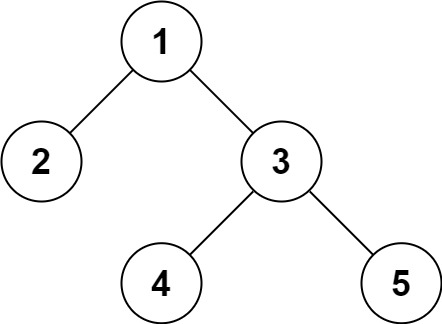
Input: root = [1,2,3,null,null,4,5]
Output: [1,2,3,null,null,4,5]

Example 2:
Input: root = []
Output: []

Constraints:

The number of nodes in the tree is in the range [0, 104].
-1000 <= Node.val <= 1000

Intuition
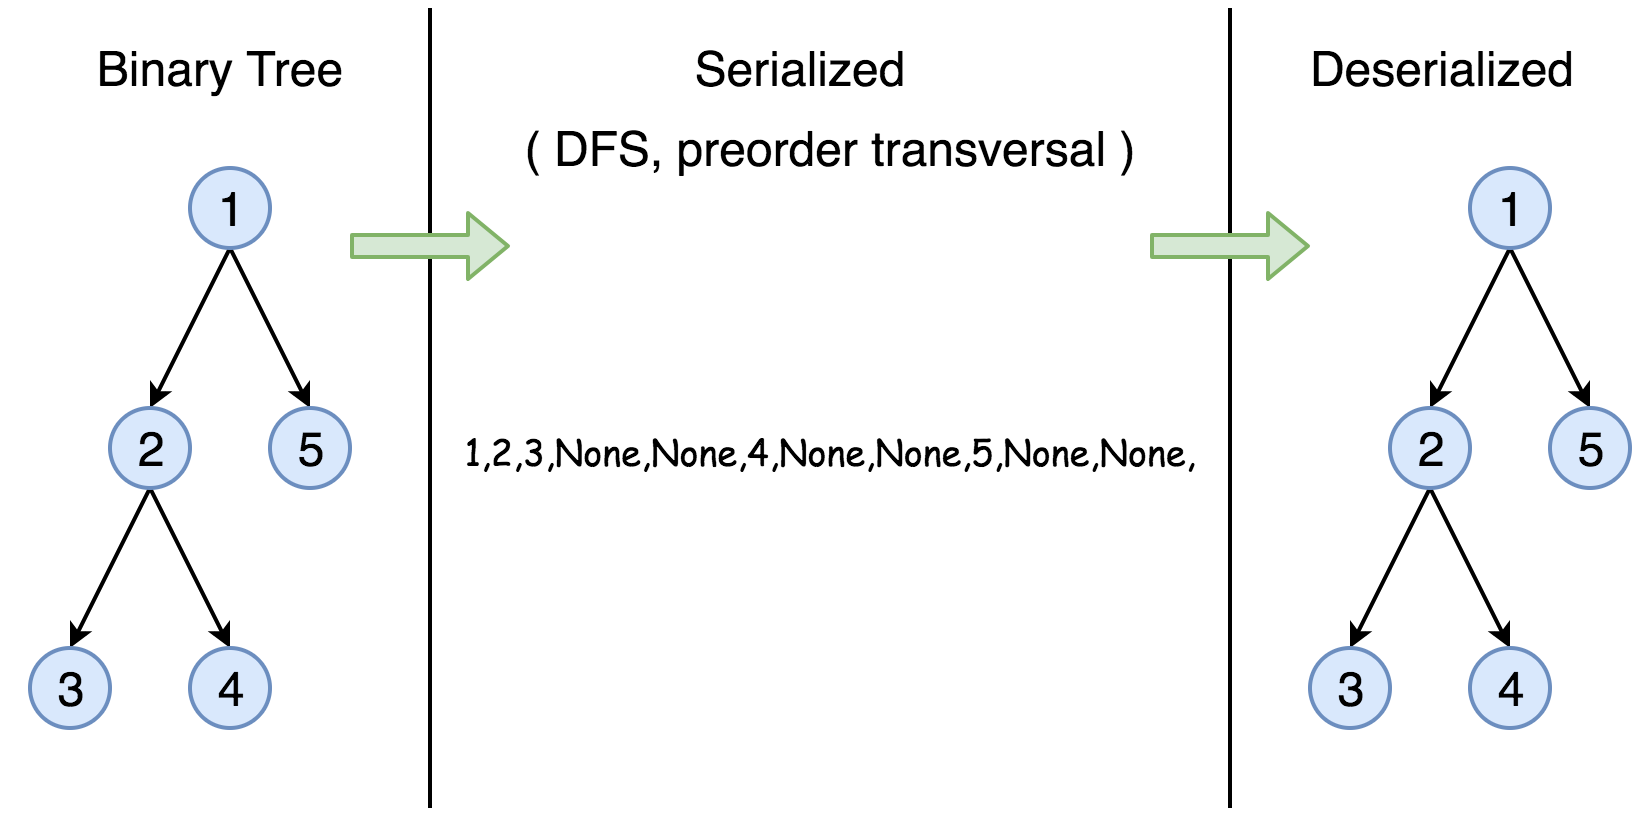
The serialization of a Binary Search Tree is essentially to encode its values and more importantly its structure. One can traverse the tree to accomplish the above task. And it is well know that we have two general strategies to do so:

Breadth First Search (BFS)

We scan through the tree level by level, following the order of height, from top to bottom. The nodes on higher level would be visited before the ones with lower levels.

Depth First Search (DFS)

In this strategy, we adopt the depth as the priority, so that one would start from a root and reach all the way down to certain leaf, and then back to root to reach another branch.

The DFS strategy can further be distinguished as preorder, inorder, and postorder depending on the relative order among the root node, left node and right node.

In this task, however, the DFS strategy is more adapted for our needs, since the linkage among the adjacent nodes is naturally encoded in the order, which is rather helpful for the later task of deserialization.

Therefore, in this solution, we demonstrate an example with the preorder DFS strategy.

In [ ]:
# time = space = O(n)
# Depth First Search (DFS)
class TreeNode(object):
    """ Definition of a binary tree node."""
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
        
# Serialization 
class Codec:

    def serialize(self, root):
        """ Encodes a tree to a single string.
        :type root: TreeNode
        :rtype: str
        """
        def rserialize(root, string):
            """ a recursive helper function for the serialize() function."""
            # check base case
            if root is None:
                string += 'None,'
            else:
                string += str(root.val) + ','
                string = rserialize(root.left, string)
                string = rserialize(root.right, string)
            return string
        
        return rserialize(root, '')
    
    
# Deserialization 
class Codec:

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        :type data: str
        :rtype: TreeNode
        """
        def rdeserialize(l):
            """ a recursive helper function for deserialization."""
            if l[0] == 'None':
                l.pop(0)
                return None
                
            root = TreeNode(l[0])
            l.pop(0)
            root.left = rdeserialize(l)
            root.right = rdeserialize(l)
            return root

        data_list = data.split(',')
        root = rdeserialize(data_list)
        return root

## 247. Strobogrammatic Number II
Given an integer n, return all the strobogrammatic numbers that are of length n. You may return the answer in any order.
A strobogrammatic number is a number that looks the same when rotated 180 degrees (looked at upside down).

Example 1:
Input: n = 2
Output: ["11","69","88","96"]

Example 2:
Input: n = 1
Output: ["0","1","8"]

Constraints:

1 <= n <= 14

Hint:  
Try to use recursion and notice that it should recurse with n - 2 instead of n - 1.

Algorithm

Initialize a data structure reversiblePairs, which contains all pairs of reversible digits.

Call and return the recursive function, generateStroboNumbers(n, finalLength), where the first argument indicates that the current call will generate all n-digit strobogrammatic numbers. The second argument indicates the length of the final strobogrammatic numbers that we will generate and will be used to check if we can add '0' to the beginning and end of a number.

Create a function generateStroboNumbers(n, finalLength) which will return all strobogrammatic numbers of n-digits:

Check for base cases, if n == 0 return an array with an empty string [""], otherwise if n == 1 return ["0", "1", "8"].
Call generateStroboNumbers(n - 2, finalLength) to get all the strobogrammatic numbers of (n-2) digits and store them in subAns.
Initialize an empty array currStroboNums to store strobogrammatic numbers of n-digits.
For each number in prevStroboNums we append all reversiblePairs at the beginning and the end except when the current reversible pair is '00' and n == finalLength (because we can't append '0' at the beginning of a number) and push this new number in ans.
At the end of the function, return all the strobogrammatic numbers, i.e. currStroboNums

In [167]:
# time = N⋅5^(N/2+1), space = N⋅5^(N/2). Iterative approach (level order traversal) has the same complexity 
def findStrobogrammatic(n: int) -> List[str]:
    reversible_pairs = [
        ['0', '0'], ['1', '1'], 
        ['6', '9'], ['8', '8'], ['9', '6']
    ]

    def generate_strobo_numbers(n, final_length):
        if n == 0:
            # 0-digit strobogrammatic number is an empty string.
            return [""]

        if n == 1:
            # 1-digit strobogrammatic numbers.
            return ["0", "1", "8"]

        prev_strobo_nums = generate_strobo_numbers(n - 2, final_length)
        curr_strobo_nums = []

        for prev_strobo_num in prev_strobo_nums:
            for pair in reversible_pairs:
                if pair[0] != '0' or n != final_length:
                    curr_strobo_nums.append(pair[0] + prev_strobo_num + pair[1])

        return curr_strobo_nums

    return generate_strobo_numbers(n, n)

## 17. Letter Combinations of a Phone Number
Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.
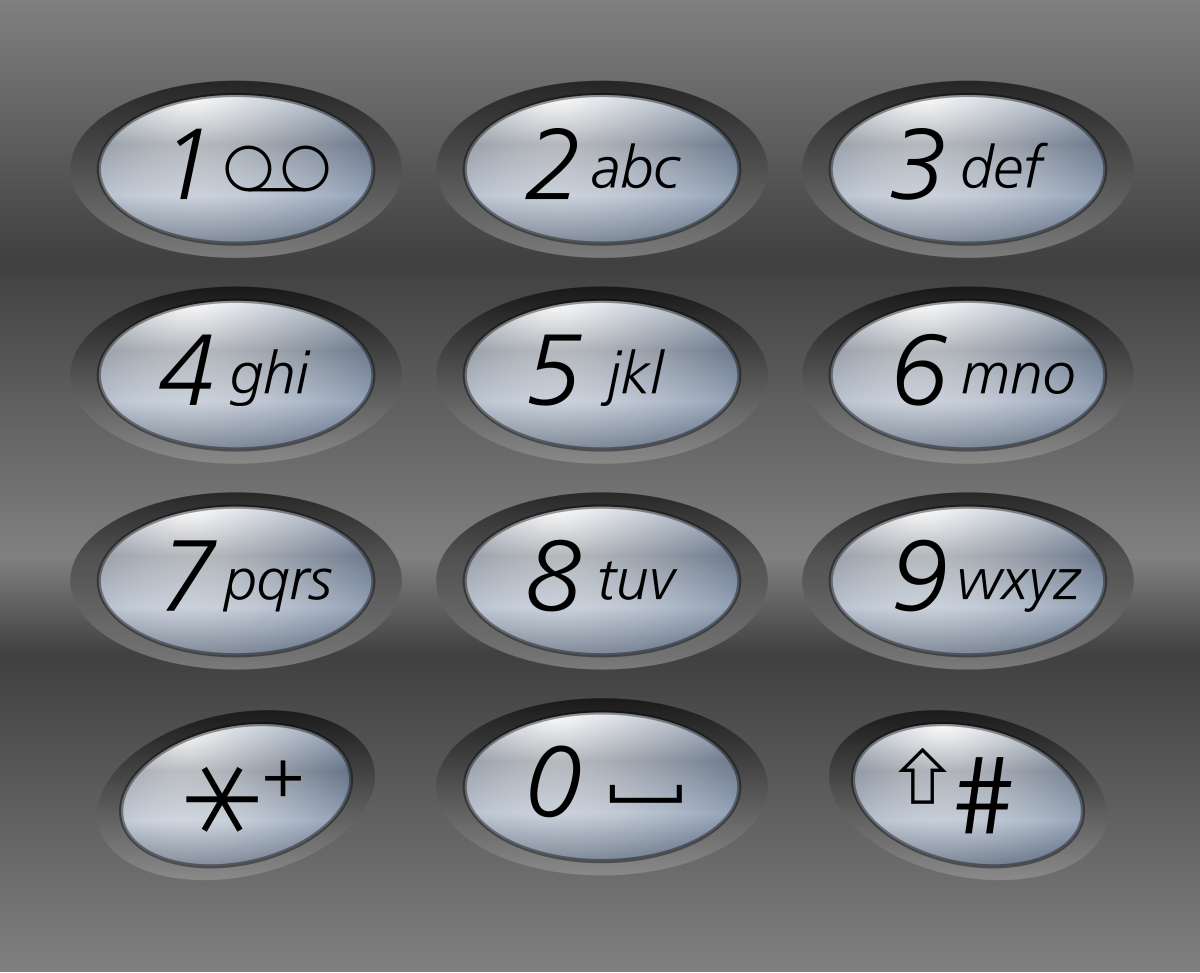
A mapping of digits to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.

Example 1:
Input: digits = "23"
Output: ["ad","ae","af","bd","be","bf","cd","ce","cf"]

Example 2:
Input: digits = ""
Output: []

Example 3:
Input: digits = "2"
Output: ["a","b","c"]

Constraints:

0 <= digits.length <= 4
digits[i] is a digit in the range ['2', '9'].

Algorithm

As mentioned previously, we need to lock-in letters when we generate new letters. The easiest way to save state like this is to use recursion. Our algorithm will be as follows:

If the input is empty, return an empty array.

Initialize a data structure (e.g. a hash map) that maps digits to their letters, for example, mapping "6" to "m", "n", and "o".

Use a backtracking function to generate all possible combinations.

The function should take 2 primary inputs: the current combination of letters we have, path, and the index we are currently checking.
As a base case, if our current combination of letters is the same length as the input digits, that means we have a complete combination. Therefore, add it to our answer, and backtrack.
Otherwise, get all the letters that correspond with the current digit we are looking at, digits[index].
Loop through these letters. For each letter, add the letter to our current path, and call backtrack again, but move on to the next digit by incrementing index by 1.
Make sure to remove the letter from path once finished with it.

In [ ]:
# time = O(N * (4^N)), where N = len of digits, space = O(n)
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        # If the input is empty, immediately return an empty answer array
        if len(digits) == 0: 
            return []
        
        # Map all the digits to their corresponding letters
        letters = {"2": "abc", "3": "def", "4": "ghi", "5": "jkl", 
                   "6": "mno", "7": "pqrs", "8": "tuv", "9": "wxyz"}
        
        def backtrack(index, path):
            # If the path is the same length as digits, we have a complete combination
            if len(path) == len(digits):
                combinations.append("".join(path))
                return # Backtrack
            
            # Get the letters that the current digit maps to, and loop through them
            possible_letters = letters[digits[index]]
            for letter in possible_letters:
                # Add the letter to our current path
                path.append(letter)
                # Move on to the next digit
                backtrack(index + 1, path)
                # Backtrack by removing the letter before moving onto the next
                path.pop()

        # Initiate backtracking with an empty path and starting index of 0
        combinations = []
        backtrack(0, [])
        return combinations

In [ ]:
# from comments
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        lookup = {
            "2": ["a", "b", "c"],
            "3": ["d", "e", "f"],
            "4": ["g", "h", "i"],
            "5": ["j", "k", "l"],
            "6": ["m", "n", "o"],
            "7": ["p", "q", "r", "s"],
            "8": ["t", "u", "v"],
            "9": ["w", "x", "y", "z"]
        }
        
        letter_lists = []
        for ch in digits:
            letter_lists.append(lookup[ch])
            
        while len(letter_lists) > 1:
            l1 = letter_lists.pop()
            l2 = letter_lists.pop()
            combos = []
            for i in l1:
                for j in l2:
                    combos.append(j + i)
            letter_lists.append(combos)
            
        return [] if not letter_lists else letter_lists[0]

## 146. LRU Cache
Design a data structure that follows the constraints of a Least Recently Used (LRU) cache. Implement the LRUCache class:

LRUCache(int capacity) Initialize the LRU cache with positive size capacity.
int get(int key) Return the value of the key if the key exists, otherwise return -1.
void put(int key, int value) Update the value of the key if the key exists. Otherwise, add the key-value pair to the cache. If the number of keys exceeds the capacity from this operation, evict the least recently used key.
The functions get and put must each run in O(1) average time complexity.

Example 1:

Input
["LRUCache", "put", "put", "get", "put", "get", "put", "get", "get", "get"]
[[2], [1, 1], [2, 2], [1], [3, 3], [2], [4, 4], [1], [3], [4]]
Output
[null, null, null, 1, null, -1, null, -1, 3, 4]

Explanation
LRUCache lRUCache = new LRUCache(2);
lRUCache.put(1, 1); // cache is {1=1}
lRUCache.put(2, 2); // cache is {1=1, 2=2}
lRUCache.get(1);    // return 1
lRUCache.put(3, 3); // LRU key was 2, evicts key 2, cache is {1=1, 3=3}
lRUCache.get(2);    // returns -1 (not found)
lRUCache.put(4, 4); // LRU key was 1, evicts key 1, cache is {4=4, 3=3}
lRUCache.get(1);    // return -1 (not found)
lRUCache.get(3);    // return 3
lRUCache.get(4);    // return 4

Constraints:

1 <= capacity <= 3000
0 <= key <= 104
0 <= value <= 105
At most 2 * 105 calls will be made to get and put

Intuition

We're asked to implement the structure which provides the following operations in \mathcal{O}(1)O(1) time :

Get the key / Check if the key exists

Put the key

Delete the first added key

The first two operations in O(1) time are provided by the standard hashmap, and the last one - by linked list

In [ ]:
class LRUCache(object):

    def __init__(self, capacity):
        """
        :type capacity: int
        """
        

    def get(self, key):
        """
        :type key: int
        :rtype: int
        """
        

    def put(self, key, value):
        """
        :type key: int
        :type value: int
        :rtype: None
        """


# Your LRUCache object will be instantiated and called as such:
# obj = LRUCache(capacity)
# param_1 = obj.get(key)
# obj.put(key,value)

In [ ]:
from collections import OrderedDict
class LRUCache(OrderedDict):

    def __init__(self, capacity):
        """
        :type capacity: int
        """
        self.capacity = capacity

    def get(self, key):
        """
        :type key: int
        :rtype: int
        """
        if key not in self:
            return - 1
        
        self.move_to_end(key)
        return self[key]

    def put(self, key, value):
        """
        :type key: int
        :type value: int
        :rtype: void
        """
        if key in self:
            self.move_to_end(key)
        self[key] = value
        if len(self) > self.capacity:
            self.popitem(last = False)

In [ ]:
# time = O(1), space = O(capacity)
class DLinkedNode(): 
    def __init__(self):
        self.key = 0
        self.value = 0
        self.prev = None
        self.next = None
            
class LRUCache():
    def _add_node(self, node):
        """
        Always add the new node right after head.
        """
        node.prev = self.head
        node.next = self.head.next

        self.head.next.prev = node
        self.head.next = node

    def _remove_node(self, node):
        """
        Remove an existing node from the linked list.
        """
        prev = node.prev
        new = node.next

        prev.next = new
        new.prev = prev

    def _move_to_head(self, node):
        """
        Move certain node in between to the head.
        """
        self._remove_node(node)
        self._add_node(node)

    def _pop_tail(self):
        """
        Pop the current tail.
        """
        res = self.tail.prev
        self._remove_node(res)
        return res

    def __init__(self, capacity):
        """
        :type capacity: int
        """
        self.cache = {}
        self.size = 0
        self.capacity = capacity
        self.head, self.tail = DLinkedNode(), DLinkedNode()

        self.head.next = self.tail
        self.tail.prev = self.head
        

    def get(self, key):
        """
        :type key: int
        :rtype: int
        """
        node = self.cache.get(key, None)
        if not node:
            return -1

        # move the accessed node to the head;
        self._move_to_head(node)

        return node.value

    def put(self, key, value):
        """
        :type key: int
        :type value: int
        :rtype: void
        """
        node = self.cache.get(key)

        if not node: 
            newNode = DLinkedNode()
            newNode.key = key
            newNode.value = value

            self.cache[key] = newNode
            self._add_node(newNode)

            self.size += 1

            if self.size > self.capacity:
                # pop the tail
                tail = self._pop_tail()
                del self.cache[tail.key]
                self.size -= 1
        else:
            # update the value.
            node.value = value
            self._move_to_head(node)

# Facebook Proper

# Part I. Arrays and Strings

### 3. Longest Substring Without Repeating Characters
Given a string s, find the length of the longest substring without repeating characters.

Example 1:   
Input: s = "abcabcbb"  
Output: 3  
Explanation: The answer is "abc", with the length of 3.

Example 2:  
Input: s = "bbbbb"  
Output: 1  
Explanation: The answer is "b", with the length of 1.

Example 3:  
Input: s = "pwwkew"  
Output: 3  
Explanation: The answer is "wke", with the length of 3.  
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.

Example 4:  
Input: s = ""  
Output: 0 

Constraints:
* 0 <= s.length <= 5 * 104
* s consists of English letters, digits, symbols and spaces

In [58]:
def lengthOfLongestSubstring(s: str) -> int:
    ''' My Solution (Accepted)
        Iterate over each char in string with some logic    
    '''    
    
    curr, max_ = '', ''
    for idx, c in enumerate(s):
        if not curr:                             # add current char if curr is empty
            curr = c                        
        elif curr and c not in curr:             # add current char if it's not in curr
            curr += c
        elif curr and curr[-1] == c:             # reset curr if current char is also the last one in curr
            curr = c
        else:                                    # current char in curr, but not the last one - find its index in s,
            temp_idx = idx - 1                   # but not in curr(!) because curr may be shorter. Make curr include 
            while s[temp_idx] != c:              # everyting after (because there is no c) + c at current idx
                temp_idx -= 1
            curr = s[temp_idx+1 : idx+1]

        max_ = max(curr, max_, key=len)
                
    return len(max_)


def lengthOfLongestSubstring2(s: str) -> int:
    '''LeetCode solution beautified by me
       We use HashSet to store the characters in current window [i,j) (j = i initially).
       Then we slide the index j to the right. If it is not in the HashSet, we slide j further.
       Doing so until s[j] is already in the HashSet. At this point, we found the maximum size
       of substrings without duplicate characters start with index i.
       If we do this for all i, we get our answer
    '''
    mapp = {c:0 for c in s}
    left = 0
    max_len = 0
    for right, c in enumerate(s):
        mapp[c] += 1
        while mapp[c] > 1:
            mapp[ s[left] ] -= 1
            left += 1
        max_len = max(max_len, right - left + 1)

    return max_len

    
s1 = 'abcbacbb'
s2 = 'bbbbb'
s3 = 'pwwkew'
s4 = ''

# 3,1,3,0
for s in [s1, s2, s3, s4]:
    print( lengthOfLongestSubstring(s), end=', ' )
    
print()    
for s in [s1, s2, s3, s4]:
    print( lengthOfLongestSubstring2(s), end=', ' )

3, 1, 3, 0, 
3, 1, 3, 0, 

In [1]:
def lengthOfLongestSubstring(s: str) -> int:
    '''
        Another my solution
        Time c.  = O(3n) = O(n)
        Space c. = O(2n) = O(n)?
    '''
    def all_unique(s2: str) -> bool:
        stack = []
        for c in s2:
            if c not in stack:
                stack.append(c)
        return len(s2) == len(stack)
    
    i,j = 0,1
    max_len = 0
    length = len(s)
    while i < length and j < length:
        curr_str = s[i:j]
        if all_unique(curr_str):
            curr_len = len(curr_str)
            if curr_len > max_len:
                max_len = curr_len
            j += 1
        else:
            while i < j and not all_unique(s[i:j]):
                i += 1
    return max_len
        
    
    
def lengthOfLongestSubstring2(s: str) -> int:
    '''
        Brute force
        Time c.  = O((n^2)/2) = O(n^2)
        Space c. = O(n) because of curr_str? Or O(1)?
    '''
    max_len = 0
    for i in range(len(s)):
        for j in range(i+1, len(s)):
            curr_str = s[i:j]
            if len(curr_str) == len(set(curr_str)):
                curr_len = len(curr_str)
                if curr_len > max_len:
                    max_len = curr_len
    return max_len


s1 = 'abcbacbb'
s2 = 'bbbbb'
s3 = 'pwwkew'
s4 = ''

# 3,1,3,0
for s in [s1, s2, s3, s4]:
    print( lengthOfLongestSubstring(s), end=', ' )
    
print()    
for s in [s1, s2, s3, s4]:
    print( lengthOfLongestSubstring2(s), end=', ' )

3, 1, 3, 0, 
3, 1, 3, 0, 

### 8. String to int
Implement the myAtoi(string s) function, which converts a string to a 32-bit signed integer (similar to C/C++'s atoi function).

The algorithm for myAtoi(string s) is as follows:

* Ignore leading whitespace
* Check if the next character (if not already at the end of the string) is '-' or '+' - determines if the final result is negative or positive, respectively. Assume '+' if neither is present.
* Read in digits, ignore the rest of the string after the digits. Convert digits to a number. If no digits were read, then the integer is 0. Change the sign as necessary.
* Make sure the integer is in the 32-bit signed integer range [-2**31, 2**31 - 1] - clamp it if not: integers less than -2**31 should be clamped to -231, greater than 2**31 - 1 to 2**31 - 1.
* Return the integer as the final result.

Note:
* Only the space character ' ' is considered a whitespace character.
* Do not ignore any characters other than the leading whitespace or the rest of the string after the digits.

Example 5:

Input: s = "-91283472332"  
Output: -2147483648  
Explanation:  
Step 1: "-91283472332" (no characters read because there is no leading whitespace)  
         ^
Step 2: "-91283472332" ('-' is read, so the result should be negative)  
          ^
Step 3: "-91283472332" ("91283472332" is read in)  
                     ^
The parsed integer is -91283472332.  
Since -91283472332 is less than the lower bound of the range [-2**31, 2**31 - 1], the final result is clamped to -231 = -2147483648.

Constraints:
* 0 <= s.length <= 200
* s consists of English letters (lower-case and upper-case), digits (0-9), ' ', '+', '-', and '.'.

In [172]:
# LeetCode provides no solution for this
import string

def myAtoi(s: str) -> int:
    '''
        My accepted solution.
        LeetCode doesn't provide a solution
    '''    
    s = s.strip()
    signs = '-+'
    if s[0] in signs:
        sign = s[0]
        s = s[1:]
    else:
        sign = '+'
        
    nums = []            
    for idx, c in enumerate(s):        
        if c in string.digits:
            nums.append(c)            
        else:            
            break
           
    if not nums:
        return 0
    
    res = 0    
    for idx, num in enumerate(nums):
        power = len(nums) - (idx + 1)
        res += int(num)*10**power
        
    if sign == '-':
        res = -res
        
    if res < -2**31:
        res = -2**31
    elif res > 2**31 - 1:
        res = 2**31 - 1
        
    return res


n1 = '42'
n2 = '-42'
n3 = '4193 with words'
n4 = 'words and 987'
n5 = '-91283472332'

for num in [n1, n2, n3, n4, n5]:
    print(myAtoi(num))

42
-42
4193
0
-2147483648


### 13. Roman to Integer
Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.

Symbol       Value  
I             1  
V             5  
X             10  
L             50  
C             100  
D             500  
M             1000  
For example, 2 is written as II in Roman numeral, just two one's added together. 12 is written as XII, which is simply X + II. The number 27 is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:
* I can be placed before V (5) and X (10) to make 4 and 9. 
* X can be placed before L (50) and C (100) to make 40 and 90. 
* C can be placed before D (500) and M (1000) to make 400 and 900.

Given a roman numeral, convert it to an integer.

Example 1:  
Input: s = "III"  
Output: 3  

Example 2:  
Input: s = "IV"  
Output: 4  

Example 3:  
Input: s = "IX"  
Output: 9  

Example 4:  
Input: s = "LVIII"  
Output: 58  
Explanation: L = 50, V= 5, III = 3.  

Example 5:  
Input: s = "MCMXCIV"  
Output: 1994  
Explanation: M = 1000, CM = 900, XC = 90 and IV = 4.  

Constraints:
* 1 <= s.length <= 15
* s contains only the characters ('I', 'V', 'X', 'L', 'C', 'D', 'M').
* It is guaranteed that s is a valid roman numeral in the range [1, 3999].    

In [173]:
def romanToInt(s: str) -> int:
    
    s   = s.strip()
        
    conv = {
                'I': 1,
                'V': 5,
                'X': 10,
                'L': 50,
                'C': 100,
                'D': 500,
                'M': 1000,
                'IV': 4,
                'IX': 9,
                'XL': 40,
                'XC': 90,
                'CD': 400,
                'CM': 900,
            }
    
    res = 0
    i = 0
    while i < len(s)-1:
        if s[i:i+2] in conv:
            res += conv[ s[i:i+2] ]
            i += 2
        else:
            res += conv[ s[i] ]
            i += 1
    if i == len(s)-1:
        res += conv[s[i]]
        
    return res


def romanToInt2(s: str) -> int:
    '''
        Leetcode solution - runs a bit faster
    '''
    
    values = {
            "I": 1,
            "V": 5,
            "X": 10,
            "L": 50,
            "C": 100,
            "D": 500,
            "M": 1000,
        }
    
    total = 0
    i = 0
    while i < len(s):        
        if i+1 < len(s) and values[ s[i] ] < values[ s[i+1] ]:                   # subtractive case ('IX')
            total += values[ s[i+1] ] - values[ s[i] ]
            i += 2
        else:
            total += values[s[i]]
            i += 1
                        
    return total

    
s1 = 'III'
s2 = 'IV'
s3 = 'IX'
s4 = 'LVII'
s5 = 'MCMXCIV'

for s in [s1, s2, s3, s4, s5]:
    print( romanToInt(s) )
    
for s in [s1, s2, s3, s4, s5]:
    print( romanToInt2(s) )

3
4
9
57
1994
3
4
9
57
1994


### 15. 3Sum
Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.  
Notice that the solution set must not contain duplicate triplets.

Example 1:  
Input: nums = [-1,0,1,2,-1,-4]  
Output: [[-1,-1,2],[-1,0,1]]  

Example 2:  
Input: nums = []  
Output: []  

Example 3:  
Input: nums = [0]  
Output: []  
 

Constraints:
* 0 <= nums.length <= 3000
* -10**5 <= nums[i] <= 10**5

__Complexity__
* Brute force - three nested loops. Time c. O(n^3)
* Optimal time c. - sorting = O(nlogn); nested loop = O(n^2)/2 => O(n^2). Therefore, O(nlogn + n^2) => O(n^2)
* Space c. - no duplicates and i != j != k => total number of possible triplets is n/3. O(n/3) => O(n)

In [60]:
def threeSum(nums: List[int]) -> List[List[int]]:
    '''
        My accepted solution
        Your runtime beats 93.44% of python3 submissions
        Your memory usage beats 98.69 % of python3 submissions
    '''
    
    n = len(nums)
    nums.sort()        
    res = set()                                               # helps avoid duplicates and decrease scpace complexity

    for i in range( n-1 ):

        if nums[i] > 0 or (i > 0 and nums[i] == nums[i-1]):    # next vals cannot sum to 0 in sorted arr if num[i] > 0
            continue                                          # it's a duplicate if nums[i] == nums[i-1]
                                                              # helps greatly decrease run time (per LeetCode metrics)
        l = i+1
        r = n-1

        while l < r:
            sum_ = nums[i] + nums[l] + nums[r]
            if sum_ < 0:
                l += 1
            elif sum_ > 0:
                r -= 1
            else:             
                res.add( (nums[i], nums[l], nums[r]) )
                l += 1
                r -= 1

    return list(res)


a1 = [-1, 0, 1, 2, -1, -4]
a2 = []
a3 = [0]

for a in [a1, a2, a3]:
    print( threeSum(a) )

[(-1, -1, 2), (-1, 0, 1)]
[]
[]


### 26. Remove Duplicates from Sorted Array

* Integer array nums sorted in non-decreasing order, remove the duplicates in-place (only uniques left), keep the relative order.
* Since in some languages you can't change the array's length - move your result into the first part of the array nums (if there are k elements ramaining, the first k elements of nums should hold the final result) - it does not matter what's beyond the first k elements. Return k.
* Do not allocate extra space - O(1) extra memory, in-place.
* Custom Judge: check k and the array 

Example 1:  
Input: nums = [1,1,2]  
Output: 2, nums = [1,2,_]  
Explanation: Your function should return k = 2, with the first two elements of nums being 1 and 2 respectively.
It does not matter what you leave beyond the returned k (hence they are underscores).  

Example 2:  
Input: nums = [0,0,1,1,1,2,2,3,3,4]  
Output: 5, nums = [0,1,2,3,4,_,_,_,_,_]  
Explanation: Your function should return k = 5, with the first five elements of nums being 0, 1, 2, 3, and 4 respectively. It does not matter what you leave beyond the returned k (hence they are underscores).

Constraints:
* 0 <= nums.length <= 3 * 104
* -100 <= nums[i] <= 100
* nums is sorted in non-decreasing order.

In [63]:
def removeDuplicates(nums: List[int]) -> int:
    '''
        My accepted solution - moves arr elems, but doesn't modify them
                
        Your runtime beats 46.14 % of python3 submissions
        Your memory usage beats 45.38 % of python3 submissions
    '''    
    if not nums:
        return 0
    elif len(set(nums)) == 1:                                     # covers cases like [1,1], [1,1,1], etc.
        return 1

    i = 0
    j = 1
    while j < len(nums) and i < len(nums):

        if i == j:
            j += 1
        
        if nums[j] == nums[i]:                                    # j moves faster, skipping duplicates
            j += 1        
        elif nums[j] > nums[i]:                                      
            nums[i+1], nums[j] = nums[j], nums[i+1]               # if found greater elem than i, swap with i+1
            j += 1
            i += 1
                        
    return i + 1


def removeDuplicates2(nums: List[int]) -> int:
    '''
        LeetCode solution (translated into Python) - modifies arr by overwriting its elems in the first half
        with the correct elems moved from the second half
                
        Your runtime beats 51.32 % of python3 submissions
        Your memory usage beats 45.38 % of python3 submissions.
    '''
    if not nums:
        return 0
    k = 0
    for i in range(1, len(nums)):
        if nums[i] != nums[k]:
            k += 1
            nums[k] = nums[i]

    return k + 1

    
print('My solution')
nums = [1,1,2]
print( removeDuplicates(nums) )
print( nums )

nums = [0,0,1,1,1,2,2,3,3,4]
print( removeDuplicates(nums) )
print( nums )

print('LeetCode solution')
nums = [1,1,2]
print( removeDuplicates2(nums) )
print( nums )

nums = [0,0,1,1,1,2,2,3,3,4]
print( removeDuplicates2(nums) )
print( nums )

My solution
2
[1, 2, 1]
5
[0, 1, 2, 3, 4, 0, 2, 1, 3, 1]
LeetCode solution
2
[1, 2, 2]
5
[0, 1, 2, 3, 4, 2, 2, 3, 3, 4]


### 977. Squares of a Sorted Array (FB interview per LeetCode's Discussions)
Given an integer array nums sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order. 

Example 1:  
Input: nums = [-4,-1,0,3,10]  
Output: [0,1,9,16,100]  
Explanation: After squaring, the array becomes [16,1,0,9,100].  
After sorting, it becomes [0,1,9,16,100].  

Example 2:  
Input: nums = [-7,-3,2,3,11]  
Output: [4,9,9,49,121]

Constraints:
* 1 <= nums.length <= 104
* -10**4 <= nums[i] <= 10**4
* nums is sorted in non-decreasing order.

Follow up: Squaring, then sorting is very trivial. O(n) solution?

__Intuition__

Array A is sorted => negative elems with squares in decreasing order and non-negative elements with squares in increasing order.

For example, with [-3, -2, -1, 4, 5, 6], we have the negative part [-3, -2, -1] with squares [9, 4, 1], and the positive part [4, 5, 6] with squares [16, 25, 36]. Our strategy is to iterate over the negative part in reverse, and the positive part in the forward direction.

__Algorithm__

We can use two pointers to read the positive and negative parts of the array - one pointer j in the positive direction, and another i in the negative direction.

Now that we are reading two increasing arrays (the squares of the elements), we can merge these arrays together using a two-pointer technique

In [ ]:
def sortedSquares(nums: List[int]) -> List[int]:
    '''
        LeetCode solution    
    '''    
    n = len(nums)
    result = [0] * n
    left = 0
    right = n - 1
    for i in range(n - 1, -1, -1):
        if abs(nums[left]) < abs(nums[right]):
            square = nums[right]
            right -= 1
        else:
            square = nums[left]
            left += 1
        result[i] = square * square
                
    return result

### 43. Multiply Strings
Myltiply two non-negative ints num1, num2 represented as str, return product as str. Cannot use libraries.

Example 1:
Input: num1 = "2", num2 = "3"
Output: "6"

Example 2:
Input: num1 = "123", num2 = "456"
Output: "56088"

Constraints:
* 1 <= num1.length, num2.length <= 200
* num1 and num2 consist of digits only.
* Both num1 and num2 do not contain any leading zero, except the number 0 itself

In [45]:
import math

def multiply(num1: str, num2: str) -> str:
    '''
        My accepted solution
        Your runtime beats 72.41 % of python3 submissions
        Too much memory
        
        Another solution - dict = {'0':0, '1':1, etc.} help avoid ord() and chr()
    '''
    
    if num1=='0' or num2=='0': return '0'
    
    num1 = [ord(c)-ord('0') for c in num1]                                # convert to list of digits
    num1 = sum([e*(10**(len(num1)-idx-1)) for idx,e in enumerate(num1)])  # convert to number
    
    num2 = [ord(c)-ord('0') for c in num2]    
    num2 = sum([e*(10**(len(num2)-idx-1)) for idx,e in enumerate(num2)])
    
    product   = num1*num2
    order     = math.floor(math.log10(product))                           # to avoid math - keep doing n//10 and n%10
    res       = []                                                        # until n//10 is 0
    remainder = product
    for i in range(order,-1,-1):
        res.append(remainder//10**i)
        remainder = remainder%10**i
    
    return ''.join([chr(n+48) for n in res])


def multiply2(num1: str, num2: str) -> str:
    '''
        Shorthand solution from Leetcode discussions - replace str(int) with my conversion to str without str()
        Your runtime beats 20.37 % of python3 submissions
        Your memory usage beats 55.03 % of python3 submissions
    '''
    res = 0
    for i, c1 in enumerate(num1[::-1]):
        for j, c2 in enumerate(num2[::-1]):
            res += (ord(c1)-ord('0')) * (ord(c2)-ord('0')) * (10**(i+j))
    return str(res)
    
    
num1 = '123'
num2 = '456'
multiply2(num1, num2)

'56088'

__Best Leetcode Solution__:
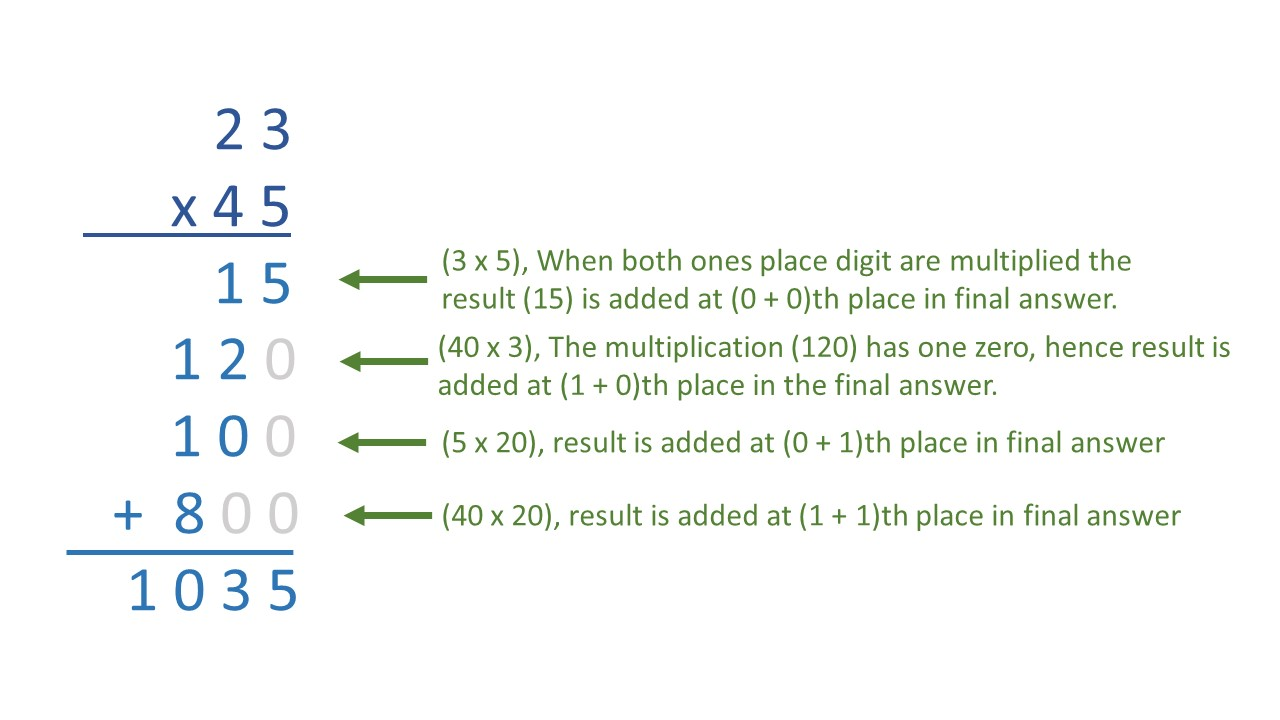

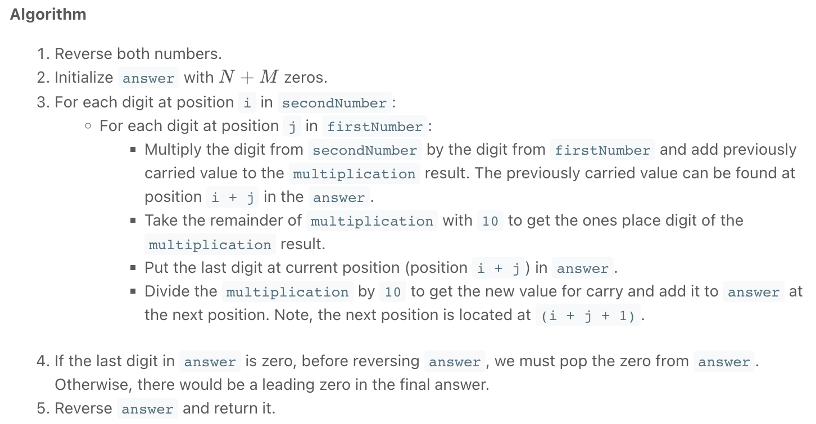

In [9]:
# best solution from Leetcode
def multiply(num1: str, num2: str) -> str:
    '''
    N and M - # digits in num1 and num2.
    Time c.: O(M⋅N) - N operations for each of M digits of the second number
    Space c.: O(M+N) - space to store output not included, but strings are immutable =>
    a temp data structure, using O(M+N) space, is required to store the answer while it is updated.    
    '''
    if num1 == "0" or num2 == "0":
        return "0"

    # Initialize answer as a string of zeros of length N.
    N = len(num1) + len(num2)
    answer = [0] * N

    # Reverse num1 and num2
    first_number = num1[::-1]
    second_number = num2[::-1]

    for place2, digit2 in enumerate(second_number):
        # For each digit in second_number multiply the digit by all digits in first_number.
        for place1, digit1 in enumerate(first_number):
            # The number of zeros from multiplying to digits depends on the place
            # of digit2 in second_number and the place of the digit1 in first_number.
            num_zeros = place1 + place2

            # The digit currently at position numZeros in the answer string
            # is carried over and summed with the current result.
            carry = answer[num_zeros]
            multiplication = int(digit1) * int(digit2) + carry

            # Set the ones place of the multiplication result.
            answer[num_zeros] = multiplication % 10

            # Carry the tens place of the multiplication result by 
            # adding it to the next position in the answer array.
            answer[num_zeros + 1] += multiplication // 10

    # Pop the excess 0 from the end of answer.
    if answer[-1] == 0:
        answer.pop()

    return ''.join(str(digit) for digit in reversed(answer))

In [11]:
# more concise Leetcode solution
def multiply(num1, num2):
        """
        :type num1: str
        :type num2: str
        :rtype: str
        """
        if num1=='0' or num2=='0':
            return '0'
        n = len(num1) + len(num2)
        answer = [0]*n
        num11 = num1[::-1]
        num22 = num2[::-1]
        
        for idx2, digit2 in enumerate(num22):
            for idx1, digit1 in enumerate(num11):                
                num_zeros = idx2 + idx1
                carry = answer[ num_zeros ]
                product = int(digit1)*int(digit2) + carry
                answer[ num_zeros ] = product % 10
                answer[ num_zeros+1 ] += product // 10
                
        if answer[-1] == 0:
            answer.pop()
            
        return ''.join(str(d) for d in reversed(answer))

In [64]:
ord('1')-ord('0')

1

In [8]:
ord('A'), chr(48)

(65, '0')

### 49. Group Anagrams
Array of strs => group anagrams together (in any order). Anagram = word, phrase w/rearranged letters (typically  original letters are used exactly once) 

Example 1:
Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]

Example 2:
Input: strs = [""]
Output: [[""]]

Example 3:
Input: strs = ["a"]
Output: [["a"]]

Constraints:
* 1 <= strs.length <= 104
* 0 <= strs[i].length <= 100
* strs[i] consists of lowercase English letters.       

In [51]:
from collections import defaultdict

def groupAnagrams(strs: List[str]) -> List[List[str]]:
    '''
        My accepted solution
        Your runtime beats 45% of python3 submissions
        Your memory usage beats 55% of python3 submissions
        
        Time c.: O(NKlogK), where N = len(strs), K = max_len of s in strs.
        Outer loop = O(N) (iterate over strs), then sort each s in O(KlogK) time
        
        Space c.: O(NK) - content of res
    '''        
    res = defaultdict(list)
    for s in strs:
        res[ ''.join(sorted(s)) ].append(s)

    return res.values()


def groupAnagrams2(strs: List[str]) -> List[List[str]]:
    '''
        Optimized O(NK) time and space c. solution from LeetCode.
        Two str = anagrams iff their char counts are the same ==> transform each str into char count
        consisting of a tuple of 26 non-negative integers, one per letter, which are used as keys in hash map
    '''    
    res = defaultdict(list)
    for s in strs:
        count = [0] * 26
        for c in s:
            count[ ord(c)-ord('a') ] += 1
        res[ tuple(count) ].append(s)

    return res.values()

strs = ["eat","tea","tan","ate","nat","bat"]
groupAnagrams2(strs)

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])

### 76. Minimum Window Substring
Two strings s, t w/len m, n. Return minimum contiguous substring of s that includes each char in t (including duplicates). Return '' if none

Answer in testcases is unique.

Example 1:  
Input: s = "ADOBECODEBANC", t = "ABC"  
Output: "BANC"  
Explanation: The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.

Example 2:
Input: s = "a", t = "a"  
Output: "a"  
Explanation: The entire string s is the minimum window.  

Example 3:  
Input: s = "a", t = "aa"  
Output: ""  
Explanation: Both 'a's from t must be included in the window.  
Since the largest window of s only has one 'a', return empty string.

Constraints:
* m == s.length
* n == t.length
* 1 <= m, n <= 105
* s and t consist of uppercase and lowercase English letters. 

Follow up: Could you find an algorithm that runs in O(m + n) time?

__Sliding Window Algorithm__
* Two pointers, left and righ initially pointing to first elem in S.
* Expand window with right pointer until we get a desirable window (contains all chars from T, but may not be the shortest).
* Contract window with left pointer while is still desirable.
* If window is not desirable any more, start with step 2 again

In [ ]:
def minWindow(s: str, t: str) -> str:
    '''
    My solution from scratch
    Time c. O(3n) => O(n)?
    Space c. O(n) because of res? 
    '''
    def build_map(string: str) -> str:        
        mapp = {}
        for c in string:
            if c in mapp:
                mapp[c] += 1
            else:
                mapp[c] = 1
        return mapp
    
    def is_map2_in_map1(map1: dict, map2: dict) -> bool:
        for k in map2:
            if k not in map1:
                return False
            if map1[k] < map2[k]:
                return False
        return True
    
    min_len = 10**5
    res     = ''
    map_t = build_map(t)
    l, r = 0, 1
    while l < r and r < len(s)+1:
        if is_map2_in_map1(build_map(s[l:r]), map_t):
            if len(s[l:r]) < min_len:
                min_len = len(s[l:r])
                res = s[l:r]
            l += 1
        else:
            r += 1
    return res    

In [3]:
# my concise solution(based on Leetcode solution). Time/space c. O(n+m)
from collections import Counter

def minWindow(s, t):

    if not t or not s:
        return ''
    dict_t = Counter(t)                     # dict unique chars in t
    len_t  = len(dict_t)                    # count unique chars in t
    dict_curr = {}                          # dict unique chars in curr win
    len_curr  = 0                           # count unique chars in curr window
    l,r = 0,0
    res = float('inf'), None, None          # shortest window length, l, r

    while r < len(s):

        char = s[r]
        dict_curr[ char ] = dict_curr.get(char, 0) + 1
        if char in dict_t and dict_curr[char] == dict_t[char]:
            len_curr += 1

        while l <= r and len_curr == len_t:
            char = s[l]
            if r - l + 1 < res[0]:
                res = (r - l + 1, l, r)

            dict_curr[ char ] -= 1
            if char in dict_t and dict_curr[char] < dict_t[char]:
                len_curr -= 1
            l += 1

        r += 1
    return '' if res[0]==float('inf') else s[ res[1]:res[2]+1 ]

In [73]:
# Leetcode solution
from collections import Counter


def minWindow(s: str, t: str) -> str:
    '''
        LeetCode's solution. Time c. O(m+n)    
    '''    

    if not t or not s:
        return ''
        
    l, r     = 0, 0
    dict_t   = Counter(t)                                     # count of all chars in t    
    required = len(dict_t)                                  # num of unique chars in t that must be in desired window
    
    formed = 0                                       # num unique chars from t in current window in desired frequency
                                                             # e.g. if t=="AABC" => two A's, one B, one C => formed=3
    
    window_counts = {}                                         # count of all unique chars in current window    
    ans = float("inf"), None, None                             # ans = tuple(window length, left, right)

    while r < len(s):

        
        char = s[r]                                                 # add one char from right
        window_counts[ char ] = window_counts.get(char, 0) + 1
        
        if char in dict_t and window_counts[ char ] == dict_t[ char ]:
            formed += 1                               # if current char's frequency == desired count, increment formed
        
        while l <= r and formed == required:                 # contract current window till until it's not 'desirable'
            char = s[l]
            
            if r - l + 1 < ans[0]:                                   # smallest window until now
                ans = (r - l + 1, l, r)

            
            window_counts[char] -= 1                                # char at `left` no longer part of current window
            if char in dict_t and window_counts[ char ] < dict_t[ char ]:
                formed -= 1
            
            l += 1                                                      # contract current window to look for new one
        
        r += 1                                                             # keep expanding once contracting is done
        
    return s[ ans[1]:ans[2]+1 ] if not ans[0]==float("inf") else ''


s = "ADOBECODEBANC"
t = "ABC"
minWindow(s, t)

'BANC'

A small improvement to the above approach can reduce the time complexity of the algorithm to O(2∗∣filtered_S∣+∣T∣), where filtered_S is the string formed from S by removing all the elements not present in T. This complexity reduction is evident when |filtered\_S| <<< |S|∣filtered_S∣<<<∣S∣

In [ ]:
# Leetcode solution 2
def minWindow(s: str, t: str) -> str:
    """
    Optimized Leetcode solution
    """
    
    if not t or not s:
        return ""

    dict_t = Counter(t)
    required = len(dict_t)

    # Leave only chars from s that occur in t
    filtered_s = []
    for i, char in enumerate(s):
        if char in dict_t:
            filtered_s.append((i, char))

    l, r = 0, 0
    formed = 0
    window_counts = {}

    ans = float("inf"), None, None

    # Same sliding window approach, but on as small list
    while r < len(filtered_s):
        character = filtered_s[r][1]
        window_counts[character] = window_counts.get(character, 0) + 1

        if window_counts[character] == dict_t[character]:
            formed += 1

        while l <= r and formed == required:
            character = filtered_s[l][1]

            end = filtered_s[r][0]
            start = filtered_s[l][0]
            if end - start + 1 < ans[0]:
                ans = (end - start + 1, start, end)

            window_counts[character] -= 1
            if window_counts[character] < dict_t[character]:
                formed -= 1
            l += 1    

        r += 1    
    return s[ ans[1]:ans[2]+1 ] if not ans[0]==float("inf") else ''

In [4]:
samples = [ ("ADOBECODEBANC", "ABC"), ("a", "a"), ("a", "aa") ]
for sample in samples:
    print(minWindow(sample[0], sample[1]))
#Output: "BANC"
#Output: "a"
#Output: ""

BANC
a



### 88. Merge Sorted Array

Two int non-decreasing arrays nums1 and nums2 (m and n - num elements in nums1 and nums2 respectively). Merge then into a single non-decreasing array, store final array in nums1. To accommodate this, nums1 has a length of m + n, where the last n elements are 0s to be ignored. nums2 has a length of n. 

Example 1:
Input: nums1 = [1,2,3,0,0,0], m = 3, nums2 = [2,5,6], n = 3
Output: [1,2,2,3,5,6]
Explanation: The arrays we are merging are [1,2,3] and [2,5,6].
The result of the merge is [1,2,2,3,5,6] with the underlined elements coming from nums1.

Example 2:
Input: nums1 = [1], m = 1, nums2 = [], n = 0
Output: [1]
Explanation: The arrays we are merging are [1] and [].
The result of the merge is [1].

Example 3:
Input: nums1 = [0], m = 0, nums2 = [1], n = 1
Output: [1]
Explanation: The arrays we are merging are [] and [1].
The result of the merge is [1].
Note that because m = 0, there are no elements in nums1. The 0 is only there to ensure the merge result can fit in nums1.

Constraints:
* nums1.length == m + n
* nums2.length == n
* 0 <= m, n <= 200
* 1 <= m + n <= 200
* -109 <= nums1[i], nums2[j] <= 109 

Follow up: Can you come up with an algorithm that runs in O(m + n) time?

__Naive approach: merge and sort - not taking advantage of the fact that the arrays are sorted__  
__Using three pointers (i, j, m in my case) and moving from left requires an extra storage, as in my case too__ (time c. O(m+n), space c. O(m))  
__Best approach - three pointers and moving from the right!__ (time c. O(m+n), space c. O(1))

In [19]:
def merge(nums1: List[int], m: int, nums2: List[int], n: int) -> None:
    """
        My accepted solution
        Your runtime beats 91.85 % of python3 submissions
        Your memory usage beats 85.57 % of python3 submissions
    """
    if not nums2:
        return
    
    new_list = nums1
    i, j = 0, 0
        
    while i<m and j<n:
        if nums2[j] <= new_list[i]:                        
            new_list = new_list[:i] + [nums2[j]] + new_list[i:-1]
            j += 1
            i += 1
            m += 1
        else:
            i += 1
            
    if j < n:
        i = m
        while j < n:
            new_list[i] = nums2[j]
            i += 1
            j += 1
        
    # had to use new_list and this assignment to make it in-place
    nums1[:] = new_list
    
    
def merge2(nums1: List[int], m: int, nums2: List[int], n: int) -> None:
    '''
        Leetcode's solution. Three pointers, moving from the right
        Time c. O(m+n), space c. O(1)
    '''
    p1, p2 = m - 1, n - 1

    # p moves backwards, writing the smallest of p1 or p2.
    for p in range(n + m - 1, -1, -1):
        if p2 < 0:
            break
        if p1 >= 0 and nums1[p1] > nums2[p2]:
            nums1[p] = nums1[p1]
            p1 -= 1
        else:
            nums1[p] = nums2[p2]
            p2 -= 1
                        
        
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3

merge2(nums1, m, nums2, n)
print('Answer:', nums1)

Answer: [1, 2, 2, 3, 5, 6]


### 125. Valid Palindrome
Given a string s, determine if it is a palindrome, considering only alphanumeric characters and ignoring cases.

Example 1:
Input: s = "A man, a plan, a canal: Panama"
Output: true
Explanation: "amanaplanacanalpanama" is a palindrome
    
Example 2:
Input: s = "race a car"
Output: false
Explanation: "raceacar" is not a palindrome. 

Constraints:
* 1 <= s.length <= 2 * 105
* s consists only of printable ASCII characters

In [26]:
import string

def isPalindrome(s: str) -> bool:
    '''
        My accepted solution    
    '''    
    if not s:
        return False
    elif len(s) == 1:
        return True
    
    s = ''.join([c for c in s.lower() if c.isalnum()])
    l, r = 0, len(s) - 1
    while l < r:
        if not s[l] == s[r]:
            return False
        l += 1
        r -= 1
        
    return True


def isPalindrome2(s: str) -> bool:
    '''
       Leetcode solution (same approach)
    '''

    i, j = 0, len(s) - 1

    while i < j:
        while i < j and not s[i].isalnum():
            i += 1
        while i < j and not s[j].isalnum():
            j -= 1

        if s[i].lower() != s[j].lower():
            return False

        i += 1
        j -= 1

    return True

s1 = 'A man, a plan, a canal: Panama'
s2 = 'race a car'



isPalindrome(s1)

True

### 161. One Edit Distance

Given two strings s and t, return true if they are both one edit distance apart, otherwise return false. A string s is said to be one distance apart from a string t if you can:
* Insert exactly one character into s to get t.
* Delete exactly one character from s to get t.
* Replace exactly one character of s with a different character to get t. 

Example 1:
Input: s = "ab", t = "acb"
Output: true
Explanation: We can insert 'c' into s to get t.

Example 2:
Input: s = "", t = ""
Output: false
Explanation: We cannot get t from s by only one step.

Example 3:
Input: s = "a", t = ""
Output: true

Example 4:
Input: s = "", t = "A"
Output: true 

Constraints:
* 0 <= s.length <= 104
* 0 <= t.length <= 104
* s and t consist of lower-case letters, upper-case letters and/or digits.

In [41]:
def isOneEditDistance2(s: str, t: str) -> bool:
    '''
         My accepted solution. Time c. O(n), space c. O(n) because s[:-1] will create additional str (str=immutable)
    '''    
    if len(s) < len(t):
        s,t = t,s
            
    # edge cases which will not be captured by the main if/else statement
    if (not s and not t) or (abs(len(s) - len(t)) > 1):
        return False
    elif (s[:-1] == t) or (s[1:] == t):
            return True
    
    if len(s) == len(t):                
        count = 0
        for i in range(len(s)):
            if s[i] != t[i]:
                count += 1
                if count > 2: return False
        return True if count == 1 else False
                
    elif abs(len(s) - len(t)) == 1:               
        count = 0
        i, j = 0, 0        
        while i < len(s) and j < len(t):
            if s[i] != t[j]:
                count += 1
                if count > 2: return False
                i += 1
            else:
                i += 1
                j += 1                
        return True if count == 1 else False

    
    
def isOneEditDistance(s: str, t: str) -> bool:
    '''
        Shorter solution from comments (accepted). Time c. O(n), space c. O(1)? 
    '''
    if abs(len(s) - len(t)) > 1 or s == t:
        return False

    found = False
    i = j = 0

    while i < len(s) and j < len(t):
        if s[i] != t[j]:
            if found:
                return False
            found = True
            if len(s) < len(t): i -= 1
            elif len(s) > len(t): j -= 1

        i += 1
        j += 1

    return True
        
s = 'ab'
t = 'acb'
print( isOneEditDistance(s, t) )

s = ''
t = ''
print( isOneEditDistance(s, t) )

s = 'a'
t = ''
print( isOneEditDistance(s, t) )

s = ''
t = 'A'
print( isOneEditDistance(s, t) )

True
False
True
True


### 238. Product of Array Except Self

Given int array nums, return array answer where answer[i] = product of all elems of nums except nums[i]. Product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer (but not of entire nums?). Algo must run in O(n) time, without the division operation. 

Example 1:
Input: nums = [1,2,3,4]
Output: [24,12,8,6]

Example 2:
Input: nums = [-1,1,0,-3,3]
Output: [0,0,9,0,0]

Constraints:
* 2 <= nums.length <= 105
* -30 <= nums[i] <= 30
* The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer => cannot do product of all nums/nums[i]

Follow up: O(1) extra space complexity if not counting answer array?

In [54]:
def productExceptSelf3(nums: List[int]) -> List[int]:
    '''
        My solution; works locally, exceeds time limit when submitted    
    '''
    
    answer = []
    for i in range( len(nums) ):
        product = 1
        for j in range( len(nums) ):
            if j != i:
                product *= nums[j]
        answer.append(product)

    return answer


def productExceptSelf2(nums: List[int]) -> List[int]:
    '''
        Leetcode solution 1. Time c. O(n), space c. O(n) because of two extra arrays   
    '''    
    length = len(nums)    
    L, R, answer = [0]*length, [0]*length, [0]*length
    
    L[0] = 1                                # L[i] - product of all elems to left. L[0] = 1 since nothing to left
    for i in range(1, length):        
        L[i] = nums[i-1] * L[i-1]

    R[-1] = 1                               # R[i] - product of all elems to right. R[-1] = 1 since nothing to right
    for i in reversed(range(length - 1)):        
        R[i] = nums[i + 1] * R[i + 1]
    print(L, R)

    for i in range(length):
        answer[i] = L[i] * R[i]

    return answer


def productExceptSelf(nums: List[int]) -> List[int]:
    '''
        Leetcode solution 2. Time c. O(n), space c. O(1). answer array = array L from solution 1
        and var R contains a running product of elems to right, replacing array R from solution 1
    '''
    length = len(nums)
    answer = [0]*length

    answer[0] = 1                     # answer[i] - product of all elems to left. answer[0] = 1 since nothing to left
    for i in range(1, length):
        answer[i] = nums[i - 1] * answer[i - 1]

    
    R = 1                             # R - running product of elems to right. First R = 1 since nothing to right
    for i in reversed(range(length)):
        answer[i] = answer[i] * R
        R *= nums[i]

    return answer


    
nums = [1,2,3,4]
print( productExceptSelf(nums) )

nums = [-1,1,0,-3,3] 
print( productExceptSelf(nums) )

nums = [1, 5, 7, 2] 
print( productExceptSelf(nums) )

[24, 12, 8, 6]
[0, 0, 9, 0, 0]
[70, 14, 10, 35]


### 273. Integer to English Words
Convert a non-negative integer num to its English words representation. 

Example 1:
Input: num = 123
Output: "One Hundred Twenty Three"

Example 2:
Input: num = 12345
Output: "Twelve Thousand Three Hundred Forty Five"

Example 3:
Input: num = 1234567
Output: "One Million Two Hundred Thirty Four Thousand Five Hundred Sixty Seven"

Example 4:
Input: num = 1234567891
Output: "One Billion Two Hundred Thirty Four Million Five Hundred Sixty Seven Thousand Eight Hundred Ninety One"

Constraints:
0 <= num <= 2^31 - 1

In [90]:
def numberToWords(num: int)-> int:
    '''
        Leetcode solution
    '''
    def ones(num):
        switcher = {
            1: 'One',
            2: 'Two',
            3: 'Three',
            4: 'Four',
            5: 'Five',
            6: 'Six',
            7: 'Seven',
            8: 'Eight',
            9: 'Nine'
        }
        return switcher.get(num)

    def teens(num):
        switcher = {
            10: 'Ten',
            11: 'Eleven',
            12: 'Twelve',
            13: 'Thirteen',
            14: 'Fourteen',
            15: 'Fifteen',
            16: 'Sixteen',
            17: 'Seventeen',
            18: 'Eighteen',
            19: 'Nineteen'
        }
        return switcher.get(num)

    def tens(num):
        switcher = {
            2: 'Twenty',
            3: 'Thirty',
            4: 'Forty',
            5: 'Fifty',
            6: 'Sixty',
            7: 'Seventy',
            8: 'Eighty',
            9: 'Ninety'
        }
        return switcher.get(num)


    def two(num):
                
        if not num:
            return ''
        elif num < 10:
            return ones(num)
        elif num < 20:
            return teens(num)
        else:
            tenner = num // 10
            rest   = num % 10
            return tens(tenner) + ' ' + ones(rest) if rest else tens(tenner)

    def three(num):
                
        hundred = num // 100
        rest    = num % 100
        
        if not hundred and rest:
            return two(rest)

        return ones(hundred) + ' Hundred ' + two(rest) if rest else ones(hundred) + ' Hundred'
        
        
    billion = num // 1000000000
    million = (num - billion * 1000000000) // 1000000
    thousand = (num - billion * 1000000000 - million * 1000000) // 1000
    rest = num % 1000

    if not num:
        return 'Zero'

    result = ''
    if billion:        
        result = three(billion) + ' Billion'
    if million:
        result += ' ' if result else ''    
        result += three(million) + ' Million'
    if thousand:
        result += ' ' if result else ''
        result += three(thousand) + ' Thousand'
    if rest:
        result += ' ' if result else ''
        result += three(rest)
    return result



num1 = 123
num2 = 12345
num3 = 1234567
num4 = 1234567891

for num in [num1, num2, num3, num4]:
    print( numberToWords(num) )

One Hundred Twenty Three
Twelve Thousand Three Hundred Forty Five
One Million Two Hundred Thirty Four Thousand Five Hundred Sixty Seven
One Billion Two Hundred Thirty Four Million Five Hundred Sixty Seven Thousand Eight Hundred Ninety One


In [91]:
num = 1234567890
billion = num // 1000000000
million = (num - billion * 1000000000) // 1000000
thousand = (num - billion * 1000000000 - million * 1000000) // 1000
rest = num - billion * 1000000000 - million * 1000000 - thousand * 1000
print( billion, million, thousand, rest)

1 234 567 890


### 283. Move Zeroes

Given an integer array nums, move all 0's to the end of it while maintaining the relative order of the non-zero elements - in-place. 

Example 1:
Input: nums = [0,1,0,3,12]
Output: [1,3,12,0,0]

Example 2:
Input: nums = [0]
Output: [0]

Constraints:
* 1 <= nums.length <= 104
* -231 <= nums[i] <= 231 - 1

Follow up: Could you minimize the total number of operations done?

In [66]:
def moveZeroes(nums: List[int])-> None:
    '''
        No Leetcode solution for Python. This is a brilliant solution from discussion 
    '''
    k = 0                                             # always next idx after last non-zero element
    for i in range(len(nums)):
        if nums[i] != 0:
            nums[k], nums[i] = nums[i], nums[k]
            k += 1
                        

def moveZeroes2(nums: List[int]) -> None:
    '''
    My accepted solution, but runs for too long (because too many elements are shifted)
    '''    
    i = 0
    length = len(nums)
    last_idx0 = length - 1
    while i < last_idx0:
        if nums[i] == 0:
            for j in range(i, length-1):
                nums[j] = nums[j+1]                
            nums[-1] = 0
            last_idx0 -= 1
        else:
            i += 1
                        
    
def moveZeroes1(nums: List[int]) -> None:
    '''
        This is not in-place for some reason (only `return nums` would work)
    '''    
    length = len(nums)
    idxs   = []
    nums = [e for e in nums if e != 0]
    nums[:] = nums + [0]*(length - len(nums))
    print(nums)
    

nums = [0,1,0,3,12]
moveZeroes( nums )
nums

[1, 3, 12, 0, 0]

### 340. Longest Substring with At Most K Distinct Characters
Str s, int k: return __length__ of longest substring with at most k distinct chars 

Example 1:
Input: s = "eceba", k = 2
Output: 3
Explanation: The substring is "ece" with length 3.

Example 2:
Input: s = "aa", k = 1
Output: 2
Explanation: The substring is "aa" with length 2.

Constraints:
* 1 <= s.length <= 5 * 10^4
* 0 <= k <= 50

__Algorithm__
* Return 0 if not str or k == 0
* Left, right pointers = 0, max_len = 1
* While right < N:
* a) If s[right] in ordered dict hashmap - delete it => to ensure first key in hashmap = leftmost character.
* b) Add s[right] to hashmap, move right pointer to the right
* c) If len(hashmap) == k + 1 distinct chars, remove leftmost, move left pointer => sliding window has k distinct chars.
* Update max_len

In [151]:
from collections import OrderedDict

def lengthOfLongestSubstringKDistinct(s: str, k: int) -> int:
    
        n = len(s)       
        if k == 0 or n == 0:
            return 0
        
        max_len = 1
        left, right = 0, 0                                               # sliding window pointers        
        hashmap = OrderedDict()                                          # hashmap for disticnt chars        

        while right < n:
                       
            # ADD RIGHTMOST            
            char = s[right]            
            if char in hashmap:                                           # for char to be rightmost in hashmap
                del hashmap[char]
            hashmap[char] = right
            right += 1
 
            # CHECK IF MORE THAN K DISTICNT CHARS
            if len(hashmap) == k + 1:                
                _, del_idx = hashmap.popitem(last = False)                
                left = del_idx + 1

            max_len = max(max_len, right-left)

        return max_len
        
    
s = 'eceba'
k = 2
print( lengthOfLongestSubstringKDistinct(s, k) )

s = 'aa'
k = 1
print( lengthOfLongestSubstringKDistinct(s, k) )

s = 'ab'
k = 1
print( lengthOfLongestSubstringKDistinct(s, k) )

s = 'ababffzzeee'
k = 3
print( lengthOfLongestSubstringKDistinct(s, k) )

3
2
1
7


### 468. Validate IP Address
Given a string IP, return "IPv4" if IP is a valid IPv4 address, "IPv6" if IP is a valid IPv6 address or "Neither" if IP is not a correct IP of any type.

A valid IPv4 address  
* "x1.x2.x3.x4" where 0 <= xi <= 255
* xi cannot contain leading zeros

For example, "192.168.1.1" and "192.168.1.0" are valid IPv4 addresses
"192.168.01.1", "192.168.1.00" and "192.168@1.1" are not.

A valid IPv6 address
* "x1:x2:x3:x4:x5:x6:x7:x8" where 1 <= len(xi) <= 4
* xi = hexadecimal string containing digits, lower-case & upper-case ('A' to 'F').
* Leading zeros are allowed in xi.

For example, "2001:0db8:85a3:0000:0000:8a2e:0370:7334" and "2001:db8:85a3:0:0:8A2E:0370:7334" are valid IPv6 addresses
"2001:0db8:85a3::8A2E:037j:7334" and "02001:0db8:85a3:0000:0000:8a2e:0370:7334" are not

Example 1:
Input: IP = "172.16.254.1"
Output: "IPv4"
Explanation: This is a valid IPv4 address, return "IPv4".

Example 2:
Input: IP = "2001:0db8:85a3:0:0:8A2E:0370:7334"
Output: "IPv6"
Explanation: This is a valid IPv6 address, return "IPv6".

Example 3:
Input: IP = "256.256.256.256"
Output: "Neither"
Explanation: This is neither a IPv4 address nor a IPv6 address.

Example 4:
Input: IP = "2001:0db8:85a3:0:0:8A2E:0370:7334:"
Output: "Neither"

Example 5:
Input: IP = "1e1.4.5.6"
Output: "Neither" 

Constraints:
* IP consists only of English letters, digits and the characters '.' and ':'.

In [155]:
def validIPAddress(IP: str) -> str:
    '''
        My accepted solution. Time c. O(N) because iterating all (at least for ipv6), space c. O(1)
    '''
    
    def validate_ipv4(IP: str)->bool:

        if not '.' in IP:
            return False
        IP = IP.split('.')
        if not len(IP) == 4:
            return False
        if any([i.startswith('0') and len(i) > 1 for i in IP]):
            return False
        for i in IP:
            try:
                if int(i) < 0 or int(i) > 255:
                    return False
            except:
                return False

        return True    


    def validate_ipv6(IP: str)->bool:

        allowed = '0123456789abcdefABCDEF'
        if not ':' in IP:
            return False
        IP = IP.split(':')
        if not len(IP) == 8:
            return False
        for i in IP:
            if not i:
                return False
            if len(i) > 4:
                return False
            if any([c not in allowed for c in i]):
                return False    

        return True        

    ipv4 = validate_ipv4(IP)
    ipv6 = validate_ipv6(IP)

    if ipv4:
        return 'IPv4'
    elif ipv6:
        return 'IPv6'
    else:
        return 'Neither'
    
    
import re
def validIPAddress(IP: str) -> str:
    '''
        Leetcode regex solution. Time c. O(1)? because patterns to match have constant length. Space c. O(1)
    '''
    chunk_IPv4 = r'([0-9]|[1-9][0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5])'
    patten_IPv4 = re.compile(r'^(' + chunk_IPv4 + r'\.){3}' + chunk_IPv4 + r'$')

    chunk_IPv6 = r'([0-9a-fA-F]{1,4})'
    patten_IPv6 = re.compile(r'^(' + chunk_IPv6 + r'\:){7}' + chunk_IPv6 + r'$')

    if patten_IPv4.match(IP):
        return "IPv4"
    return "IPv6" if patten_IPv6.match(IP) else "Neither" 
    
IPs = [ '172.16.254.1', '2001:0db8:85a3:0:0:8A2E:0370:7334', '256.256.256.256', '2001:0db8:85a3:0:0:8A2E:0370:7334:',
        '1e1.4.5.6', ]
for IP in IPs:
    print( validIPAddress(IP) )

IPv4
IPv6
Neither
Neither
Neither


### 560. Subarray Sum Equals K
Array of int nums and int k - return total num continuous subarrays with sum k 

Example 1:
Input: nums = [1,1,1], k = 2
Output: 2
    
Example 2:
Input: nums = [1,2,3], k = 3
Output: 2 

Constraints:
* 1 <= nums.length <= 2 * 10^4
* -1000 <= nums[i] <= 1000
* -10^7 <= k <= 10^7

__Idea__: if curr_sum up to two indices, say i and j is at a difference of k i.e. sum[i]-sum[j] = k, the sum of elements lying between indices i and j is k, too

In [168]:
from collections import defaultdict

def subarraySum(nums: List[int], k: int) -> int:
    '''
        Combined Leetcode and my solution. Time c. = space c. = 0
        Lines that are commented out - case when you keep actual subarrays, not just their count
    '''    
    curr_sum   = 0
    hash_map    = defaultdict()
    hash_map[0] = 1
    count      = 0
        
    for i in range(len(nums)):
        
        curr_sum += nums[i]
        if curr_sum - k in hash_map:
            count += hash_map.get(curr_sum - k)
            
            #alist = hash_map[curr_sum - k]
            #for value in alist:
            #    res.append(nums[value+1: i+1])
                        
        hash_map[curr_sum] = hash_map.get(curr_sum, 0) + 1
        #hash_map[curr_sum].append(i)
        
    return count


nums = [1,1,1]
k = 2
print( subarraySum(nums, k) )

nums = [1,2,3]
k = 3
print( subarraySum(nums, k) )

2
2


### 680. Valid Palindrome II
Given a string s, return true if s can be palindrome after deleting _at most_ one char 

Example 1:
Input: s = "aba"
Output: true

Example 2:
Input: s = "abca"
Output: true
Explanation: You could delete the character 'c'.

Example 3:
Input: s = "abc"
Output: false

Constraints:
* 1 <= s.length <= 10^5
* s consists of lowercase English letters

In [180]:
def validPalindrome(s: str) -> bool:
    '''
        Accetped variation of the classical isPalindrome() problem
        where, when s[l] != s[r], you try to skip s[l] first (counting mismatches)
        then try to skip s[r] second (counting mismatches).
        If any of mismatches < 2, one option is a palindrome
        Time c. still O(n)
    '''   
    if not s:
        return False
    elif len(s) == 1:
        return True

    s = ''.join([c for c in s.lower() if c.isalnum()])

    l, r = 0, len(s) - 1
    diff1, diff2 = 0, 0
    while l < r:            
        if not s[l] == s[r]:
            diff1 += 1
            l += 1
            if diff1 > 1 and diff2 > 1:        # to avoid unnecassary repetition
                return False
            if diff1 > 1:                      # to avoid unnecassary repetition
                break
        else:
            l += 1
            r -= 1

    l, r = 0, len(s) - 1
    while l < r:
        if not s[l] == s[r]:
            diff2 += 1
            r -= 1
            if diff1 > 1 and diff2 > 1:        # to avoid unnecassary repetition
                return False
            if diff2 > 1:                      # to avoid unnecassary repetition
                break
        else:
            l += 1
            r -= 1

    return (diff1 < 2) or (diff2 < 2)


def validPalindrome2(s):
        
    def isPalindrome(s, start, end, delCount):
        '''
            No Leetcode solution. This is a recursive variant of isPalindrome from Discussions
        '''
        if delCount > 1:
            return False
        while start < end:
            if s[start] != s[end]:
                break
            start += 1
            end -= 1
        if (start == end) or (start == end+1):
            return True
        
        return any([isPalindrome(s, start+1, end, delCount+1), isPalindrome(s, start, end-1, delCount+1)])

    return isPalindrome(s, 0, len(s)-1, 0)

strs = ['aba','abca', 'abc' ]
for s in strs:
    print( validPalindrome(s) )

0 0
True
1 1
True
2 2
False


# Part II. Linked lists

### 2. Add Two Numbers
Two non-empty linked lists, one digit per node, represent two non-negative integers in reverse order. Add the two numbers, return sum as a reversed linked list. No leading zero, except the number 0 itself

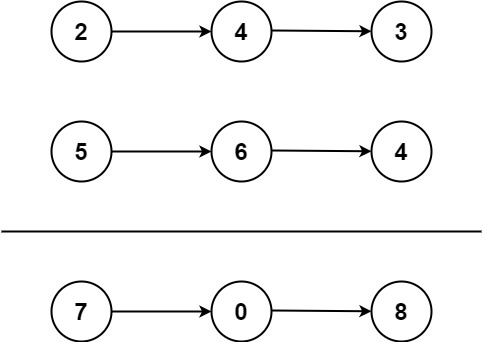

Example 1:
Input: l1 = [2,4,3], l2 = [5,6,4]
Output: [7,0,8]
Explanation: 342 + 465 = 807.

Example 2:
Input: l1 = [0], l2 = [0]
Output: [0]

Example 3:
Input: l1 = [9,9,9,9,9,9,9], l2 = [9,9,9,9]
Output: [8,9,9,9,0,0,0,1]
 

Constraints:
* The number of nodes in each linked list is in the range [1, 100].
* 0 <= Node.val <= 9
* It is guaranteed that the list represents a number that does not have leading zeros EXCEPT FOR NUMBER 0 ITSELF

In [222]:
class Node:    
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def addTwoNumbers2(l1: Optional[Node], l2: Optional[Node]) -> Optional[Node]:
    '''
        My solution
    '''
    # if one list doesn't exist     
    if not l1: return l2
    if not l2: return l1
    
    # if one list is 0
    if not l1.next and l1.val == 0: return l2    
    if not l2.next and l2.val == 0: return l1
    
    new = new_orig = Node(val=0)
    remainder = 0
    while l1 or l2:
        summ = remainder
        if l1:
            summ += l1.val
            l1 = l1.next
        if l2:
            summ += l2.val
            l2 = l2.next
        value, remainder= summ%10, summ//10
        new.next = Node(val=value)
        new = new.next
    if remainder:
        new.next = Node(val=remainder)
    return new_orig.next



def addTwoNumbers(l1: Optional[Node], l2: Optional[Node]) -> Optional[Node]:
    '''
        My accepted optimized solution - replicates manual "columnar" addition. In line with Leetcode solution
        Time c. = space c. = O(max(m,n))
        Leetcode has a dummy_node = Node(0) as starting point, then assigns .next inside just one loop,
        and returns summy_node.next
    '''
    
    # edge cases    
    if not l1.next and l1.val == 0:
        return l2
    
    if not l2.next and l2.val == 0:
        return l1
        
    # iterate until one of the lists ends    
    new_nodes = []
    carry = 0
    while l1 or l2:        
        sum_ = carry
        if l1: sum_ += l1.val                                     # in case on of the lists is shorter
        if l2: sum_ += l2.val
        if sum_ >= 10:
            carry = sum_//10
            new_nodes.append( Node(val=sum_%10) )
        else:
            carry = 0
            new_nodes.append( Node(val=sum_) )
        if l1: l1 = l1.next
        if l2: l2 = l2.next    
        
    # see if carry is still non-zero
    if carry != 0:
        new_nodes.append( Node(val=carry) )
       
    # point nodes to each other successively (alternatively, use dummy_node = Node(0) as starting point
    # to avoid this loop and assign curr.next inside one main loop above)
    for i in range( len(new_nodes)-1 ):
        new_nodes[i].next = new_nodes[i+1]
       
    # return head
    return new_nodes[0]

    
# Output: [7,0,8]
l1 = [2,4,3],
l2 = [5,6,4]
n1 = Node(val=2)
n2 = Node(val=4)
n3 = Node(val=3)
n1.next = n2
n2.next = n3

n4 = Node(val=5)
n5 = Node(val=6)
n6 = Node(val=4)
n4.next = n5
n5.next = n6

n_new = addTwoNumbers(n1, n4)
n_new

### 21. Merge Two Sorted Lists
Merge two sorted non-decreasing linked lists, return sorted list by splicing together nodes of the first two lists 

Example 1:
Input: l1 = [1,2,4], l2 = [1,3,4]
Output: [1,1,2,3,4,4]

Example 2:
Input: l1 = [], l2 = []
Output: []

Example 3:
Input: l1 = [], l2 = [0]
Output: [0]

Constraints:
* The number of nodes in both lists is in the range [0, 50].
* -100 <= Node.val <= 100
* Both l1 and l2 are sorted in non-decreasing order

In [243]:
class ListNode:    
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
                
        
def mergeTwoLists(l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
    '''
        Leetcode solution
        Time c. O(n+m), space c. O(1)       
    '''
    # reference to return node (prehead will be disregarded as it's a singly linked list + head is returned)
    prehead = ListNode(-1)
    prev = prehead

    while l1 and l2:
        if l1.val <= l2.val:
            prev.next = l1                                   # assign entire node, NOT ListNode( l1.val )!
            l1 = l1.next
        else:
            prev.next = l2
            l2 = l2.next            
        prev = prev.next

    # One of l1 or l2 can still have nodes => connect
    # the non-null list to the end of merged list AND no need to iterate to the end!!!!!!
    prev.next = l1 if l1 else l2                 

    return prehead.next


l1 = [1,2,4]
l2 = [1,3,4]
n1 = Node(val=1)
n2 = Node(val=2)
n3 = Node(val=4)
n1.next = n2
n2.next = n3

n4 = Node(val=1)
n5 = Node(val=3)
n6 = Node(val=4)
n4.next = n5
n5.next = n6

n_new = mergeTwoLists(n1, n4)
n_new

In [244]:
while n_new:
    print(n_new.val, end=' ')
    n_new = n_new.next

1 1 2 3 4 4 

## 138. Copy List with Random Pointer (Facebook)

A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.

Return the head of the copied linked list.

The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of [val, random_index] where:

val: an integer representing Node.val
random_index: the index of the node (range from 0 to n-1) that the random pointer points to, or null if it does not point to any node.

Your code will only be given the head of the original linked list

In [245]:
from collections import defaultdict

class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random

def copyRandomList(head: 'Node') -> 'Node':
        
        # Nodes as keys, their copies as values
        node_map = defaultdict(lambda: None)
        
        # Fill node_map
        curr = head
        while curr:
            node_map[curr] = Node(curr.val)
            curr = curr.next
        
        # Update next and random pointer of the copied nodes
        curr = head
        while curr:
            dup = node_map[curr]
            dup.next = node_map[curr.next]
            dup.random = node_map[curr.random]
            curr = curr.next
            
        return node_map[head]
    
#head = [[3,null],[3,0],[3,null]]
node_0 = Node(3)
node_1 = Node(3)
node_2 = Node(3)

node_0.next = node_1
node_1.next = node_2

node_1.random = node_0

copyRandomList(node_0)  

### 143. Reorder List
Given the head of singly linked-list, reorder it: L0 → Ln → L1 → Ln - 1 → L2 → Ln - 2 → … Cannot modify values in list's nodes, only nodes themselves may be changed. 

Example 1:
Input: head = [1,2,3,4]
Output: [1,4,2,3]

Example 2:
Input: head = [1,2,3,4,5]
Output: [1,5,2,4,3]

Constraints:
* Number nodes in list: [1, 5 * 104]
* 1 <= Node.val <= 1000

### This problem is a combination of three easy problems!
* Middle of the Linked List (#876)
* Reverse Linked List (#206)
* Merge Two Sorted Lists (#21)

In [263]:
class ListNode:

    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def reorderList(head: Optional[ListNode]) -> None:
    '''
        Do not return anything, modify head in-place instead
        Time c. O(n), space c. O(1)
    '''    
    if not head:
        return 

    # find middle [Problem 876]
    slow = fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    # reverse second part of list in-place [Problem 206]
    prev, curr = None, slow
    while curr:
        curr.next, prev, curr = prev, curr, curr.next       

    # merge two sorted linked lists [Problem 21]
    # merge 1->2->3->4 and 6->5->4 into 1->6->2->5->3->4
    first, second = head, prev
    while second.next:
        first.next, first = second, first.next
        second.next, second = first, second.next

                
l1 = [1,2,3,4]
n1 = ListNode(val=1)
n2 = ListNode(val=2)
n3 = ListNode(val=3)
n4 = ListNode(val=4)

n1.next = n2
n2.next = n3
n3.next = n4

head0 = n1
reorderList(n1)

curr0 = head0
while curr0:
    print(curr0.val, end=' ')
    curr0 = curr0.next

1 4 2 3 

# Part III. Trees and Graphs
Facebook loves Tree types of problems. Favorite one: __convert BST to Sorted Doubly Linked List__ (below). You should also know __topological sort__ and __graph traversal__ (still asked occasionally)

## 938. Range Sum of BST
Given the root node of a binary search tree and two integers low and high, return the sum of values of all nodes with a value in the inclusive range [low, high]  
* Input: root = [10,5,15,3,7,null,18], low = 7, high = 15
* Output: 32
* Explanation: Nodes 7, 10, and 15 are in the range [7, 15]. 7 + 10 + 15 = 32.
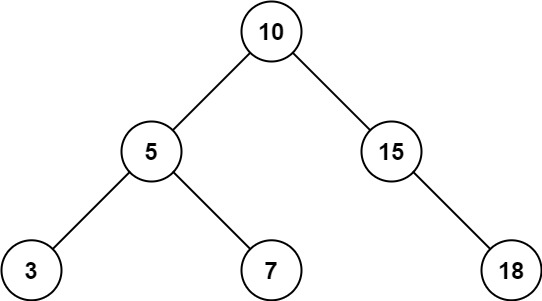

_My submission_
* Runtime: 216 ms, faster than 63.90% of Python3 online submissions for Range Sum of BST.
* Memory Usage: 22.2 MB, less than 84.79% of Python3 online submissions for Range Sum of BST

In [30]:
from typing import Optional, Union, List

class Node:
    def __init__(
                 self,
                 val: int=0,
                 left: Optional[int]=None,
                 right: Optional[int]=None,
                ) -> None:
        self.val=val
        self.left=left
        self.right=right
        
        
def range_sum( root: Optional[TreeNode],
               low: int,
               high: int,
             ) -> int:
    
    if root is None:
        return 0
    
    res = 0
    
    if root.val < low:
        res += range_sum(root.right, low, high)
    elif root.val > high:
        res += range_sum(root.left, low, high)
    else:
        res += root.val + range_sum(root.left, low, high) + range_sum(root.right, low, high)
        
    return res
    

In [31]:
low = 7
high = 15
root = TreeNode(10)
root.left = TreeNode(5)
root.left.left = TreeNode(3)
root.left.right = TreeNode(7)
root.right = TreeNode(15)
root.right.right = TreeNode(18)

rangeSumBST(root, low, high)

32

### 426. Convert Binary Search Tree to Sorted Doubly Linked List
Convert a Binary Search Tree to a sorted Circular Doubly-Linked List in place.

You can think of the left and right pointers as synonymous to the predecessor and successor pointers in a doubly-linked list. For a circular doubly linked list, the predecessor of the first element is the last element, and the successor of the last element is the first element.

We want to do the transformation in place. After the transformation, the left pointer of the tree node should point to its predecessor, and the right pointer should point to its successor. You should return the pointer to the smallest element of the linked list.

Example 1:
Input: root = [4,2,5,1,3]
Output: [1,2,3,4,5]
Explanation: The figure below shows the transformed BST. The solid line indicates the successor relationship, while the dashed line means the predecessor relationship.

Example 2:
Input: root = [2,1,3]
Output: [1,2,3]

Example 3:
Input: root = []
Output: []
Explanation: Input is an empty tree. Output is also an empty Linked List.

Example 4:
Input: root = [1]
Output: [1]
 
Constraints:
* The number of nodes in the tree is in the range [0, 2000]
* -1000 <= Node.val <= 1000
* All the values of the tree are unique

__Solution__
* Inorder recursion: left -> node -> right
* Left & right parts are recursion calls
* Node part is where all processing is done

__Complexity__
* Time c. O(N) - each node is processed exactly once.
* Space c. O(N) - keeping recursion stack of the size of the tree height, O(logN) for the best case of completely balanced tree and O(N) for the worst case of completely unbalanced tree

In [ ]:
'''
# Definition for a Node.
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
'''

class Solution:
    def treeToDoublyList(self, root: 'Node') -> 'Node':
        def helper(node):
            '''
                Standard inorder traversal: left -> node -> right, linking all nodes into DLL
            '''
            nonlocal last, first
            if node:
                
                helper(node.left)                                                           # left
               
                if last:                                                                    # node                    
                    last.right = node                                                # link prev node (last) with node
                    node.left = last
                else:                    
                    first = node                                                     # memorize first smallest node
                last = node
                
                helper(node.right)                                                          # right
        
        if not root:
            return None
        
        
        first, last = None, None                                            # smallest (first) & largest (last) nodes
        helper(root)
        
        last.right = first                                                  # close DLL
        first.left = last
                
        return first

### 114. Flatten Binary Tree to Linked List

Given the root of a binary tree, flatten the tree into a "linked list":
* Use same TreeNode class, right child pointer => next node, left child = always null.
* Linked list's order - pre-order traversal of BT (root-L-R)

Example 1:
Input: root = [1,2,5,3,4,null,6]
Output: [1,null,2,null,3,null,4,null,5,null,6]

Example 2:
Input: root = []
Output: []

Example 3:
Input: root = [0]
Output: [0]

Constraints:
* The number of nodes in the tree is in the range [0, 2000].
* -100 <= Node.val <= 100

Follow up: can you flatten the tree in-place (with O(1) extra space)?

#### Solution 1 (Recursive, O(n), O(n))

In [ ]:
# class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:    
    def flattenTree(self, node):        
        
        if not node:                                                        # null scenario
            return None        
        
        if not node.left and not node.right:                                # if leaf node, return node
            return node
        
        left  = self.flattenTree(node.left)                                 # flatten left half recursively
        right = self.flattenTree(node.right)                                # flatten right half recursively        
        
        if left:                                              # If left subtree, modify connections => nothing on left
            left.right = node.right
            node.right = node.left
            node.left = None
        
        return rightTail if rightTail else leftTail          # once done re-wiring, return "rightmost" node
        
    
    def flatten(self, root: TreeNode) -> None:
        '''
            Do not return anything, modify root in-place instead.
        '''        
        self.flattenTree(root)

### Solution 2 (Iterative, O(n), O(1))
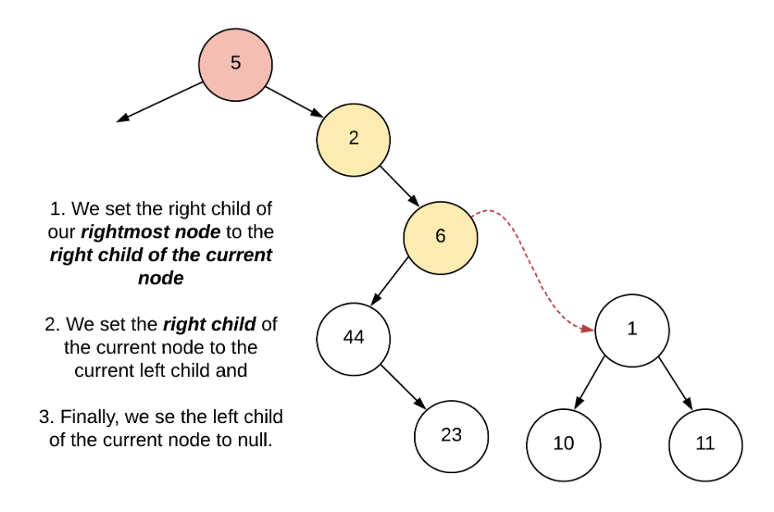

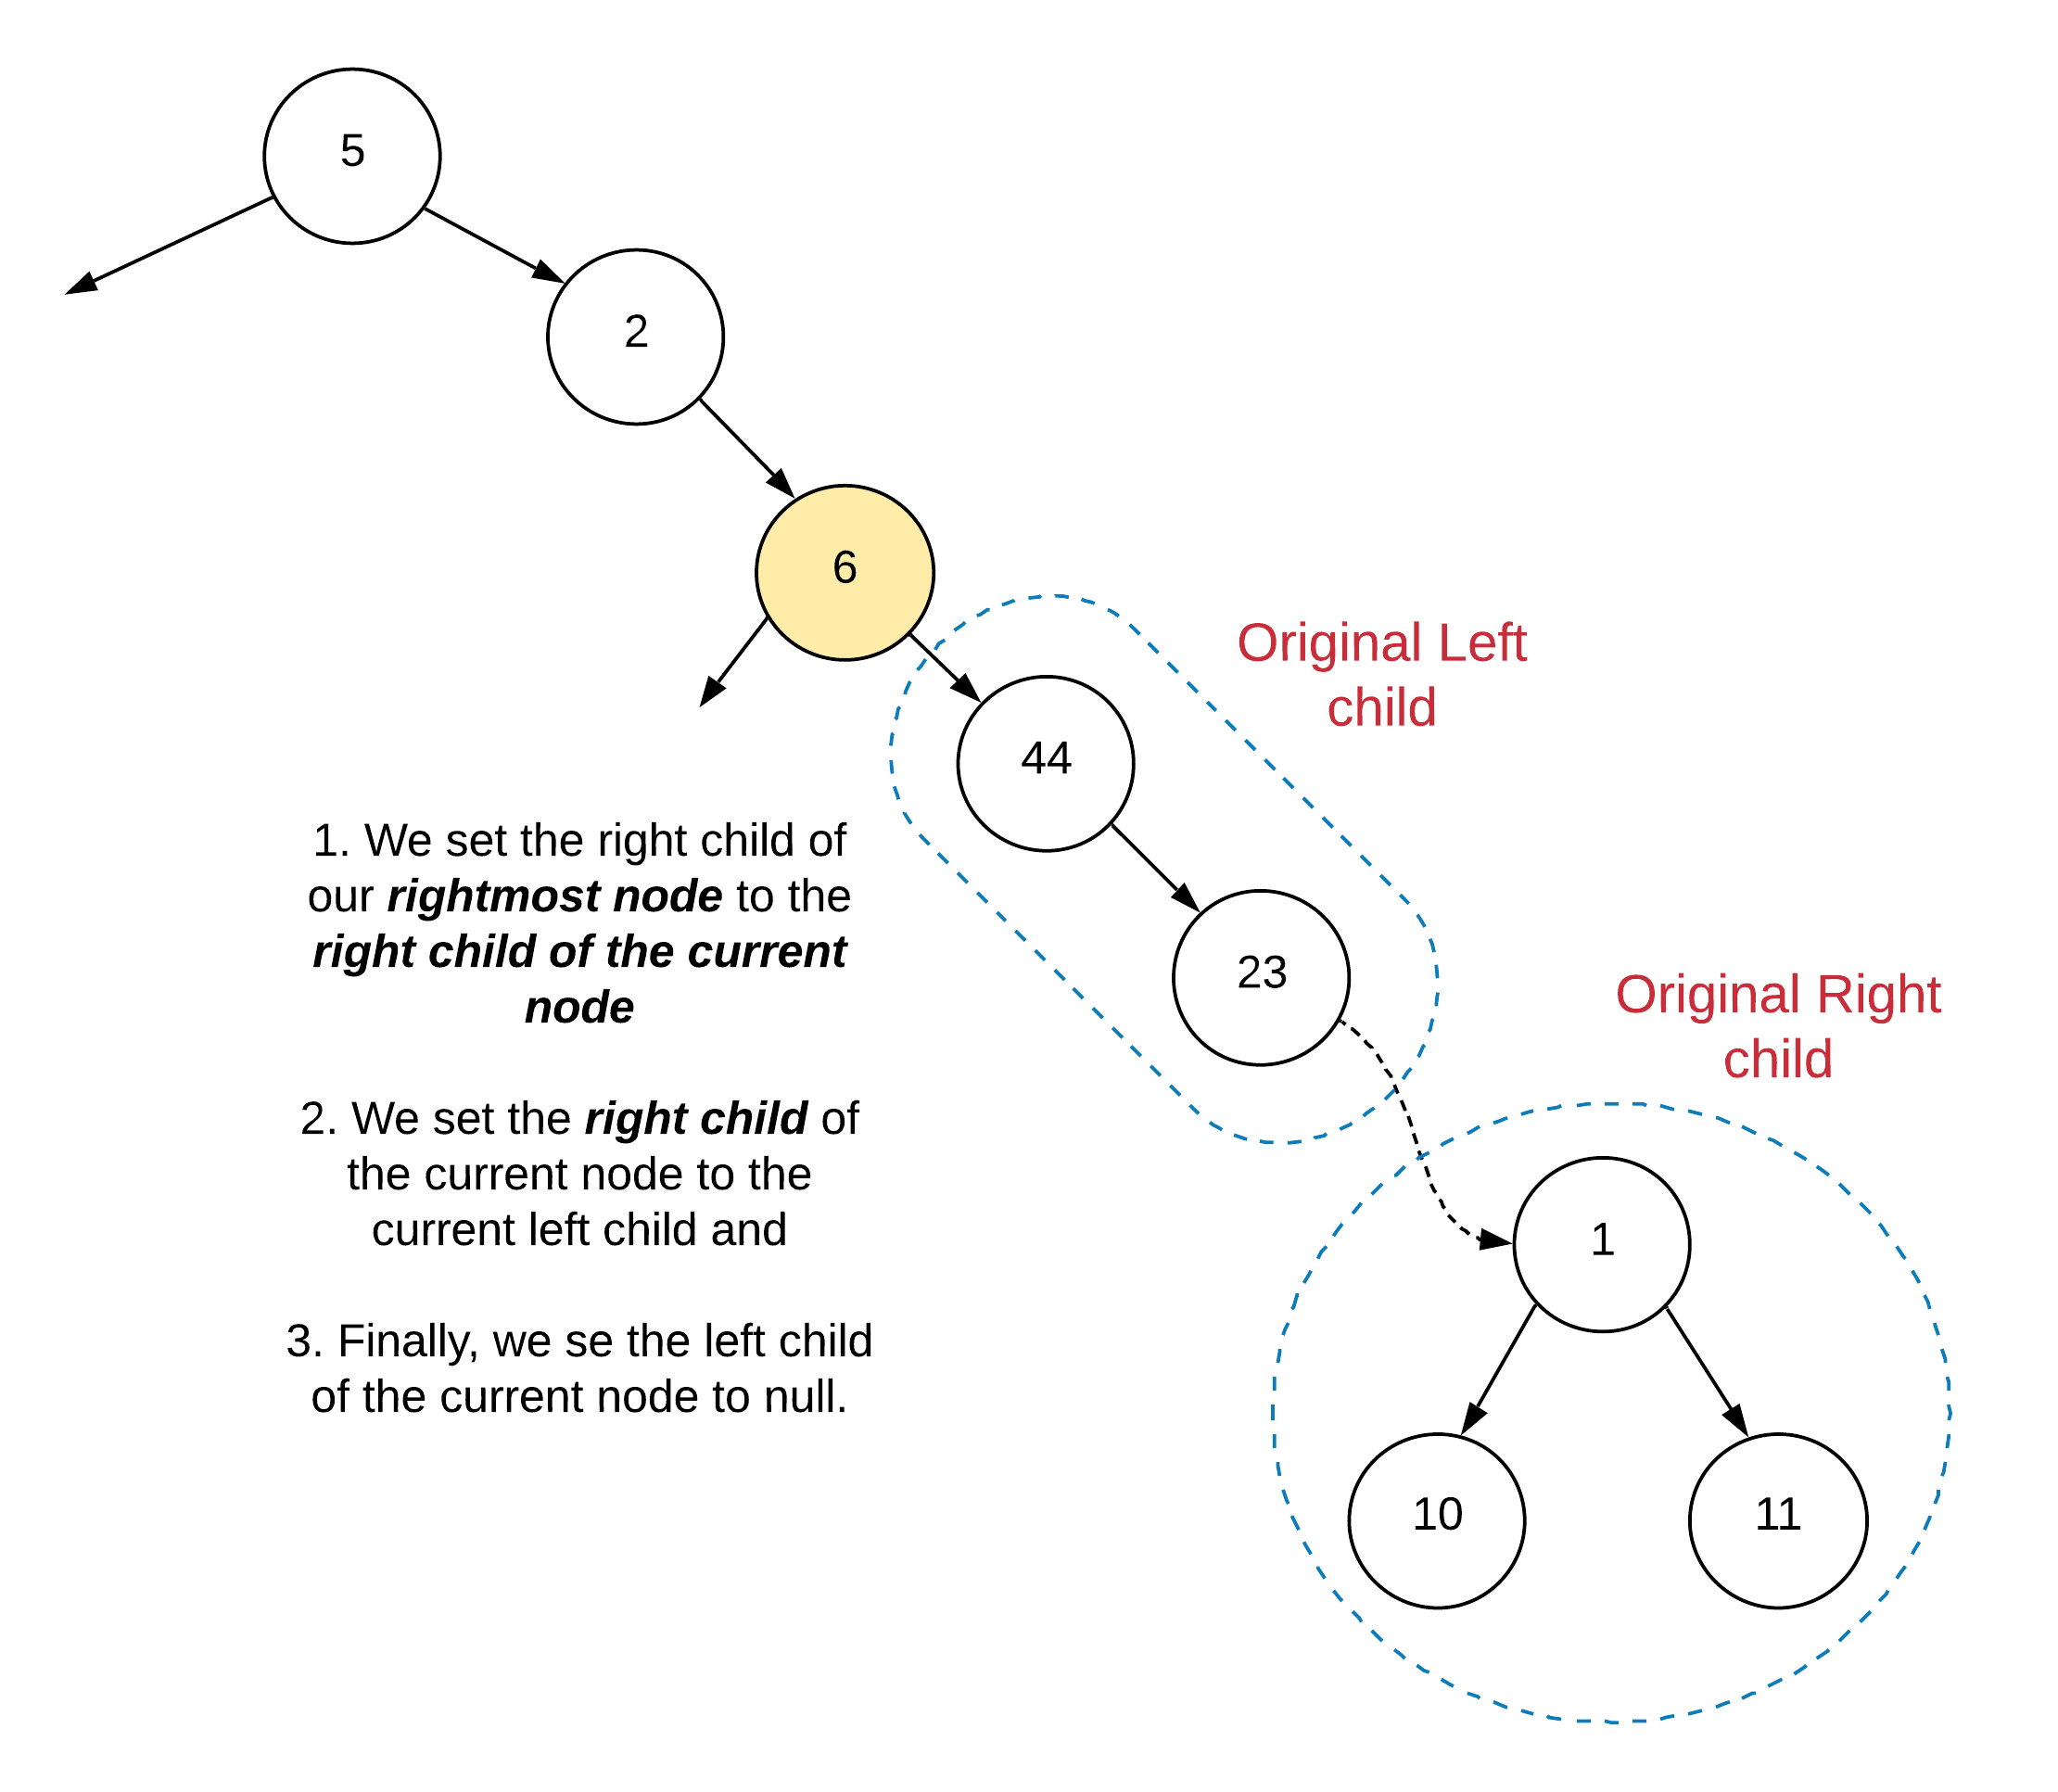

In [ ]:
class Solution:
    
    def flatten(self, root: TreeNode) -> None:
        '''
            Do not return anything, modify root in-place instead
        '''        
        if not root:                                                      # null scenario
            return None
        
        node = root
        while node:            
            
            if node.left:                                                 # if left child                
                rightmost = node.left                                     # find the rightmost node
                while rightmost.right:
                    rightmost = rightmost.right
                
                rightmost.right = node.right                              # rewire connections
                node.right = node.left
                node.left = None            
            
            node = node.right                                             # move on to right side of tree

# Trees and Graphs

### 98. Validate Binary Search Tree
Given the root of a binary tree, determine if it is a valid binary search tree (BST).  
A valid BST is defined as follows:
* The left subtree of a node contains only nodes with keys less than the node's key.
* The right subtree of a node contains only nodes with keys greater than the node's key.
* Both the left and right subtrees must also be binary search trees. 

Example 1:
Input: root = [2,1,3]
Output: true

Example 2:
Input: root = [5,1,4,null,null,3,6]
Output: false
Explanation: The root node's value is 5 but its right child's value is 4.

Constraints:
* Num of nodes in the range [1, 104].
* -2^31 <= Node.val <= 2^31 - 1

Solution:
* Check if each element in inorder is smaller than the next one

In [ ]:
import math

class TreeNode:
     def __init__(self, val=0, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right

def isValidBST(self, root: TreeNode) -> bool:
    '''
        Iterative. O(n), O(n)    
    '''        
    stack, prev = [], -math.inf

    while stack or root:
                
        while root:
            stack.append(root)
            root = root.left
        
        # If next elem in inorder traversal < prev elem => not BST
        root = stack.pop()        
        if root.val <= prev:
            return False
        prev = root.val
        root = root.right

    return True

### 124. Binary Tree Maximum Path Sum
Path in binary tree - sequence of adjacent nodes (connected with edges). A node appears in seq only once. Path does not need to pass through root. Sum path = sum of node's values.

Given root of binary tree, return any max sum path

Example 1:
Input: root = [1,2,3]
Output: 6
Explanation: The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.

Example 2:
Input: root = [-10,9,20,null,null,15,7]
Output: 42
Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.

Constraints:
* The number of nodes in the tree is in the range [1, 3 * 10^4].
* -1000 <= Node.val <= 1000     

In [264]:
# Definition for a binary tree node.
class TreeNode:

    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:
        
        def max_gain(node):
                        
            nonlocal max_sum
                        
            if not node:
                return 0
            
            left_sum    = max( max_gain(node.left), 0 )                  # max sum for left and right sub-trees
            right_sum   = max( max_gain(node.right), 0 )                 # 0 - because neg nums decrease sum
            newpath_sum = node.val + left_sum + right_sum                # gain for new path with `node` at top            
            
            max_sum = max(max_sum, newpath_sum)                          # update max_sum
        
            return node.val + max(left_sum, right_sum)                   # for recursion
                
   
        max_sum = float('-inf')
        max_gain( root )
                
        return max_sum

### 133. Clone Graph
Given reference of a node, always the first node with val = 1, in a connected undirected graph, return a __deep copy (clone)__ of the graph. Each node has a value (int) and a an list of neighbors.

Example 1:
Input: adjList = [[2,4],[1,3],[2,4],[1,3]]
Output: [[2,4],[1,3],[2,4],[1,3]]
Explanation: There are 4 nodes in the graph.
1st node (val = 1)'s neighbors are 2nd node (val = 2) and 4th node (val = 4)
2nd node (val = 2)'s neighbors are 1st node (val = 1) and 3rd node (val = 3)
3rd node (val = 3)'s neighbors are 2nd node (val = 2) and 4th node (val = 4)
4th node (val = 4)'s neighbors are 1st node (val = 1) and 3rd node (val = 3)

Example 2:
Input: adjList = [[]]
Output: [[]]
Explanation: Note that the input contains one empty list. The graph consists of only one node with val = 1 and it does not have any neighbors.

Example 3:
Input: adjList = []
Output: []
Explanation: This an empty graph, it does not have any nodes.

Example 4:
Input: adjList = [[2],[1]]
Output: [[2],[1]]

Constraints:
* The number of nodes in the graph is in the range [0, 100].
* 1 <= Node.val <= 100
* Node.val is unique for each node.
* There are no repeated edges and no self-loops in the graph.
* The Graph is connected and all nodes can be visited starting from the given node.

__Solution: DFS or BFS when visited is actually a dict[curr_node] = cloned_node__

In [ ]:
# Definition for a Node.
class Node:
    def __init__(self, val=0, neighbors=None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

        
class Solution:
    def cloneGraph(self, start: 'Node') -> 'Node':
                
        if not node:
            return node
        
        visited, queue = {}, [start]                               # Dict[visited node] = its clone, to avoid cycles
        visited[start] = Node(start.val, [])                       # Clone it, put into visited

        while queue:
            vertex = queue.pop(0)                                  # get node            
            for neighbor in vertex.neighbors:                      # Iterate neighbors
                if neighbor not in visited:
                    visited[neighbor] = Node(neighbor.val, [])     # Clone them, put into visited
                    queue.append(neighbor)                
                visited[n].neighbors.append(visited[neighbor])     # Add clone of neighbor to clone's neighbors

        return visited[node]

### 199. Binary Tree Right Side View
BT, you stand on the right side, return values of nodes you can see ordered from top to bottom 

Example 1:
Input: root = [1,2,3,null,5,null,4]
Output: [1,3,4]

Example 2:
Input: root = [1,null,3]
Output: [1,3]

Example 3:
Input: root = []
Output: []

Constraints:
* The number of nodes in the tree is in the range [0, 100].
* -100 <= Node.val <= 100

__One out of 4 provided solutions - recursive DFS__:
* Time c.: O(N) - have to visit each node
* Space c.: O(H) - recursion stack (H = tree height). Worst-case - skewed tree, when H=N

In [ ]:
# Definition for a binary tree node
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:        
    def rightSideView(self, root: TreeNode) -> List[int]:
                
        if root is None:
            return []

        rightside = []

        def helper(node: TreeNode, level: int) -> None:
            
            if level == len(rightside):
                rightside.append(node.val)
                                
            for child in [node.right, node.left]:
                if child:
                    helper(child, level + 1)
                    
                    
        helper( root, 0 )

        return rightside

### 200. Number of Islands
Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.
An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

Example 1:
Input: grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
Output: 1

Example 2:
Input: grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
Output: 3

Constraints:
* m == grid.length
* n == grid[i].length
* 1 <= m, n <= 300
* grid[i][j] is '0' or '1'

In [15]:
def numIslands(grid):
    if not grid:
        return 0        
    count = 0
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '1':
                dfs(grid, i, j)
                count += 1
    return count

def dfs(grid, i, j):
    if i<0 or j<0 or i>=len(grid) or j>=len(grid[0]) or grid[i][j] != '1':
        return
    grid[i][j] = '#'    # can be anything, but 1
    dfs(grid, i+1, j)
    dfs(grid, i-1, j)
    dfs(grid, i, j+1)
    dfs(grid, i, j-1)

In [18]:
grid = [ ["1","1","0","0","0"],
         ["1","1","0","0","0"],
         ["0","0","1","0","0"],
         ["0","0","0","1","1"], ]
print(numIslands(grid))

3


### 236. Lowest Common Ancestor of a Binary Tree
Given a binary tree, find the lowest common ancestor (LCA) of two given nodes. Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow __a node to be a descendant of itself__).”

Example 1:
Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1
Output: 3
Explanation: The LCA of nodes 5 and 1 is 3.

Example 2:
Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 4
Output: 5
Explanation: The LCA of nodes 5 and 4 is 5, since a node can be a descendant of itself according to the LCA definition.

Example 3:
Input: root = [1,2], p = 1, q = 2
Output: 1

Constraints:
* The number of nodes in the tree is in the range [2, 10^5].
* -10^9 <= Node.val <= 10^9
* All Node.val are unique.
* p != q
* p and q will exist in the tree.

__Below is a solution from my notebook (accepted by LeetCode; simpler than any of the 4 LeetCode solutions__:
* Time c. O(N) - visiting all N nodes in the worst case
* Space c. O(N) - skewed binary tree with height N => parent pointer dictionary and the ancestor set would be N long each

In [ ]:
# Definition for a binary tree node
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

        
def lca(root, p, q):
    """
    SIMPLER THAN ANY LEETCODE SOLUTION
    :type root: TreeNode
    :type p: TreeNode
    :type q: TreeNode
    :rtype: TreeNode
    """
    if not root or root is p or root is q:         # base case
        return root

    left = lca(root.left, p, q)
    right = lca(root.right, p, q)

    if left and right:                            # this is lca
        return root

    return left if left else right                # p,q are both on one side of the tree

### 257. Binary Tree Paths
Given the root of a binary tree, return all root-to-leaf paths in any order. Leaf = node with no children 

Example 1:
Input: root = [1,2,3,null,5]
Output: ["1->2->5","1->3"]

Example 2:
Input: root = [1]
Output: ["1"]

Constraints:
* The number of nodes in the tree is in the range [1, 100].
* -100 <= Node.val <= 100

Complexity:
* Time c. O(N) - each node visited once.
* Space c. O(N) - we could keep up to the entire tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def binaryTreePaths(self, root):
        '''
            Recursive solution
        '''
        def get_path(root, path):
                        
            if root:
                path += str(root.val)
                                
                if not root.left and not root.right:                               # reached leaf
                    paths.append(path)
                else:
                    path += '->'
                    get_path(root.left, path)
                    get_path(root.right, path)

        paths = []
        get_path(root, '')
                
        return paths
        
    
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        '''
            Iterative slution
        '''
        if not root:
            return []
        
        paths = []
        stack = [(root, str(root.val))]
        while stack:
            node, path = stack.pop()
            if not node.left and not node.right:
                paths.append(path)
            if node.left:
                stack.append((node.left, path + '->' + str(node.left.val)))
            if node.right:
                stack.append((node.right, path + '->' + str(node.right.val)))
        
        return paths

### 269. Alien Dictionary (FB interview per LeetCode's Discussions)

* A new alien language uses the English alphabet, but order among letters is unknown
* You are given a list of strings - words from the alien language's dictionary. Words are sorted lexicographically by the rules of the new language
* Return a string of unique letters sorted in lexicographically increasing order per new language. No solution - return "". Multiple solutions - return any.
* Str s is lexicographically smaller than str t if at first letter where they differ, letter in s comes before letter in t. If first min(s.length, t.length) letters are same => s is smaller iff s.length < t.length.

Example 1:  
Input: words = ["wrt","wrf","er","ett","rftt"]  
Output: "wertf"

Example 2:  
Input: words = ["z","x"]  
Output: "zx"

Example 3:  
Input: words = ["z","x","z"]  
Output: ""  
Explanation: The order is invalid, so return "".

Constraints:
* 1 <= words.length <= 100
* 1 <= words[i].length <= 100
* words[i] consists of only lowercase English letters.

__Solution__  
1) BFS  
a) get dependencies for each letter in the form of a graph's adjacency list,  
b) topological sort

__Complexity__
* __Time c. O(C)__
* N - # strings
* C - total length of all words in input list
* U - total num unique letters in alphabet
* There were three parts to the algorithm; identifying all the relations, putting them into an adjacency list, and then converting it into a valid alphabet ordering.
* In the worst case, the first and second parts require checking every letter of every word (if the difference between two words was always in the last letter) - O(C)
* For the third part, recall that a breadth-first search has a cost of O(V+E), V = num vertices and E = num edges
* __Space c. O(1)__ or O(U + \min(U^2, N))O(U+min(U

In [ ]:
def alienOrder(self, words: List[str]) -> str:
    
    adj_list  = defaultdict(set)                                                 # adj_list for each letter
    in_degree = Counter({c : 0 for word in words for c in word})                 # in_degree of each unique letter
            
    
    for first_word, second_word in zip(words, words[1:]):                     # populate both for pairs adjacent words
        for c, d in zip(first_word, second_word):
            if c != d:
                if d not in adj_list[c]:
                    adj_list[c].add(d)
                    in_degree[d] += 1
                break
        else:                                                             # if one word is followed by its prefix -
            if len(second_word) < len(first_word): return ''              # can't find ordering for entire list!
    
    output = []
    queue = deque([c for c in in_degree if in_degree[c] == 0])
    while queue:                                                          # toposort
        c = queue.popleft()
        output.append(c)
        for d in adj_list[c]:
            in_degree[d] -= 1
            if in_degree[d] == 0:
                queue.append(d)
                
    
    if len(output) < len(in_degree):                      # if not all letters in output - cycle => no valid ordering
        return ''
    
    return ''.join(output)

### 543. Diameter of Binary Tree
Return the length of the diameter of a binary tree = length of the longest path between any two nodes (may or may not pass through root). Length of a path = num edges

Example 1:
Input: root = [1,2,3,4,5]
Output: 3
Explanation: 3 is the length of the path [4,2,1,3] or [5,2,1,3].

Example 2:
Input: root = [1,2]
Output: 1

Constraints:
* The number of nodes in the tree is in the range [1, 10^4].
* -100 <= Node.val <= 100

__Complexity__
* Time c. O(N). This is because in our recursion function longestPath, we only enter and exit from each node once. We know this because each node is entered from its parent, and in a tree, nodes only have one parent.
* Space c. O(N). The space complexity depends on the size of our implicit call stack during our DFS, which relates to the height of the tree. In the worst case, the tree is skewed so the height of the tree is O(N)O(N). If the tree is balanced, it'd be O(\log N)O(logN).

In [ ]:
class Solution:
    def diameterOfBinaryTree(self, root: TreeNode) -> int:        

        def longest_path(node):
            
            if not node:
                return 0
                        
            nonlocal diameter
            
            left_path  = longest_path(node.left)                                # longest path in left & right child
            right_path = longest_path(node.right)
            
            diameter = max(diameter, left_path + right_path)               # update if left_path + right_path > diam.
            
            return max(left_path, right_path) + 1                              # add 1 for connection to parent
                
        diameter = 0
        longest_path(root)
                
        return diameter

### 721. Accounts Merge
Given a list of accounts where each element accounts[i] is a list of strings, where the first element accounts[i][0] is a name, and the rest of the elements are emails representing emails of the account.

Now, we would like to merge these accounts. Two accounts definitely belong to the same person if there is some common email to both accounts. Note that even if two accounts have the same name, they may belong to different people as people could have the same name. A person can have any number of accounts initially, but all of their accounts definitely have the same name.

After merging the accounts, return the accounts in the following format: the first element of each account is the name, and the rest of the elements are emails in sorted order. The accounts themselves can be returned in any order.

Example 1:
Input: accounts = [["John","johnsmith@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com","john00@mail.com"],["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]
Output: [["John","john00@mail.com","john_newyork@mail.com","johnsmith@mail.com"],["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]
Explanation:
The first and second John's are the same person as they have the common email "johnsmith@mail.com".
The third John and Mary are different people as none of their email addresses are used by other accounts.
We could return these lists in any order, for example the answer [['Mary', 'mary@mail.com'], ['John', 'johnnybravo@mail.com'], 
['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com']] would still be accepted.

Example 2:
Input: accounts = [["Gabe","Gabe0@m.co","Gabe3@m.co","Gabe1@m.co"],["Kevin","Kevin3@m.co","Kevin5@m.co","Kevin0@m.co"],["Ethan","Ethan5@m.co","Ethan4@m.co","Ethan0@m.co"],["Hanzo","Hanzo3@m.co","Hanzo1@m.co","Hanzo0@m.co"],["Fern","Fern5@m.co","Fern1@m.co","Fern0@m.co"]]
Output: [["Ethan","Ethan0@m.co","Ethan4@m.co","Ethan5@m.co"],["Gabe","Gabe0@m.co","Gabe1@m.co","Gabe3@m.co"],["Hanzo","Hanzo0@m.co","Hanzo1@m.co","Hanzo3@m.co"],["Kevin","Kevin0@m.co","Kevin3@m.co","Kevin5@m.co"],["Fern","Fern0@m.co","Fern1@m.co","Fern5@m.co"]]

Constraints:
* 1 <= accounts.length <= 1000
* 2 <= accounts[i].length <= 10
* 1 <= accounts[i][j] <= 30
* accounts[i][0] consists of English letters
* accounts[i][j] (for j > 0) is a valid email



__Solution__:
For each account, draw edge from 1st email to other emails. Also, create 'emails to names' map. Then DFS and add each connected component to answer

__Complexity__:
* Time c. O(\sum a_i \log a_i), where a_i is the length of accounts[i]. Without the log factor, this is the complexity to build the graph and search for each component. The log factor is for sorting each component at the end.
* Space c. O(\sum a_i) - the space used by our graph and our search

In [ ]:
class Solution(object):
    def accountsMerge(self, accounts):
        em_to_name = {}
        graph = collections.defaultdict(set)
        for acc in accounts:
            name = acc[0]
            for email in acc[1:]:
                graph[acc[1]].add(email)
                graph[email].add(acc[1])
                em_to_name[email] = name

        seen = set()
        ans = []
        for email in graph:
            if email not in seen:
                seen.add(email)
                stack = [email]
                component = []
                while stack:
                    node = stack.pop()
                    component.append(node)
                    for nei in graph[node]:
                        if nei not in seen:
                            seen.add(nei)
                            stack.append(nei)
                ans.append([em_to_name[email]] + sorted(component))
        return ans

## LeetCode Facebook problems not reviewed

### 785. Is Graph Bipartite?
There is an undirected graph with n nodes, where each node is numbered between 0 and n - 1. You are given a 2D array graph, where graph[u] is an array of nodes that node u is adjacent to. More formally, for each v in graph[u], there is an undirected edge between node u and node v. The graph has the following properties:

There are no self-edges (graph[u] does not contain u).
There are no parallel edges (graph[u] does not contain duplicate values).
If v is in graph[u], then u is in graph[v] (the graph is undirected).
The graph may not be connected, meaning there may be two nodes u and v such that there is no path between them.
A graph is bipartite if the nodes can be partitioned into two independent sets A and B such that every edge in the graph connects a node in set A and a node in set B.

Return true if and only if it is bipartite. 

Example 1:
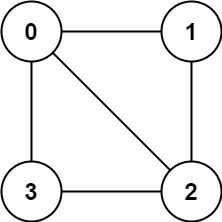
Input: graph = [[1,2,3],[0,2],[0,1,3],[0,2]]
Output: false
Explanation: There is no way to partition the nodes into two independent sets such that every edge connects a node in one and a node in the other.

Example 2:
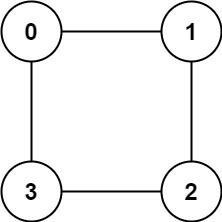
Input: graph = [[1,3],[0,2],[1,3],[0,2]]
Output: true
Explanation: We can partition the nodes into two sets: {0, 2} and {1, 3}.

Constraints:
* graph.length == n
* 1 <= n <= 100
* 0 <= graph[u].length < n
* 0 <= graph[u][i] <= n - 1
* graph[u] does not contain u.
* All the values of graph[u] are unique.
* If graph[u] contains v, then graph[v] contains u.

Time c.:
* O(N+E), where N is the number of nodes in the graph, and E is the number of edges. We explore each node once when we transform it from uncolored to colored, traversing all its edges in the process
* Space Complexity: O(N)O(N), the space used to store the color

In [ ]:
class Solution(object):
    def isBipartite(self, graph):
        color = {}
        for node in xrange(len(graph)):
            if node not in color:
                stack = [node]
                color[node] = 0
                while stack:
                    node = stack.pop()
                    for nei in graph[node]:
                        if nei not in color:
                            stack.append(nei)
                            color[nei] = color[node] ^ 1
                        elif color[nei] == color[node]:
                            return False
        return True

### 314. Binary Tree Vertical Order Traversal
Given the root of a binary tree, return the vertical order traversal of its nodes' values. (i.e., from top to bottom, column by column). If two nodes are in the same row and column, the order should be from left to right.

Example 1:
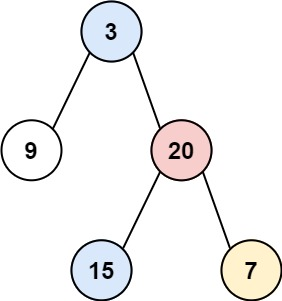
Input: root = [3,9,20,null,null,15,7]
Output: [[9],[3,15],[20],[7]]

Example 2:
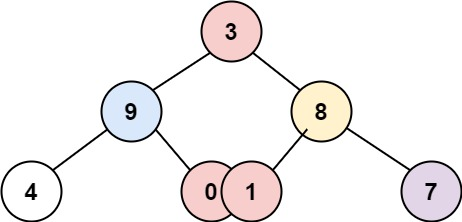
Input: root = [3,9,8,4,0,1,7]
Output: [[4],[9],[3,0,1],[8],[7]]

Example 3:
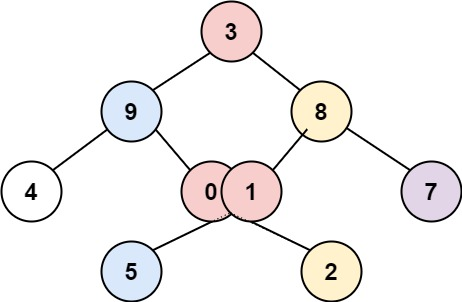
Input: root = [3,9,8,4,0,1,7,null,null,null,2,5]
Output: [[4],[9,5],[3,0,1],[8,2],[7]]

Example 4:
Input: root = []
Output: []

Constraints:
* The number of nodes in the tree is in the range [0, 100].
* -100 <= Node.val <= 100

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
from collections import defaultdict
class Solution:
    def verticalOrder(self, root: TreeNode) -> List[List[int]]:
        '''
            DFS
            Time c. O(NlogN) where NN is the number of nodes in the tree
            Space c. O(N)
        '''
        columnTable = defaultdict(list)
        queue = deque([(root, 0)])

        while queue:
            node, column = queue.popleft()

            if node is not None:
                columnTable[column].append(node.val)
                
                queue.append((node.left, column - 1))
                queue.append((node.right, column + 1))
                        
        return [columnTable[x] for x in sorted(columnTable.keys())]

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
from collections import defaultdict
class Solution:
    def verticalOrder(self, root: TreeNode) -> List[List[int]]:
        '''
            BFS
            Time c. O(N)
            Space c. O(N)
        '''
        if root is None:
            return []

        columnTable = defaultdict(list)
        min_column = max_column = 0
        queue = deque([(root, 0)])

        while queue:
            node, column = queue.popleft()

            if node is not None:
                columnTable[column].append(node.val)
                min_column = min(min_column, column)
                max_column = max(max_column, column)

                queue.append((node.left, column - 1))
                queue.append((node.right, column + 1))

        return [columnTable[x] for x in range(min_column, max_column + 1)]

### 317. Shortest Distance from All Buildings
You are given an m x n grid grid of values 0, 1, or 2, where:
each 0 marks an empty land that you can pass by freely,
each 1 marks a building that you cannot pass through, and
each 2 marks an obstacle that you cannot pass through.
You want to build a house on an empty land that reaches all buildings in the shortest total travel distance. You can only move up, down, left, and right.

Return the shortest travel distance for such a house. If it is not possible to build such a house according to the above rules, return -1.

The total travel distance is the sum of the distances between the houses of the friends and the meeting point.

The distance is calculated using Manhattan Distance, where distance(p1, p2) = |p2.x - p1.x| + |p2.y - p1.y|.

Example 1:
Input: grid = [[1,0,2,0,1],[0,0,0,0,0],[0,0,1,0,0]]
Output: 7
Explanation: Given three buildings at (0,0), (0,4), (2,2), and an obstacle at (0,2).
The point (1,2) is an ideal empty land to build a house, as the total travel distance of 3+3+1=7 is minimal.
So return 7.

Example 2:
Input: grid = [[1,0]]
Output: 1

Example 3:
Input: grid = [[1]]
Output: -1

Constraints:
* m == grid.length
* n == grid[i].length
* 1 <= m, n <= 50
* grid[i][j] is either 0, 1, or 2.
* There will be at least one building in the grid.

In [ ]:
class Solution:
    def shortestDistance(self, grid: List[List[int]]) -> int:
        rows = len(grid)
        cols = len(grid[0])
        dirs = [(0, 1), (1, 0), (-1, 0), (0, -1)]
        
        total_sum = [[0] * cols for _ in range(rows)]
        
        def bfs(row, col, curr_count):
            min_distance = math.inf
            queue = deque()
            queue.append([row, col, 0])
            while queue:
                curr_row, curr_col, curr_step = queue.popleft()
                for d in dirs:
                    next_row = curr_row + d[0]
                    next_col = curr_col + d[1]
                    if 0 <= next_row < rows and 0 <= next_col < cols and grid[next_row][next_col] == -curr_count:
                        total_sum[next_row][next_col] += curr_step + 1
                        min_distance = min(min_distance, total_sum[next_row][next_col])
                        grid[next_row][next_col] -= 1
                        queue.append([next_row, next_col, curr_step + 1])
            return min_distance
                
        count = 0
        for row in range(rows):
            for col in range(cols):
                if grid[row][col] == 1:
                    min_distance = bfs(row, col, count)
                    count += 1
                    if min_distance == math.inf:
                        return -1
        
        return min_distance

### 67. Add Binary
Two binary str a and b, return their sum as a binary string. 

Example 1:
Input: a = "11", b = "1"
Output: "100"

Example 2:
Input: a = "1010", b = "1011"
Output: "10101"

Constraints:
* 1 <= a.length, b.length <= 104
* a and b consist only of '0' or '1' characters.
* Each string does not contain leading zeros except for the zero itself

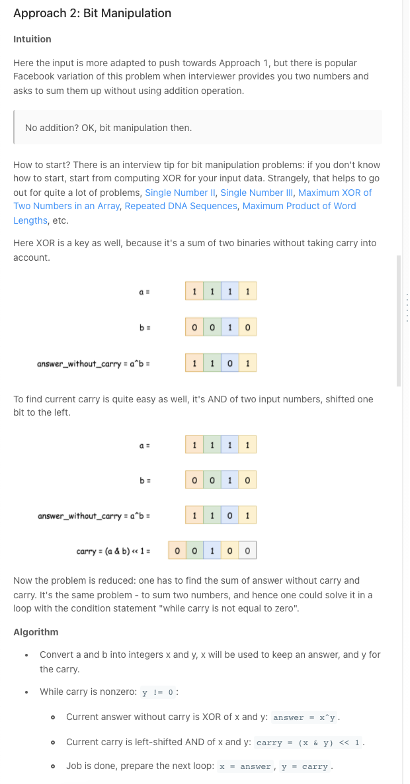

In [59]:
def addBinary(a: str, b: str) -> str:
    '''
        O(N+M)
        Low performance if large input numbers
    '''
    return '{0:b}'.format(int(a, 2) + int(b, 2))


def addBinary2(a, b) -> str:
    '''
        Time c. O(N+M)
        Space c. O(max(N,M))
        Read approach 2 above - bitwise operations
        x stores the answer, y stores the carry
    '''    
    x, y = int(a, 2), int(b, 2)
    while y:
        # shorter: x, y = x ^ y, (x & y) << 1
        answer = x ^ y
        carry = (x & y) << 1
        x, y = answer, carry
    return bin(x)[2:]                                 # returns binary string of int which starts with '0b' (to avoid)

a = "11"
b = "1"
print( addBinary2(a,b) )

a = "1010"
b = "1011"
print( addBinary2(a,b) )

100
10101


In [60]:
bin(10)

'0b1010'

In [ ]:
# USING CARRY AND ADDITION - better time. c, but is not an answer to a question "Do it without summing up"
def addBinary(a, b) -> str:
    '''
        Time c. O(max(N,M)), N & M =m len of a & b
        Space c. O(max(N,M)) to keep the answer    
    '''
    n = max(len(a), len(b))
    a, b = a.zfill(n), b.zfill(n)

    carry = 0
    answer = []
    for i in range(n - 1, -1, -1):
        if a[i] == '1':
            carry += 1
        if b[i] == '1':
            carry += 1

        if carry % 2 == 1:
            answer.append('1')
        else:
            answer.append('0')

        carry //= 2

    if carry == 1:
        answer.append('1')
    answer.reverse()

    return ''.join(answer)

### 31. Next Permutation

Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers. If such an arrangement is not possible, it must rearrange it as the lowest possible order (i.e., sorted in ascending order). The replacement must be in place and use only constant extra memory.

Example 1:
Input: nums = [1,2,3]
Output: [1,3,2]

Example 2:
Input: nums = [3,2,1]
Output: [1,2,3]

Example 3:
Input: nums = [1,1,5]
Output: [1,5,1]

Example 4:
Input: nums = [1]
Output: [1]

Constraints:
* 1 <= nums.length <= 100
* 0 <= nums[i] <= 100

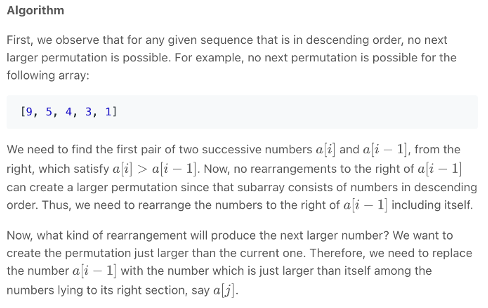

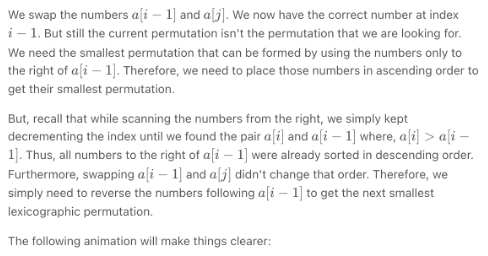

__Another explanation (condensed mathematical description)__:
* Find largest index i such that array[i − 1] < array[i]. (If no such i exists, then this is already the last permutation.)
* Find largest index j such that j ≥ i and array[j] > array[i − 1].
* Swap array[j] and array[i − 1].
* Reverse the suffix starting at array[i].
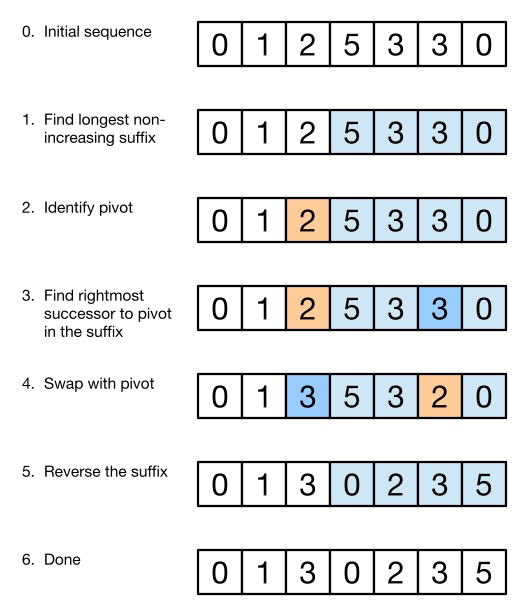
Source: https://www.nayuki.io/page/next-lexicographical-permutation-algorithm

In [10]:
def nextPermutation(nums: List[int]) -> None:
    '''
        Runtime: 32 ms, faster than 98.61% of Python3 online submissions for Next Permutation
        Memory Usage: 14.3 MB, less than 19.08% of Python3 submissions - IN PLACE, WHAT MEMORY USAGE?
    '''    
    i = len(nums)-2
    while i >= 0 and nums[i+1] <= nums[i]:      # find first nums[i] from right that's > than its right neighbor
        i -= 1
    
    if i >= 0:
        j = len(nums)-1                         # find first nums[j] from right that's > than nums[i]
        while nums[j] <= nums[i]:
            j -= 1
        nums[i], nums[j] = nums[j], nums[i]     # swap them
    
    reverse(nums, i+1)                          # all nums to right of nums[i] are in non-incresing oder -
                                                # reverse them for next lexicographical permutation

def reverse( nums: List[int], start: int) -> None:
        
    i, j = start, len(nums)-1
    while i < j:
        nums[i], nums[j] = nums[j], nums[i]
        i += 1
        j -= 1
        
a1 = [1,2,3]
a2 = [3,2,1]
a3 = [1,1,5]
a4 = [1]

for a in [a1, a2, a3, a4]:
    nextPermutation(a)
    print(a)

[1, 3, 2]
[1, 2, 3]
[1, 5, 1]
[1]


# Part VI. Recursion

## 46. Permutations
Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.

Example 1:
Input: nums = [1,2,3]
Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

Example 2:
Input: nums = [0,1]
Output: [[0,1],[1,0]]

Example 3:
Input: nums = [1]
Output: [[1]]

Constraints:

1 <= nums.length <= 6
-10 <= nums[i] <= 10
All the integers of nums are unique

Algorithm

Backtracking is an algorithm for finding all solutions by exploring all potential candidates. If the solution candidate turns to be not a solution (or at least not the last one), backtracking algorithm discards it by making some changes on the previous step, i.e. backtracks and then try again.

Here is a backtrack function which takes the index of the first integer to consider as an argument backtrack(first).

If the first integer to consider has index n that means that the current permutation is done.
Iterate over the integers from index first to index n - 1.
Place i-th integer first in the permutation, i.e. swap(nums[first], nums[i]).
Proceed to create all permutations which starts from i-th integer : backtrack(first + 1).
Now backtrack, i.e. swap(nums[first], nums[i]) back

In [ ]:
# time = O(∑(N,k=1) P(N,k)); where P(N,k)= N! / (N−k)! = N(N−1)...(N−k+1); O(N!)
class Solution:
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        def backtrack(first = 0):
            # if all integers are used up
            if first == n:  
                output.append(nums[:])
            for i in range(first, n):
                # place i-th integer first 
                # in the current permutation
                nums[first], nums[i] = nums[i], nums[first]
                # use next integers to complete the permutations
                backtrack(first + 1)
                # backtrack
                nums[first], nums[i] = nums[i], nums[first]
        
        n = len(nums)
        output = []
        backtrack()
        return output

## 47. Permutations II
Given a collection of numbers, nums, that might contain duplicates, return all possible unique permutations in any order.

Example 1:
Input: nums = [1,1,2]
Output:
[[1,1,2],
 [1,2,1],
 [2,1,1]]

Example 2:
Input: nums = [1,2,3]
Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

Constraints:

1 <= nums.length <= 8
-10 <= nums[i] <= 10

Algorithm

Given the above insight, in order to find out all the unique numbers at each stage, we can build a hash table (denoted as counter), with each unique number as the key and its occurrence as the corresponding value.

To implement the algorithm, first we define a function called backtrack(comb, counter) which generates all permutations, starting from the current combination (comb) and the remaining numbers (counter).

Once the function is implemented, it suffices to invoke the function with the initial empty combination and the hash table we built out of the input array, to solve the problem

In [ ]:
# time = O(∑(N,k=1) P(N,k)); where P(N,k)= N! / (N−k)! = N(N−1)...(N−k+1); O(N!)
class Solution:
    def permuteUnique(self, nums: List[int]) -> List[List[int]]:
        results = []
        def backtrack(comb, counter):
            if len(comb) == len(nums):
                # make a deep copy of the resulting permutation,
                # since the permutation would be backtracked later.
                results.append(list(comb))
                return

            for num in counter:
                if counter[num] > 0:
                    # add this number into the current combination
                    comb.append(num)
                    counter[num] -= 1
                    # continue the exploration
                    backtrack(comb, counter)
                    # revert the choice for the next exploration
                    comb.pop()
                    counter[num] += 1

        backtrack([], Counter(nums))

        return results

## 301. Remove Invalid Parentheses
Given a string s that contains parentheses and letters, remove the minimum number of invalid parentheses to make the input string valid.

Return all the possible results. You may return the answer in any order.

Example 1:
Input: s = "()())()"
Output: ["(())()","()()()"]

Example 2:
Input: s = "(a)())()"
Output: ["(a())()","(a)()()"]

Example 3:
Input: s = ")("
Output: [""]

Constraints:

1 <= s.length <= 25
s consists of lowercase English letters and parentheses '(' and ')'.
There will be at most 20 parentheses in s

Algorithm

The overall algorithm remains exactly the same as before. The changes that we will incorporate are listed below:

The state of the recursion is now defined by five different variables:
index which represents the current character that we have to process in the original string.
left_count which represents the number of left parentheses that have been added to the expression we are building.
right_count which represents the number of right parentheses that have been added to the expression we are building.
left_rem is the number of left parentheses that remain to be removed.
right_rem represents the number of right parentheses that remain to be removed. Overall, for the final expression to be valid, left_rem == 0 and right_rem == 0.
When we decide to not consider a parenthesis i.e. delete a parenthesis, be it a left or a right parentheses, we have to consider their corresponding remaining counts as well. This means that we can only discard a left parentheses if left_rem > 0 and similarly for the right one we will check for right_rem > 0.
There are no changes to checks for considering a parenthesis. Only the conditions change for discarding a parenthesis.
Condition for an expression being valid in the base case would now become left_rem == 0 and right_rem == 0. Note that we don't have to check if left_count == right_count anymore because in the case of a valid expression, we would have removed all the misplaced or invalid parenthesis by the time the recursion ends. So, the only check we need if left_rem == 0 and right_rem == 0.

In [ ]:
# time = O(2^N), space = O(N)
class Solution:
    def removeInvalidParentheses(self, s):
        """
        :type s: str
        :rtype: List[str]
        """

        left = 0
        right = 0

        # First, we find out the number of misplaced left and right parentheses.
        for char in s:

            # Simply record the left one.
            if char == '(':
                left += 1
            elif char == ')':
                # If we don't have a matching left, then this is a misplaced right, record it.
                right = right + 1 if left == 0 else right

                # Decrement count of left parentheses because we have found a right
                # which CAN be a matching one for a left.
                left = left - 1 if left > 0 else left

        result = {}
        def recurse(s, index, left_count, right_count, left_rem, right_rem, expr):
            # If we reached the end of the string, just check if the resulting expression is
            # valid or not and also if we have removed the total number of left and right
            # parentheses that we should have removed.
            if index == len(s):
                if left_rem == 0 and right_rem == 0:
                    ans = "".join(expr)
                    result[ans] = 1
            else:

                # The discard case. Note that here we have our pruning condition.
                # We don't recurse if the remaining count for that parenthesis is == 0.
                if (s[index] == '(' and left_rem > 0) or (s[index] == ')' and right_rem > 0):
                    recurse(s, index + 1,
                            left_count,
                            right_count,
                            left_rem - (s[index] == '('),
                            right_rem - (s[index] == ')'), expr)

                expr.append(s[index])    

                # Simply recurse one step further if the current character is not a parenthesis.
                if s[index] != '(' and s[index] != ')':
                    recurse(s, index + 1,
                            left_count,
                            right_count,
                            left_rem,
                            right_rem, expr)
                elif s[index] == '(':
                    # Consider an opening bracket.
                    recurse(s, index + 1,
                            left_count + 1,
                            right_count,
                            left_rem,
                            right_rem, expr)
                elif s[index] == ')' and left_count > right_count:
                    # Consider a closing bracket.
                    recurse(s, index + 1,
                            left_count,
                            right_count + 1,
                            left_rem,
                            right_rem, expr)

                # Pop for backtracking.
                expr.pop()                 

        # Now, the left and right variables tell us the number of misplaced left and
        # right parentheses and that greatly helps pruning the recursion.
        recurse(s, 0, 0, 0, left, right, [])     
        return list(result.keys())

## 10. Regular Expression Matching
Given an input string s and a pattern p, implement regular expression matching with support for '.' and '*' where:

'.' Matches any single character.​​​​
'*' Matches zero or more of the preceding element.
The matching should cover the entire input string (not partial).

Example 1:
Input: s = "aa", p = "a"
Output: false
Explanation: "a" does not match the entire string "aa".

Example 2:
Input: s = "aa", p = "a*"
Output: true
Explanation: '*' means zero or more of the preceding element, 'a'. Therefore, by repeating 'a' once, it becomes "aa".

Example 3:
Input: s = "ab", p = ".*"
Output: true
Explanation: ".*" means "zero or more (*) of any character (.)".

Constraints:

1 <= s.length <= 20
1 <= p.length <= 30
s contains only lowercase English letters.
p contains only lowercase English letters, '.', and '*'.
It is guaranteed for each appearance of the character '*', there will be a previous valid character to match

Algorithm

We proceed with the same recursion as in Approach 1, except because calls will only ever be made to match(text[i:], pattern[j:]), we use \text{dp(i, j)}dp(i, j) to handle those calls instead, saving us expensive string-building operations and allowing us to cache the intermediate results

In [ ]:
# DP top down
# time = space = O(TP) where T,P = len of text and pattern
class Solution(object):
    def isMatch(self, text, pattern):
        memo = {}
        def dp(i, j):
            if (i, j) not in memo:
                if j == len(pattern):
                    ans = i == len(text)
                else:
                    first_match = i < len(text) and pattern[j] in {text[i], '.'}
                    if j+1 < len(pattern) and pattern[j+1] == '*':
                        ans = dp(i, j+2) or first_match and dp(i+1, j)
                    else:
                        ans = first_match and dp(i+1, j+1)

                memo[i, j] = ans
            return memo[i, j]

        return dp(0, 0)

In [ ]:
# DP bottom up
class Solution(object):
    def isMatch(self, text, pattern):
        dp = [[False] * (len(pattern) + 1) for _ in range(len(text) + 1)]

        dp[-1][-1] = True
        for i in range(len(text), -1, -1):
            for j in range(len(pattern) - 1, -1, -1):
                first_match = i < len(text) and pattern[j] in {text[i], '.'}
                if j+1 < len(pattern) and pattern[j+1] == '*':
                    dp[i][j] = dp[i][j+2] or first_match and dp[i+1][j]
                else:
                    dp[i][j] = first_match and dp[i+1][j+1]

        return dp[0][0]

## 78. Subsets
Given an integer array nums of unique elements, return all possible subsets (the power set). The solution set must not contain duplicate subsets. Return the solution in any order.

Example 1:
Input: nums = [1,2,3]
Output: [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

Example 2:
Input: nums = [0]
Output: [[],[0]]

Constraints:

1 <= nums.length <= 10
-10 <= nums[i] <= 10
All the numbers of nums are unique

Algorithm

We define a backtrack function named backtrack(first, curr) which takes the index of first element to add and a current combination as arguments.

If the current combination is done, we add the combination to the final output.

Otherwise, we iterate over the indexes i from first to the length of the entire sequence n.

Add integer nums[i] into the current combination curr.

Proceed to add more integers into the combination : backtrack(i + 1, curr).

Backtrack by removing nums[i] from curr

In [ ]:
# time = O(N*(2^N)), space = O(N)
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        def backtrack(first = 0, curr = []):
            # if the combination is done
            if len(curr) == k:  
                output.append(curr[:])
                return
            for i in range(first, n):
                # add nums[i] into the current combination
                curr.append(nums[i])
                # use next integers to complete the combination
                backtrack(i + 1, curr)
                # backtrack
                curr.pop()
        
        output = []
        n = len(nums)
        for k in range(n + 1):
            backtrack()
        return output

# Part V. Sorting and Searching

## 29. Divide Two Integers
Given two integers dividend and divisor, divide two integers without using multiplication, division, and mod operator.

The integer division should truncate toward zero, which means losing its fractional part. For example, 8.345 would be truncated to 8, and -2.7335 would be truncated to -2.

Return the quotient after dividing dividend by divisor.

Note: Assume we are dealing with an environment that could only store integers within the 32-bit signed integer range: [−231, 231 − 1]. For this problem, if the quotient is strictly greater than 231 - 1, then return 231 - 1, and if the quotient is strictly less than -231, then return -231.

Example 1:

Input: dividend = 10, divisor = 3
Output: 3
Explanation: 10/3 = 3.33333.. which is truncated to 3.

Example 2:
Input: dividend = 7, divisor = -3
Output: -2
Explanation: 7/-3 = -2.33333.. which is truncated to -2.

Constraints:

-231 <= dividend, divisor <= 231 - 1
divisor != 0

Algorithm

Again, we work with negative numbers to elegantly avoid overflow issues.

Hopefully you're getting the hang of the conditionals that have to work with negative, instead of positive, numbers!

In [ ]:
# time = space = O(logn)
def divide(self, dividend: int, divisor: int) -> int:

    # Constants.
    MAX_INT = 2147483647        # 2**31 - 1
    MIN_INT = -2147483648       # -2**31
    HALF_MIN_INT = -1073741824  # MIN_INT // 2

    # Special case: overflow.
    if dividend == MIN_INT and divisor == -1:
        return MAX_INT

    # We need to convert both numbers to negatives.
    # Also, we count the number of negatives signs.
    negatives = 2
    if dividend > 0:
        negatives -= 1
        dividend = -dividend
    if divisor > 0:
        negatives -= 1
        divisor = -divisor

    doubles = []
    powersOfTwo = []

    # Nothing too exciting here, we're just making a list of doubles of 1 and
    # the divisor. This is pretty much the same as Approach 2, except we're
    # actually storing the values this time. */
    powerOfTwo = 1
    while divisor >= dividend:
        doubles.append(divisor)
        powersOfTwo.append(powerOfTwo)
        # Prevent needless overflows from occurring...
        if divisor < HALF_MIN_INT:
            break
        divisor += divisor # Double divisor
        powerOfTwo += powerOfTwo

    # Go from largest double to smallest, checking if the current double fits.
    # into the remainder of the dividend.
    quotient = 0
    for i in reversed(range(len(doubles))):
        if doubles[i] >= dividend:
            # If it does fit, add the current powerOfTwo to the quotient.
            quotient += powersOfTwo[i]
            # Update dividend to take into account the bit we've now removed.
            dividend -= doubles[i]

    # If there was originally one negative sign, then
    # the quotient remains negative. Otherwise, switch
    # it to positive.
    return quotient if negatives != 1 else -quotient

## 33. Search in Rotated Sorted Array
There is an integer array nums sorted in ascending order (with distinct values).

Prior to being passed to your function, nums is possibly rotated at an unknown pivot index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

You must write an algorithm with O(log n) runtime complexity.

Example 1:
Input: nums = [4,5,6,7,0,1,2], target = 0
Output: 4

Example 2:
Input: nums = [4,5,6,7,0,1,2], target = 3
Output: -1

Example 3:
Input: nums = [1], target = 0
Output: -1

Constraints:

1 <= nums.length <= 5000
-10^4 <= nums[i] <= 10^4
All values of nums are unique.
nums is an ascending array that is possibly rotated.
-10^4 <= target <= 10^4

Algorithm (binary search in one pass)

As in the normal binary search, we keep two pointers (i.e. start and end) to track the search scope. At each iteration, we reduce the search scope into half, by moving either the start or end pointer to the middle (i.e. mid) of the previous search scope.

Here are the detailed breakdowns of the algorithm:

Initiate the pointer start to 0, and the pointer end to n - 1.

Perform standard binary search. While start <= end:

Take an index in the middle mid as a pivot.

If nums[mid] == target, the job is done, return mid.

Now there could be two situations:

Pivot element is larger than the first element in the array, i.e. the subarray from the first element to the pivot is non-rotated, as shown in the following graph.
pic

  - If the target is located in the non-rotated subarray:
  go left: `end = mid - 1`.

  - Otherwise: go right: `start = mid + 1`.
Pivot element is smaller than the first element of the array, i.e. the rotation index is somewhere between 0 and mid. It implies that the sub-array from the pivot element to the last one is non-rotated, as shown in the following graph.
pic

  - If the target is located in the non-rotated subarray:
  go right: `start = mid + 1`.

  - Otherwise: go left: `end = mid - 1`.

We're here because the target is not found. Return -1.

In [ ]:
# time = O(logn), space = O(1)
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        start, end = 0, len(nums) - 1
        while start <= end:
            mid = start + (end - start) // 2
            if nums[mid] == target:
                return mid
            elif nums[mid] >= nums[start]:
                if target >= nums[start] and target < nums[mid]:
                    end = mid - 1
                else:
                    start = mid + 1
            else:
                if target <= nums[end] and target > nums[mid]:
                    start = mid + 1
                else:
                    end = mid - 1
        return -1

## 50. Pow(x, n)
Implement pow(x, n), which calculates x raised to the power n (i.e., xn).

Example 1:
Input: x = 2.00000, n = 10
Output: 1024.00000

Example 2:
Input: x = 2.10000, n = 3
Output: 9.26100

Example 3:
Input: x = 2.00000, n = -2
Output: 0.25000
Explanation: 2-2 = 1/22 = 1/4 = 0.25

Constraints:

-100.0 < x < 100.0
-2^31 <= n <= 2^31-1
n is an integer.
-10^4 <= xn <= 10^4

Brute force approach: time = O(n), space =O(1), but there is a fas ter way

In [ ]:
# time = O(logn), space = O(1)
class Solution {
    public double myPow(double x, int n) {
        long N = n;
        if (N < 0) {
            x = 1 / x;
            N = -N;
        }
        double ans = 1;
        double current_product = x;
        for (long i = N; i > 0; i /= 2) {
            if ((i % 2) == 1) {
                ans = ans * current_product;
            }
            current_product = current_product * current_product;
        }
        return ans;
    }
};

## 162. Find Peak Element
A peak element is an element that is strictly greater than its neighbors.

Given a 0-indexed integer array nums, find a peak element, and return its index. If the array contains multiple peaks, return the index to any of the peaks.

You may imagine that nums[-1] = nums[n] = -∞. In other words, an element is always considered to be strictly greater than a neighbor that is outside the array.

You must write an algorithm that runs in O(log n) time.

Example 1:
Input: nums = [1,2,3,1]
Output: 2
Explanation: 3 is a peak element and your function should return the index number 2.

Example 2:
Input: nums = [1,2,1,3,5,6,4]
Output: 5
Explanation: Your function can return either index number 1 where the peak element is 2, or index number 5 where the peak element is 6.

Constraints:

1 <= nums.length <= 1000
-2^31 <= nums[i] <= 2^31 - 1
nums[i] != nums[i + 1] for all valid i.

Algorithm (for recursive (time=space=O(logn)) and iterative (time=O(logn), space=O(1) approaches)

We can view any given sequence in numsnums array as alternating ascending and descending sequences. By making use of this, and the fact that we can return any peak as the result, we can make use of Binary Search to find the required peak element.

In case of simple Binary Search, we work on a sorted sequence of numbers and try to find out the required number by reducing the search space at every step. In this case, we use a modification of this simple Binary Search to our advantage. We start off by finding the middle element, midmid from the given numsnums array. If this element happens to be lying in a descending sequence of numbers. or a local falling slope(found by comparing nums[i]nums[i] to its right neighbour), it means that the peak will always lie towards the left of this element. Thus, we reduce the search space to the left of midmid(including itself) and perform the same process on left subarray.

If the middle element, midmid lies in an ascending sequence of numbers, or a rising slope(found by comparing nums[i]nums[i] to its right neighbour), it obviously implies that the peak lies towards the right of this element. Thus, we reduce the search space to the right of midmid and perform the same process on the right subarray.

In this way, we keep on reducing the search space till we eventually reach a state where only one element is remaining in the search space. This single element is the peak element.

To see how it works, let's consider the three cases discussed above again.

Case 1. In this case, we firstly find 33 as the middle element. Since it lies on a falling slope, we reduce the search space to [1, 2, 3]. For this subarray, 22 happens to be the middle element, which again lies on a falling slope, reducing the search space to [1, 2]. Now, 11 acts as the middle element and it lies on a falling slope, reducing the search space to [1] only. Thus, 11 is returned as the peak correctly.

Case 2. In this case, we firstly find 33 as the middle element. Since it lies on a rising slope, we reduce the search space to [4, 5]. Now, 44 acts as the middle element for this subarray and it lies on a rising slope, reducing the search space to [5] only. Thus, 55 is returned as the peak correctly.

Case 3. In this case, the peak lies somewhere in the middle. The first middle element is 44. It lies on a rising slope, indicating that the peak lies towards its right. Thus, the search space is reduced to [5, 1]. Now, 55 happens to be the on a falling slope(relative to its right neighbour), reducing the search space to [5] only. Thus, 55 is identified as the peak element correctly.

In [ ]:
# Java, iterative
# time = O(logn), space = O(1)
public class Solution {
    public int findPeakElement(int[] nums) {
        int l = 0, r = nums.length - 1;
        while (l < r) {
            int mid = (l + r) / 2;
            if (nums[mid] > nums[mid + 1])
                r = mid;
            else
                l = mid + 1;
        }
        return l;
    }
}

## 278. First Bad Version
You are a product manager and currently leading a team to develop a new product. Unfortunately, the latest version of your product fails the quality check. Since each version is developed based on the previous version, all the versions after a bad version are also bad.

Suppose you have n versions [1, 2, ..., n] and you want to find out the first bad one, which causes all the following ones to be bad.

You are given an API bool isBadVersion(version) which returns whether version is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.

Example 1:
Input: n = 5, bad = 4
Output: 4
Explanation:
call isBadVersion(3) -> false
call isBadVersion(5) -> true
call isBadVersion(4) -> true
Then 4 is the first bad version.

Example 2:
Input: n = 1, bad = 1
Output: 1

Constraints:

1 <= bad <= n <= 231 - 1

In [ ]:
# Java, binary search
# time = O(logn), space = O(1)
public int firstBadVersion(int n) {
    int left = 1;
    int right = n;
    while (left < right) {
        int mid = left + (right - left) / 2;
        if (isBadVersion(mid)) {
            right = mid;
        } else {
            left = mid + 1;
        }
    }
    return left;
}

##  349. Intersection of Two Arrays
Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must be unique and you may return the result in any order.

Example 1:
Input: nums1 = [1,2,2,1], nums2 = [2,2]  
Output: [2]

Example 2:
Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]  
Output: [9,4]  
Explanation: [4,9] is also accepted.

Constraints:

1 <= nums1.length, nums2.length <= 1000  
0 <= nums1[i], nums2[i] <= 1000

__Approach 1: Two Sets__

The naive approach would be to iterate along the first array nums1 and to check for each value if this value in nums2 or not. If yes - add the value to output. Such an approach would result in a pretty bad \mathcal{O}(n \times m)O(n×m) time complexity, where n and m are arrays' lengths.

To solve the problem in linear time, let's use the structure set, which provides in/contains operation in O(1) time in average case.

The idea is to convert both arrays into sets, and then iterate over the smallest set checking the presence of each element in the larger set. Time complexity of this approach is O(n+m) in the average case.

__Complexity Analysis for Approach 1__

Time complexity: O(n+m), where n and m are arrays' lengths. O(n) time is used to convert nums1 into set, O(m) time is used to convert nums2, and contains/in operations are O(1) in the average case.

Space complexity: O(m+n) in the worst case when all elements in the arrays are different.

__Approach 2: Built-in Set Intersection__

There are built-in intersection facilities, which provide O(n+m) time complexity in the average case and O(n×m) time complexity in the worst case

In [ ]:
# Approach 1
# time = O(n+m), space = O(n+m)
class Solution:
    def set_intersection(self, set1, set2):
        return [x for x in set1 if x in set2]
        
    def intersection(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """  
        set1 = set(nums1)
        set2 = set(nums2)
        
        if len(set1) < len(set2):
            return self.set_intersection(set1, set2)
        else:
            return self.set_intersection(set2, set1)

In [ ]:
# Approach 2
# time = O(nm), space = O(n+m)
class Solution:
    def intersection(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """  
        set1 = set(nums1)
        set2 = set(nums2)
        return list(set2 & set1)

## 350. Intersection of Two Arrays II

Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must appear in any order as many times as it shows in the array where it is less frequent.

Note: on LeetCode, this is phrased: as many time as it shows in both arrays - which is incorrect

Example 1:

Input: nums1 = [1,2,2,1], nums2 = [2,2]
Output: [2,2]
Example 2:

Input: nums1 = [4,9,5], nums2 = [9,4,9,8,4]
Output: [4,9]
Explanation: [9,4] is also accepted.

My solution below:  
* Runtime: 64 ms, faster than 32.78% of Python3 online submissions for Intersection of Two Arrays II.
* Memory Usage: 14.5 MB, less than 41.10% of Python3 online submissions for Intersection of Two Arrays II.

In [5]:
# My solution: time c. O(n^2)
def intersect(nums1: List[int], nums2: List[int]) -> List[int]:
        
        res = []
        common = set(nums1).intersection(set(nums2))               # O(n+m)
        for i in common:
            count = min(nums1.count(i), nums2.count(i))            # O(n*(n+m))
            res.extend([i]*count)                                  # O(1) or O(n) dep. on if you need to copy array
        
        return res                                                 # O(n^2) 

In [18]:
# LeetCode solution 1: time c. O(n+m)
def intersect2(nums1: List[int], nums2: List[int]) -> List[int]:
    
    if len(nums1) > len(nums2):
        return intersect(nums2, nums1)

    mapp = defaultdict(int)
    for n in nums1:
        mapp[n] += 1

    k = 0
    for n in nums2:
        if n in mapp and mapp[n] > 0:
            nums1[k] = n
            k += 1
            mapp[n] -= 1

    return nums1[:k+1]

In [19]:
nums1 = [1,2,2,1,4,7]
nums2 = [2,2,7]
intersect2(nums1, nums2)

[2, 2, 7]

# Part VII. Dynamic Programming

## 32. Longest Valid Parentheses
Given a string containing just the characters '(' and ')', find the length of the longest valid (well-formed) parentheses substring.

Example 1:
Input: s = "(()"
Output: 2
Explanation: The longest valid parentheses substring is "()".

Example 2:
Input: s = ")()())"
Output: 4
Explanation: The longest valid parentheses substring is "()()".

Example 3:
Input: s = ""
Output: 0

Constraints:

0 <= s.length <= 3 * 10^4
s[i] is '(', or ')'

Algorithm (DP)

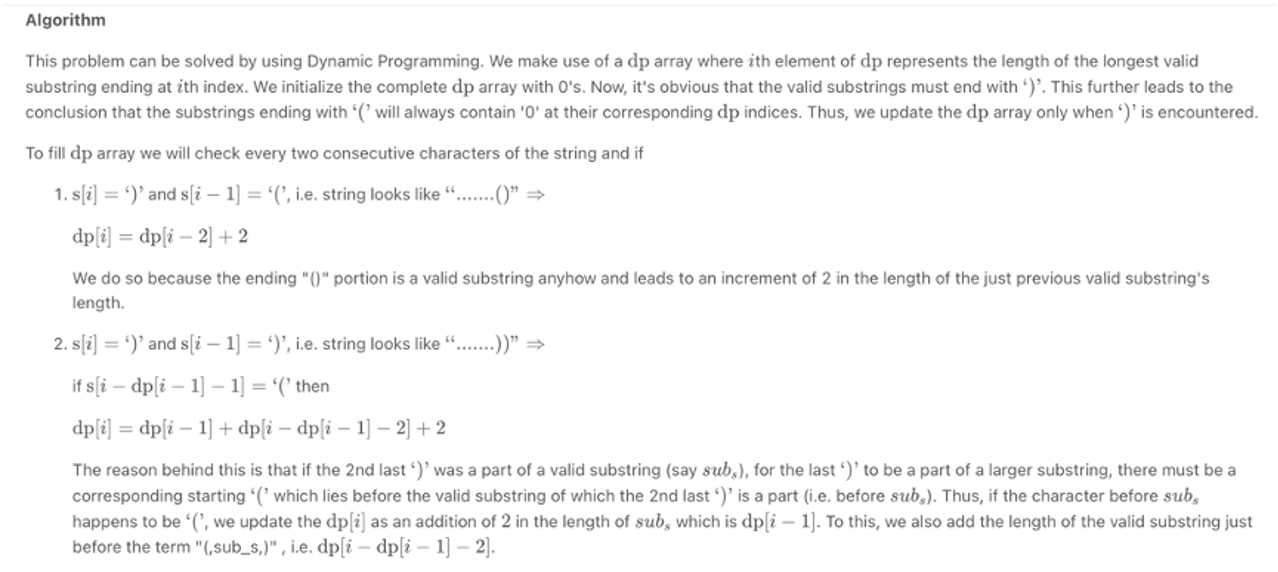
  
Algorithm (w/out extra space)

In this approach, we make use of two counters leftleft and rightright. First, we start traversing the string from the left towards the right and for every ‘(’ encountered, we increment the leftleft counter and for every ‘)’ encountered, we increment the rightright counter. Whenever leftleft becomes equal to rightright, we calculate the length of the current valid string and keep track of maximum length substring found so far. If rightright becomes greater than leftleft we reset leftleft and rightright to 00.

In [ ]:
# Java, dynamic programming
# time = space = O(n)
public class Solution {
    public int longestValidParentheses(String s) {
        int maxans = 0;
        int dp[] = new int[s.length()];
        for (int i = 1; i < s.length(); i++) {
            if (s.charAt(i) == ')') {
                if (s.charAt(i - 1) == '(') {
                    dp[i] = (i >= 2 ? dp[i - 2] : 0) + 2;
                } else if (i - dp[i - 1] > 0 && s.charAt(i - dp[i - 1] - 1) == '(') {
                    dp[i] = dp[i - 1] + ((i - dp[i - 1]) >= 2 ? dp[i - dp[i - 1] - 2] : 0) + 2;
                }
                maxans = Math.max(maxans, dp[i]);
            }
        }
        return maxans;
    }
}

In [ ]:
# Java, no extra space
# time = O(n), space = O(1)
public class Solution {
    public int longestValidParentheses(String s) {
        int left = 0, right = 0, maxlength = 0;
        for (int i = 0; i < s.length(); i++) {
            if (s.charAt(i) == '(') {
                left++;
            } else {
                right++;
            }
            if (left == right) {
                maxlength = Math.max(maxlength, 2 * right);
            } else if (right >= left) {
                left = right = 0;
            }
        }
        left = right = 0;
        for (int i = s.length() - 1; i >= 0; i--) {
            if (s.charAt(i) == '(') {
                left++;
            } else {
                right++;
            }
            if (left == right) {
                maxlength = Math.max(maxlength, 2 * left);
            } else if (left >= right) {
                left = right = 0;
            }
        }
        return maxlength;
    }
}

## 91. Decode Ways
A message containing letters from A-Z can be encoded into numbers using the following mapping:
'A' -> "1"
'B' -> "2"
...
'Z' -> "26"
To decode an encoded message, all the digits must be grouped then mapped back into letters using the reverse of the mapping above (there may be multiple ways). For example, "11106" can be mapped into:

"AAJF" with the grouping (1 1 10 6)
"KJF" with the grouping (11 10 6)
Note that the grouping (1 11 06) is invalid because "06" cannot be mapped into 'F' since "6" is different from "06".

Given a string s containing only digits, return the number of ways to decode it.

The test cases are generated so that the answer fits in a 32-bit integer.

Example 1:
Input: s = "12"
Output: 2
Explanation: "12" could be decoded as "AB" (1 2) or "L" (12).

Example 2:
Input: s = "226"
Output: 3
Explanation: "226" could be decoded as "BZ" (2 26), "VF" (22 6), or "BBF" (2 2 6).

Example 3:
Input: s = "06"
Output: 0
Explanation: "06" cannot be mapped to "F" because of the leading zero ("6" is different from "06").

Constraints:

1 <= s.length <= 100
s contains only digits and may contain leading zero(s)

__Algorithm (recursive w/memoization)__

Enter recursion with the given string i.e. start with index 0.

For the terminating case of the recursion we check for the end of the string. If we have reached the end of the string we return 1.

Every time we enter recursion it's for a substring of the original string. For any recursion if the first character is 0 then terminate that path by returning 0. Thus this path won't contribute to the number of ways.

Memoization helps to reduce the complexity which would otherwise be exponential. We check the dictionary memo to see if the result for the given substring already exists.

If the result is already in memo we return the result. Otherwise the number of ways for the given string is determined by making a recursive call to the function with index + 1 for next substring string and index + 2 after checking for valid 2-digit decode. The result is also stored in memo with key as current index, for saving for future overlapping subproblems.

__Algorithm (iterative)__

If the string s is empty or null we return the result as 0.

Initialize dp array. dp[0] = 1 to provide the baton to be passed.

If the first character of the string is zero then no decode is possible hence initialize dp[1] to 0, otherwise the first character is valid to pass on the baton, dp[1] = 1.

Iterate the dp array starting at index 2. The index i of dp is the i-th character of the string s, that is character at index i-1 of s.

We check if valid single digit decode is possible. This just means the character at index s[i-1] is non-zero. Since we do not have a decoding for zero. If the valid single digit decoding is possible then we add dp[i-1] to dp[i]. Since all the ways up to (i-1)-th character now lead up to i-th character too.

We check if valid two digit decode is possible. This means the substring s[i-2]s[i-1] is between 10 to 26. If the valid two digit decoding is possible then we add dp[i-2] to dp[i].

Once we reach the end of the dp array we would have the number of ways of decoding string s

__Algorithm (constant space)__

In Approach 2 we are using an array dp to save the results for future. As we move ahead character by character of the given string, we look back only two steps. For calculating dp[i] we need to know dp[i-1] and dp[i-2] only. Thus, we can easily cut down our O(N)O(N) space requirement to O(1)O(1) by using only two variables to store the last two results.

In [ ]:
# recirsive w/memoization
# time = space = O(n)
class Solution:

    @lru_cache(maxsize=None)
    def recursiveWithMemo(self, index, s) -> int:
        # If you reach the end of the string
        # Return 1 for success.
        if index == len(s):
            return 1

        # If the string starts with a zero, it can't be decoded
        if s[index] == '0':
            return 0

        if index == len(s)-1:
            return 1
        
        answer = self.recursiveWithMemo(index + 1, s)
        if int(s[index : index + 2]) <= 26:
            answer += self.recursiveWithMemo(index + 2, s)

        return answer

    def numDecodings(self, s: str) -> int:
        return self.recursiveWithMemo(0, s)

In [ ]:
# iterative
# time = space = O(n)
class Solution:
    def numDecodings(self, s: str) -> int:
        # Array to store the subproblem results
        dp = [0 for _ in range(len(s) + 1)]

        dp[0] = 1
        # Ways to decode a string of size 1 is 1. Unless the string is '0'.
        # '0' doesn't have a single digit decode.
        dp[1] = 0 if s[0] == '0' else 1


        for i in range(2, len(dp)):

            # Check if successful single digit decode is possible.
            if s[i - 1] != '0':
                dp[i] = dp[i - 1]

            # Check if successful two digit decode is possible.
            two_digit = int(s[i - 2 : i])
            if two_digit >= 10 and two_digit <= 26:
                dp[i] += dp[i - 2]
                
        return dp[len(s)]

In [ ]:
# constant space
# time = O(n), space O(1)
class Solution:
    def numDecodings(self, s: str) -> int:
        if s[0] == "0":
            return 0
    
        two_back = 1
        one_back = 1
        for i in range(1, len(s)):
            current = 0
            if s[i] != "0":
                current = one_back
            two_digit = int(s[i - 1: i + 1])
            if two_digit >= 10 and two_digit <= 26:
                current += two_back
            two_back = one_back
            one_back = current
        
        return one_back

## 121. Best Time to Buy and Sell Stock
You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

Example 1:
Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.

Example 2:
Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.

Constraints:

1 <= prices.length <= 10^5
0 <= prices[i] <= 10^4

Algorithm (one pass)
The points of interest are the peaks and valleys in the plotted array. We need to find the largest price following each valley, which difference could be the max profit. We can maintain two variables - minprice and maxprofit corresponding to the smallest valley and maximum profit (maximum difference between selling price and minprice) obtained so far respectively.


In [ ]:
# one pass
# time = O(n), space = O(1)
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        min_price = float('inf')
        max_profit = 0
        for i in range(len(prices)):
            if prices[i] < min_price:
                min_price = prices[i]
            elif prices[i] - min_price > max_profit:
                max_profit = prices[i] - min_price
                
        return max_profit

## 139. Word Break
Given a string s and a dictionary of strings wordDict, return true if s can be segmented into a space-separated sequence of one or more dictionary words.

Note that the same word in the dictionary may be reused multiple times in the segmentation.

Example 1:
Input: s = "leetcode", wordDict = ["leet","code"]
Output: true
Explanation: Return true because "leetcode" can be segmented as "leet code".

Example 2:
Input: s = "applepenapple", wordDict = ["apple","pen"]
Output: true
Explanation: Return true because "applepenapple" can be segmented as "apple pen apple".
Note that you are allowed to reuse a dictionary word.

Example 3:
Input: s = "catsandog", wordDict = ["cats","dog","sand","and","cat"]
Output: false

Constraints:

1 <= s.length <= 300
1 <= wordDict.length <= 1000
1 <= wordDict[i].length <= 20
s and wordDict[i] consist of only lowercase English letters.
All the strings of wordDict are unique.

__Algorithm (recursion w/memoization)__

In the previous approach we can see that many subproblems were redundant, i.e we were calling the recursive function multiple times for a particular string. To avoid this we can use memoization method, where an array memomemo is used to store the result of the subproblems. Now, when the function is called again for a particular string, value will be fetched and returned using the memomemo array, if its value has been already evaluated.

With memoization many redundant subproblems are avoided and recursion tree is pruned and thus it reduces the time complexity by a large factor.

__Algorithm (BFS)__

Another approach is to use Breadth-First-Search. Visualize the string as a tree where each node represents the prefix upto index endend. Two nodes are connected only if the substring between the indices linked with those nodes is also a valid string which is present in the dictionary. In order to form such a tree, we start with the first character of the given string (say ss) which acts as the root of the tree being formed and find every possible substring starting with that character which is a part of the dictionary. Further, the ending index (say ii) of every such substring is pushed at the back of a queue which will be used for Breadth First Search. Now, we pop an element out from the front of the queue and perform the same process considering the string s(i+1,end)s(i+1,end) to be the original string and the popped node as the root of the tree this time. This process is continued, for all the nodes appended in the queue during the course of the process. If we are able to obtain the last element of the given string as a node (leaf) of the tree, this implies that the given string can be partitioned into substrings which are all a part of the given dictionary.

__Algorithm (DP)__
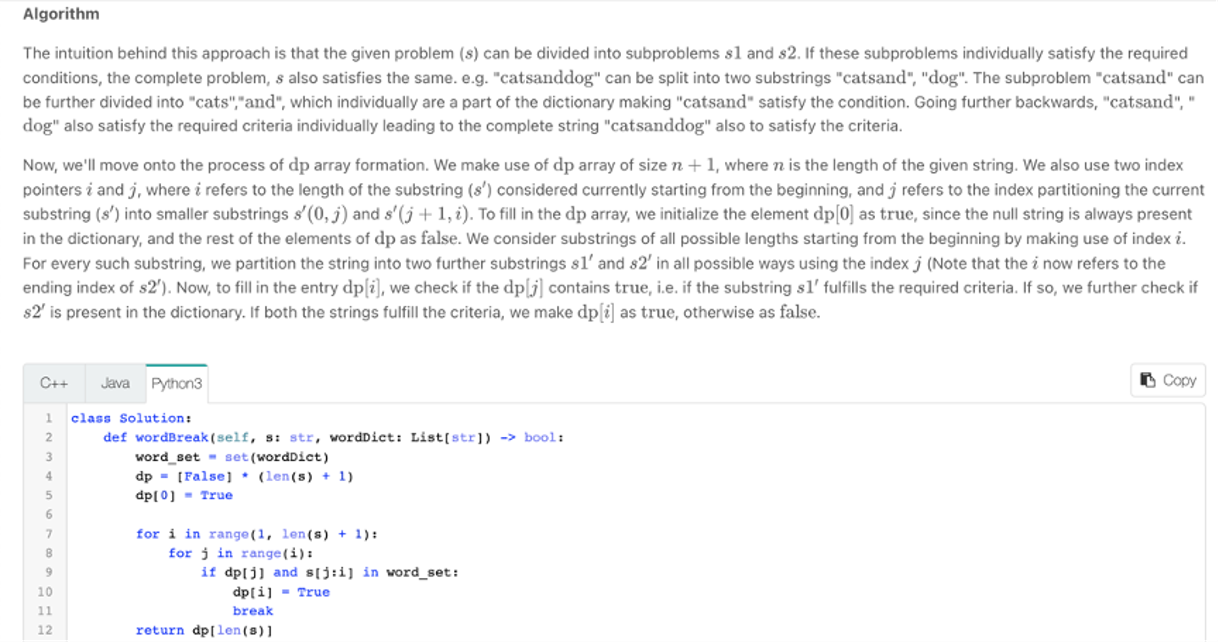

In [ ]:
# recursion w/memoization
# time = O(n^3), space = O(n)
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        @lru_cache
        def wordBreakMemo(s: str, word_dict: FrozenSet[str], start: int):
            if start == len(s):
                return True
            for end in range(start + 1, len(s) + 1):
                if s[start:end] in word_dict and wordBreakMemo(s, word_dict, end):
                    return True
            return False

        return wordBreakMemo(s, frozenset(wordDict), 0)

In [ ]:
# BFS
# time = O(n^3), space = O(n)
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        word_set = set(wordDict)
        q = deque()
        visited = set()

        q.append(0)
        while q:
            start = q.popleft()
            if start in visited:
                continue
            for end in range(start + 1, len(s) + 1):
                if s[start:end] in word_set:
                    q.append(end)
                    if end == len(s):
                        return True
            visited.add(start)
        return False

In [ ]:
# DP
# time = O(n^3), space = O(n)
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        word_set = set(wordDict)
        dp = [False] * (len(s) + 1)
        dp[0] = True

        for i in range(1, len(s) + 1):
            for j in range(i):
                if dp[j] and s[j:i] in word_set:
                    dp[i] = True
                    break
        return dp[len(s)]

## 304. Range Sum Query 2D - Immutable
Given a 2D matrix matrix, handle multiple queries of the following type:

Calculate the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).
Implement the NumMatrix class:

NumMatrix(int[][] matrix) Initializes the object with the integer matrix matrix.
int sumRegion(int row1, int col1, int row2, int col2) Returns the sum of the elements of matrix inside the rectangle defined by its upper left corner (row1, col1) and lower right corner (row2, col2).
You must design an algorithm where sumRegion works on O(1) time complexity.

Example 1:
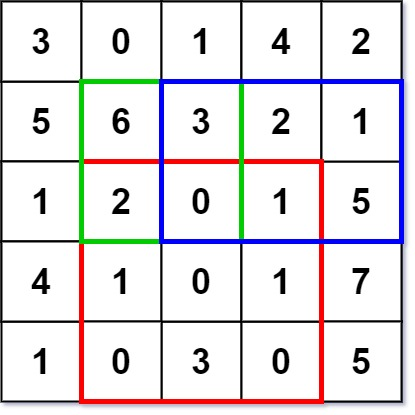
Input
["NumMatrix", "sumRegion", "sumRegion", "sumRegion"]
[[[[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]], [2, 1, 4, 3], [1, 1, 2, 2], [1, 2, 2, 4]]
Output
[null, 8, 11, 12]

Explanation
NumMatrix numMatrix = new NumMatrix([[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]]);
numMatrix.sumRegion(2, 1, 4, 3); // return 8 (i.e sum of the red rectangle)
numMatrix.sumRegion(1, 1, 2, 2); // return 11 (i.e sum of the green rectangle)
numMatrix.sumRegion(1, 2, 2, 4); // return 12 (i.e sum of the blue rectangle)

Constraints:

m == matrix.length
n == matrix[i].length
1 <= m, n <= 200
-10^4 <= matrix[i][j] <= 10^4
0 <= row1 <= row2 < m
0 <= col1 <= col2 < n
At most 10^4 calls will be made to sumRegion

In [ ]:
# Java
# time = O(mn), space = O(mn)
class NumMatrix {
    private int[][] dp;

    public NumMatrix(int[][] matrix) {
        if (matrix.length == 0 || matrix[0].length == 0) return;
        dp = new int[matrix.length + 1][matrix[0].length + 1];
        for (int r = 0; r < matrix.length; r++) {
            for (int c = 0; c < matrix[0].length; c++) {
                dp[r + 1][c + 1] = dp[r + 1][c] + dp[r][c + 1] + matrix[r][c] - dp[r][c];
            }
        }
    }

    public int sumRegion(int row1, int col1, int row2, int col2) {
        return dp[row2 + 1][col2 + 1] - dp[row1][col2 + 1] - dp[row2 + 1][col1] + dp[row1][col1];
    }
}

## 523. Continuous Subarray Sum
Given an integer array nums and an integer k, return true if nums has a continuous subarray of size at least two whose elements sum up to a multiple of k, or false otherwise.

An integer x is a multiple of k if there exists an integer n such that x = n * k. 0 is always a multiple of k.

Example 1:
Input: nums = [23,2,4,6,7], k = 6
Output: true
Explanation: [2, 4] is a continuous subarray of size 2 whose elements sum up to 6.

Example 2:
Input: nums = [23,2,6,4,7], k = 6
Output: true
Explanation: [23, 2, 6, 4, 7] is an continuous subarray of size 5 whose elements sum up to 42.
42 is a multiple of 6 because 42 = 7 * 6 and 7 is an integer.

Example 3:
Input: nums = [23,2,6,4,7], k = 13
Output: false

Constraints:

1 <= nums.length <= 10^5
0 <= nums[i] <= 10^9
0 <= sum(nums[i]) <= 2^31 - 1
1 <= k <= 2^31 - 1

Algorithm
Initialize sum \leftarrow 0, hashMap[0] \leftarrow 0, i <- 0sum←0,hashMap[0]←0,i←0.
sum += nums[i]sum+=nums[i].
If hashMaphashMap does not contain key sum \% ksum%k (this remainder modulo kk occurs for the first time) then hashMap[sum % k] <- i + 1hashMap[sum%k]←i+1, go to 5.
If hashMap[sum % k] < ihashMap[sum%k]<i (the subarray size is at least two) return true.
i += 1i+=1.
If i < nums.lengthi<nums.length go to 2.
Return false.

In [ ]:
# time = O(nums.length), space = O(min{nums.length,k})
class Solution:
    def checkSubarraySum(self, nums: List[int], k: int) -> bool:
        # initialize the hash map with index 0 for sum 0
        hash_map = {0: 0}
        s = 0
        for i in range(len(nums)):
            s += nums[i]
            # if the remainder s % k occurs for the first time
            if s % k not in hash_map:
                hash_map[s % k] = i + 1
            # if the subarray size is at least two
            elif hash_map[s % k] < i:
                return True
        return False


# Part VIII. Design

## 173. Binary Search Tree Iterator
Implement the BSTIterator class that represents an iterator over the in-order traversal of a binary search tree (BST):

BSTIterator(TreeNode root) Initializes an object of the BSTIterator class. The root of the BST is given as part of the constructor. The pointer should be initialized to a non-existent number smaller than any element in the BST.
boolean hasNext() Returns true if there exists a number in the traversal to the right of the pointer, otherwise returns false.
int next() Moves the pointer to the right, then returns the number at the pointer.
Notice that by initializing the pointer to a non-existent smallest number, the first call to next() will return the smallest element in the BST.

You may assume that next() calls will always be valid. That is, there will be at least a next number in the in-order traversal when next() is called.

Example 1:
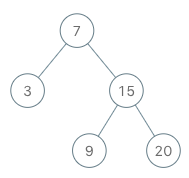
Input
["BSTIterator", "next", "next", "hasNext", "next", "hasNext", "next", "hasNext", "next", "hasNext"]
[[[7, 3, 15, null, null, 9, 20]], [], [], [], [], [], [], [], [], []]
Output
[null, 3, 7, true, 9, true, 15, true, 20, false]

Explanation
BSTIterator bSTIterator = new BSTIterator([7, 3, 15, null, null, 9, 20]);
bSTIterator.next();    // return 3
bSTIterator.next();    // return 7
bSTIterator.hasNext(); // return True
bSTIterator.next();    // return 9
bSTIterator.hasNext(); // return True
bSTIterator.next();    // return 15
bSTIterator.hasNext(); // return True
bSTIterator.next();    // return 20
bSTIterator.hasNext(); // return False

Constraints:

The number of nodes in the tree is in the range [1, 105].
0 <= Node.val <= 106
At most 105 calls will be made to hasNext, and next.
 

Follow up:

Could you implement next() and hasNext() to run in average O(1) time and use O(h) memory, where h is the height of the tree?

__Algorithm (flattening tree)__

Initialize an empty array that will contain the nodes of the binary search tree in the sorted order.
We traverse the binary search tree in the inorder fashion and for each node that we process, we add it to our array nodes. Note that before processing a node, its left subtree has to be processed (or recursed upon) and after processing a node, its right subtree has to be recursed upon.
Once we have all the nodes in an array, we simply need a pointer or an index in that array to implement the two functions next and hasNext. Whenever there's a call to hasNext, we simply check if the index has reached the end of the array or not. For the call to next function, we simply return the element pointed by the index. Also, after a the next function call is made, we have to move the index one step forward to simulate the progress of our iterator.

__Algorithm (controlled recursion)__

Initialize an empty stack S which will be used to simulate the inorder traversal for our binary search tree. Note that we will be following the same approach for inorder traversal as before except that now we will be using our own stack rather than the system stack. Since we are using a custom data structure, we can pause and resume the recursion at will.

Let's also consider a helper function that we will be calling again and again in the implementation. This function, called _inorder_left will essentially add all the nodes in the leftmost branch of the tree rooted at the given node root to the stack and it will keep on doing so until there is no left child of the root node. Something like the following code:

def inorder_left(root):
   while (root):
     S.append(root)
     root = root.left
For a given node root, the next smallest element will always be the leftmost element in its tree. So, for a given root node, we keep on following the leftmost branch until we reach a node which doesn't have a left child and that will be the next smallest element. For the root of our BST, this leftmost node would be the smallest node in the tree. Rest of the nodes are added to the stack because they are pending processing. Try and relate this with a dry run of a simple recursive inorder traversal and things will make a bit more sense.

The first time next() function call is made, the smallest element of the BST has to be returned and then our simulated recursion has to move one step forward i.e. move onto the next smallest element in the BST. The invariant that will be maintained in this algorithm is that the stack top always contains the element to be returned for the next() function call. However, there is additional work that needs to be done to maintain that invariant. It's very easy to implement the hasNext() function since all we need to check is if the stack is empty or not. So, we will only focus on the next() call from now.

Initially, given the root node of the BST, we call the function _inorder_left and that ensures our invariant holds. Let's see this first step with an example.

Suppose we get a call to the next() function. The node which we have to return i.e. the next smallest element in the binary search tree iterator is the one sitting at the top of our stack. So, for the example above, that node would be 2 which is the correct value. Now, there are two possibilities that we have to deal with:

One is where the node at the top of the stack is actually a leaf node. This is the best case and here we don't have to do anything. Simply pop the node off the stack and return its value. So, this would be a constant time operation.

Second is where the node has a right child. We don't need to check for the left child because of the way we have added nodes onto the stack. The topmost node either won't have a left child or would already have the left subtree processed. If it has a right child, then we call our helper function on the node's right child. This would comparatively be a costly operation depending upon the structure of the tree.

We keep on maintaining the invariant this way in the function call for next and this way we will always be able to return the next smallest element in the BST from the top of the stack. Again, it's important to understand that obtaining the next smallest element doesn't take much time. However, some time is spent in maintaining the invariant that the stack top will always have the node we are looking for

In [ ]:
# flattening tree
# time = space = O(n)

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class BSTIterator:

    def __init__(self, root: TreeNode):

        # Array containing all the nodes in the sorted order
        self.nodes_sorted = []

        # Pointer to the next smallest element in the BST
        self.index = -1

        # Call to flatten the input binary search tree
        self._inorder(root)

    def _inorder(self, root):
        if not root:
            return
        self._inorder(root.left)
        self.nodes_sorted.append(root.val)
        self._inorder(root.right)

    def next(self) -> int:
        """
        @return the next smallest number
        """
        self.index += 1
        return self.nodes_sorted[self.index]

    def hasNext(self) -> bool:
        """
        @return whether we have a next smallest number
        """
        return self.index + 1 < len(self.nodes_sorted)

In [ ]:
# controlled recursion
# time = space = O(n)

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class BSTIterator:

    def __init__(self, root: TreeNode):

        # Stack for the recursion simulation
        self.stack = []

        # Remember that the algorithm starts with a call to the helper function
        # with the root node as the input
        self._leftmost_inorder(root)

    def _leftmost_inorder(self, root):

        # For a given node, add all the elements in the leftmost branch of the tree
        # under it to the stack.
        while root:
            self.stack.append(root)
            root = root.left

    def next(self) -> int:
        """
        @return the next smallest number
        """

        # Node at the top of the stack is the next smallest element
        topmost_node = self.stack.pop()

        # Need to maintain the invariant. If the node has a right child, call the
        # helper function for the right child
        if topmost_node.right:
            self._leftmost_inorder(topmost_node.right)
        return topmost_node.val

    def hasNext(self) -> bool:
        """
        @return whether we have a next smallest number
        """
        return len(self.stack) > 0

## 211. Add and Search Word - Data structure design
### This solution uses a standard trie (as opposed to bitwise trie)
Design a data structure that supports adding new words and finding if a string matches any previously added string.

Implement the WordDictionary class:

WordDictionary() Initializes the object.
void addWord(word) Adds word to the data structure, it can be matched later.
bool search(word) Returns true if there is any string in the data structure that matches word or false otherwise. word may contain dots '.' where dots can be matched with any letter.

Example:
Input
["WordDictionary","addWord","addWord","addWord","search","search","search","search"]
[[],["bad"],["dad"],["mad"],["pad"],["bad"],[".ad"],["b.."]]
Output
[null,null,null,null,false,true,true,true]

Explanation
WordDictionary wordDictionary = new WordDictionary();
wordDictionary.addWord("bad");
wordDictionary.addWord("dad");
wordDictionary.addWord("mad");
wordDictionary.search("pad"); // return False
wordDictionary.search("bad"); // return True
wordDictionary.search(".ad"); // return True
wordDictionary.search("b.."); // return True

Constraints:

1 <= word.length <= 25
word in addWord consists of lowercase English letters.
word in search consist of '.' or lowercase English letters.
There will be at most 3 dots in word for search queries.
At most 104 calls will be made to addWord and search.

Algorithm

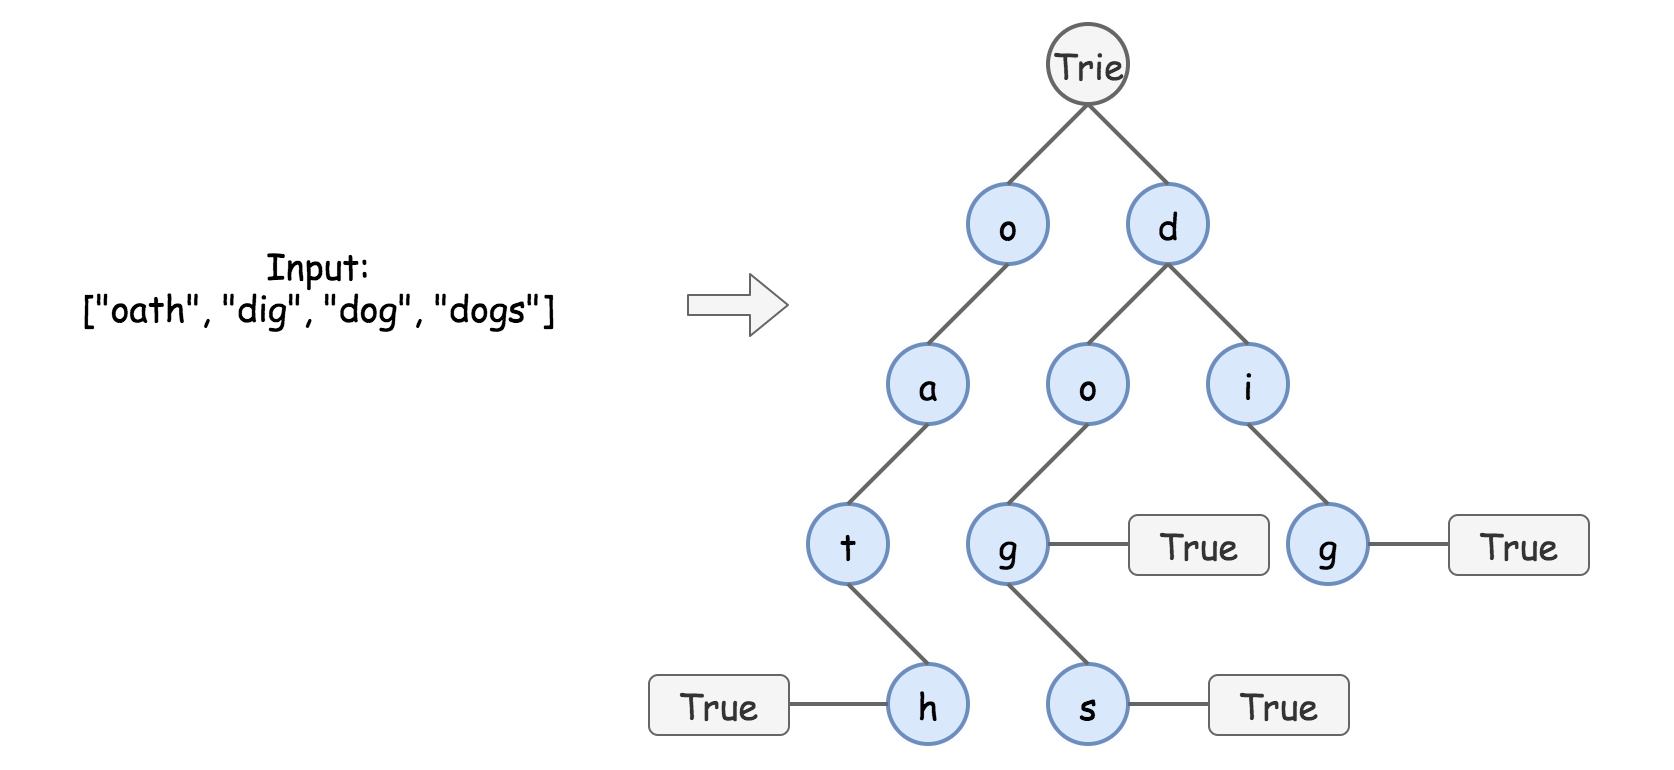

In trie, each path from the root to the "word" node represents one of the input words, for example, o -> a -> t -> h is "oath".

Trie implementation is pretty straightforward, it's basically nested hashmaps. At each step, one has to verify, if the child node to add is already present. If yes, just go one step down. If not, add it into the trie and then go one step down

In [ ]:
# time = space = O(M)
class WordDictionary:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.trie = {}


    def addWord(self, word: str) -> None:
        """
        Adds a word into the data structure.
        """
        node = self.trie

        for ch in word:
            if not ch in node:
                node[ch] = {}
            node = node[ch]
        node['$'] = True

    def search(self, word: str) -> bool:
        """
        Returns if the word is in the data structure. A word could contain the dot character '.' to represent any letter.
        """
        def search_in_node(word, node) -> bool:
            for i, ch in enumerate(word):
                if not ch in node:
                    # if the current character is '.'
                    # check all possible nodes at this level
                    if ch == '.':
                        for x in node:
                            if x != '$' and search_in_node(word[i + 1:], node[x]):
                                return True
                    # if no nodes lead to answer
                    # or the current character != '.'
                    return False
                # if the character is found
                # go down to the next level in trie
                else:
                    node = node[ch]
            return '$' in node

        return search_in_node(word, self.trie)

## 421. Maximum XOR of Two Numbers in an Array
### This solution uses a bitwise trie (as opposed to standard trie)
Given an integer array nums, return the maximum result of nums[i] XOR nums[j], where 0 <= i <= j < n.

Example 1:
Input: nums = [3,10,5,25,2,8]
Output: 28
Explanation: The maximum result is 5 XOR 25 = 28.

Example 2:
Input: nums = [14,70,53,83,49,91,36,80,92,51,66,70]
Output: 127

Constraints:

1 <= nums.length <= 2 * 105
0 <= nums[i] <= 231 - 1

Algorithm

To summarise, now one could

Insert a number into Bitwise Trie.

Find maximum XOR of a given number with all numbers that have been inserted so far.

That's all one needs to solve the initial problem:

Convert all numbers to the binary form.

Add the numbers into Trie one by one and compute the maximum XOR of a number to add with all previously inserted. Update maximum XOR at each step.

Return max_xor.

In [ ]:
# time = O(n), swpace = O(1)
class Solution:
    def findMaximumXOR(self, nums: List[int]) -> int:
        # Compute length L of max number in a binary representation
        L = len(bin(max(nums))) - 2
        # zero left-padding to ensure L bits for each number
        nums = [[(x >> i) & 1 for i in range(L)][::-1] for x in nums]
        
        max_xor = 0
        trie = {}
        for num in nums:
            node = trie
            xor_node = trie
            curr_xor = 0
            for bit in num:
                # insert new number in trie
                if not bit in node:
                    node[bit] = {}
                node = node[bit]
                
                # to compute max xor of that new number 
                # with all previously inserted
                toggled_bit = 1 - bit
                if toggled_bit in xor_node:
                    curr_xor = (curr_xor << 1) | 1
                    xor_node = xor_node[toggled_bit]
                else:
                    curr_xor = curr_xor << 1
                    xor_node = xor_node[bit]
                    
            max_xor = max(max_xor, curr_xor)

        return max_xor

# Part XIX. Other

## 282. Expression Add Operators
Given a string num that contains only digits and an integer target, return all possibilities to insert the binary operators '+', '-', and/or '*' between the digits of num so that the resultant expression evaluates to the target value.

Note that operands in the returned expressions should not contain leading zeros.
 

Example 1:
Input: num = "123", target = 6
Output: ["1*2*3","1+2+3"]
Explanation: Both "1*2*3" and "1+2+3" evaluate to 6.

Example 2:
Input: num = "232", target = 8
Output: ["2*3+2","2+3*2"]
Explanation: Both "2*3+2" and "2+3*2" evaluate to 8.

Example 3:
Input: num = "3456237490", target = 9191
Output: []
Explanation: There are no expressions that can be created from "3456237490" to evaluate to 9191.

Constraints:

1 <= num.length <= 10
num consists of only digits.
-2^31 <= target <= 2^31 - 1


   Hide Hint #1  
Note that a number can contain multiple digits.
   Hide Hint #2  
Since the question asks us to find all of the valid expressions, we need a way to iterate over all of them. (Hint: Recursion!)
   Hide Hint #3  
We can keep track of the expression string and evaluate it at the very end. But that would take a lot of time. Can we keep track of the expression's value as well so as to avoid the evaluation at the very end of recursion?
   Hide Hint #4  
Think carefully about the multiply operator. It has a higher precedence than the addition and subtraction operators.
1 + 2 = 3
1 + 2 - 4 --> 3 - 4 --> -1
1 + 2 - 4 * 12 --> -1 * 12 --> -12 (WRONG!)
1 + 2 - 4 * 12 --> -1 - (-4) + (-4 * 12) --> 3 + (-48) --> -45 (CORRECT!)
   Hide Hint #5  
We simply need to keep track of the last operand in our expression and reverse it's effect on the expression's value while considering the multiply operator.

Algorithm

Let's quickly look at the steps involved in our backtracking algorithm before looking at the pseudo-code.

As discussed above, we have multiple choices of what operators to use and what the operands can be and hence, we have to look at all the possibilities to find all valid expressions.
Our recursive call will have an index which represents the current digit we're looking at in the original nums string and also the expression string built till now.
At every step, we have exactly 4 different recursive calls. The NO OP call simply extends the current_operand by the current digit and moves ahead. Rest of the recursive calls correspond to +, -, and *.
We keep on building our expression like this and eventually, the entire nums string would be processed. At that time we check if the expression we built till now is a valid expression or not and we record it if it is a valid one.
1. procedure recurse(digits, index, expression):
2.     if we have reached the end of the string:
3.         if the expression evaluates to the target:
4.             Valid Expression found!
5.     else:
6.         try out operator 'NO OP' and recurse
7.         try out operator * and recurse
8.         try out operator + and recurse
9.         try out operator - and recurse

In [ ]:
# time = O(N×(4^N)), space = O(N) where N = nums.length
class Solution:
    def addOperators(self, num: 'str', target: 'int') -> 'List[str]':

        N = len(num)
        answers = []
        def recurse(index, prev_operand, current_operand, value, string):

            # Done processing all the digits in num
            if index == N:

                # If the final value == target expected AND
                # no operand is left unprocessed
                if value == target and current_operand == 0:
                    answers.append("".join(string[1:]))
                return

            # Extending the current operand by one digit
            current_operand = current_operand*10 + int(num[index])
            str_op = str(current_operand)

            # To avoid cases where we have 1 + 05 or 1 * 05 since 05 won't be a
            # valid operand. Hence this check
            if current_operand > 0:

                # NO OP recursion
                recurse(index + 1, prev_operand, current_operand, value, string)

            # ADDITION
            string.append('+'); string.append(str_op)
            recurse(index + 1, current_operand, 0, value + current_operand, string)
            string.pop();string.pop()

            # Can subtract or multiply only if there are some previous operands
            if string:

                # SUBTRACTION
                string.append('-'); string.append(str_op)
                recurse(index + 1, -current_operand, 0, value - current_operand, string)
                string.pop();string.pop()

                # MULTIPLICATION
                string.append('*'); string.append(str_op)
                recurse(index + 1, current_operand * prev_operand, 0, value - prev_operand + (current_operand * prev_operand), string)
                string.pop();string.pop()
        recurse(0, 0, 0, 0, [])    
        return answers

## 438. Find All Anagrams in a String
Given two strings s and p, return an array of all the start indices of p's anagrams in s. You may return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

Example 1:
Input: s = "cbaebabacd", p = "abc"
Output: [0,6]
Explanation:
The substring with start index = 0 is "cba", which is an anagram of "abc".
The substring with start index = 6 is "bac", which is an anagram of "abc".

Example 2:
Input: s = "abab", p = "ab"
Output: [0,1,2]
Explanation:
The substring with start index = 0 is "ab", which is an anagram of "ab".
The substring with start index = 1 is "ba", which is an anagram of "ab".
The substring with start index = 2 is "ab", which is an anagram of "ab".

Constraints:

1 <= s.length, p.length <= 3 * 10^4
s and p consist of lowercase English letters

__Algorithm (sliding window w/hashmap)

Build reference counter pCount for string p.

Move sliding window along the string s:

Recompute sliding window counter sCount at each step by adding one letter on the right and removing one letter on the left.

If sCount == pCount, update the output list.

Return output list.

__Algorithm (sliding window w/array)__

Hashmap is quite complex structure, with known performance issues in Java. Let's implement approach 1 using 26-elements array instead of hashmap

Build reference array pCount for string p.

Move sliding window along the string s:

Recompute sliding window array sCount at each step by adding one letter on the right and removing one letter on the left.

If sCount == pCount, update the output list.

Return output list

In [ ]:
# sliding window w/hashmap
# time = O(s.length), space = O(K) where K = max possible # distinct chars (26)
from collections import Counter
class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        ns, np = len(s), len(p)
        if ns < np:
            return []

        p_count = Counter(p)
        s_count = Counter()
        
        output = []
        # sliding window on the string s
        for i in range(ns):
            # add one more letter 
            # on the right side of the window
            s_count[s[i]] += 1
            # remove one letter 
            # from the left side of the window
            if i >= np:
                if s_count[s[i - np]] == 1:
                    del s_count[s[i - np]]
                else:
                    s_count[s[i - np]] -= 1
            # compare array in the sliding window
            # with the reference array
            if p_count == s_count:
                output.append(i - np + 1)
        
        return output

In [ ]:
# sliding window w/array
# time = O(s.length), space = O(K) where K = max possible # distinct chars (26)
class Solution:
    def findAnagrams(self, s: str, p: str) -> List[int]:
        ns, np = len(s), len(p)
        if ns < np:
            return []

        p_count, s_count = [0] * 26, [0] * 26
        # build reference array using string p
        for ch in p:
            p_count[ord(ch) - ord('a')] += 1
        
        output = []
        # sliding window on the string s
        for i in range(ns):
            # add one more letter 
            # on the right side of the window
            s_count[ord(s[i]) - ord('a')] += 1
            # remove one letter 
            # from the left side of the window
            if i >= np:
                s_count[ord(s[i - np]) - ord('a')] -= 1
            # compare array in the sliding window
            # with the reference array
            if p_count == s_count:
                output.append(i - np + 1)
        
        return output

## 567. Permutation in String (is it same as 438)
Given two strings s1 and s2, return true if s2 contains a permutation of s1, or false otherwise.

In other words, return true if one of s1's permutations is the substring of s2.

Example 1:
Input: s1 = "ab", s2 = "eidbaooo"
Output: true
Explanation: s2 contains one permutation of s1 ("ba").

Example 2:
Input: s1 = "ab", s2 = "eidboaoo"
Output: false

Constraints:

1 <= s1.length, s2.length <= 10^4
s1 and s2 consist of lowercase English letters

In [ ]:
# Java
# time = O(l_1+(l_2-l_1)), space = O(1) where l_1 = len string s_1 and l_2 = len string s_2
public class Solution {
    public boolean checkInclusion(String s1, String s2) {
        if (s1.length() > s2.length())
            return false;
        int[] s1map = new int[26];
        int[] s2map = new int[26];
        for (int i = 0; i < s1.length(); i++) {
            s1map[s1.charAt(i) - 'a']++;
            s2map[s2.charAt(i) - 'a']++;
        }

        int count = 0;
        for (int i = 0; i < 26; i++) {
            if (s1map[i] == s2map[i])
                count++;
        }

        for (int i = 0; i < s2.length() - s1.length(); i++) {
            int r = s2.charAt(i + s1.length()) - 'a', l = s2.charAt(i) - 'a';
            if (count == 26)
                return true;
            s2map[r]++;
            if (s2map[r] == s1map[r]) {
                count++;
            } else if (s2map[r] == s1map[r] + 1) {
                count--;
            }
            s2map[l]--;
            if (s2map[l] == s1map[l]) {
                count++;
            } else if (s2map[l] == s1map[l] - 1) {
                count--;
            }
        }
        return count == 26;
    }
}

## 953. Verifying an Alien Dictionary
In an alien language, surprisingly, they also use English lowercase letters, but possibly in a different order. The order of the alphabet is some permutation of lowercase letters.

Given a sequence of words written in the alien language, and the order of the alphabet, return true if and only if the given words are sorted lexicographically in this alien language.

Example 1:
Input: words = ["hello","leetcode"], order = "hlabcdefgijkmnopqrstuvwxyz"
Output: true
Explanation: As 'h' comes before 'l' in this language, then the sequence is sorted.

Example 2:
Input: words = ["word","world","row"], order = "worldabcefghijkmnpqstuvxyz"
Output: false
Explanation: As 'd' comes after 'l' in this language, then words[0] > words[1], hence the sequence is unsorted.

Example 3:
Input: words = ["apple","app"], order = "abcdefghijklmnopqrstuvwxyz"
Output: false
Explanation: The first three characters "app" match, and the second string is shorter (in size.) According to lexicographical rules "apple" > "app", because 'l' > '∅', where '∅' is defined as the blank character which is less than any other character (More info).

Constraints:

1 <= words.length <= 100
1 <= words[i].length <= 20
order.length == 26
All characters in words[i] and order are English lowercase letters

Algorithm

Initialize a hashmap/array to record the relations between each letter and its ranking in order.
Iterate over words and compare each pair of adjacent words.
Iterate over each letter to find the first different letter between words[i] and words[i + 1].
If words[i + 1] ends before words[i] and no different letters are found, then we need to return false because words[i + 1] should come before words[i] (for example, apple and app).
If we find the first different letter and the two words are in the correct order, then we can exit from the current iteration and proceed to the next pair of words.
If we find the first different letter and the two words are in the wrong order, then we can safely return false.
If we reach this point, it means that we have examined all pairs of adjacent words and that they are all sorted. Therefore we can return true

In [ ]:
# time = O(M), space = O(1) where M = total # chars in words
class Solution:
    def isAlienSorted(self, words: List[str], order: str) -> bool:
        order_map = {}
        for index, val in enumerate(order):
            order_map[val] = index

        for i in range(len(words) - 1):

            for j in range(len(words[i])):
                # If we do not find a mismatch letter between words[i] and words[i + 1],
                # we need to examine the case when words are like ("apple", "app").
                if j >= len(words[i + 1]): return False

                if words[i][j] != words[i + 1][j]:
                    if order_map[words[i][j]] > order_map[words[i + 1][j]]: return False
                    # if we find the first different character and they are sorted,
                    # then there's no need to check remaining letters
                    break

        return True

## 986. Interval List Intersections
You are given two lists of closed intervals, firstList and secondList, where firstList[i] = [starti, endi] and secondList[j] = [startj, endj]. Each list of intervals is pairwise disjoint and in sorted order.

Return the intersection of these two interval lists.

A closed interval [a, b] (with a <= b) denotes the set of real numbers x with a <= x <= b.

The intersection of two closed intervals is a set of real numbers that are either empty or represented as a closed interval. For example, the intersection of [1, 3] and [2, 4] is [2, 3].

Example 1:

Input: firstList = [[0,2],[5,10],[13,23],[24,25]], secondList = [[1,5],[8,12],[15,24],[25,26]]
Output: [[1,2],[5,5],[8,10],[15,23],[24,24],[25,25]]

Example 2:
Input: firstList = [[1,3],[5,9]], secondList = []
Output: []

Constraints:

0 <= firstList.length, secondList.length <= 1000
firstList.length + secondList.length >= 1
0 <= start_i < end_i <= 10^9
end_i < start_i+1
0 <= start_j < end_j <= 10^9
end_j < startj+1

Algorithm

If A[0] has the smallest endpoint, it can only intersect B[0]. After, we can discard A[0] since it cannot intersect anything else.

Similarly, if B[0] has the smallest endpoint, it can only intersect A[0], and we can discard B[0] after since it cannot intersect anything else.

We use two pointers, i and j, to virtually manage "discarding" A[0] or B[0] repeatedly.

In [ ]:
# time = O(M+N), where M, N are the lengths of A and B, respectively
class Solution:
    def intervalIntersection(self, A: List[List[int]], B: List[List[int]]) -> List[List[int]]:
        ans = []
        i = j = 0

        while i < len(A) and j < len(B):
            # Let's check if A[i] intersects B[j].
            # lo - the startpoint of the intersection
            # hi - the endpoint of the intersection
            lo = max(A[i][0], B[j][0])
            hi = min(A[i][1], B[j][1])
            if lo <= hi:
                ans.append([lo, hi])

            # Remove the interval with the smallest endpoint
            if A[i][1] < B[j][1]:
                i += 1
            else:
                j += 1

        return ans

# Part X. SQL

## 176. Second Highest Salary

Solution
Table: Employee

`
+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| salary      | int  |
+-------------+------+`

id is the primary key column for this table.
Each row of this table contains information about the salary of an employee.
 

Write an SQL query to report the second highest salary from the Employee table. If there is no second highest salary, the query should report null.

The query result format is in the following example.

 

Example 1:

Input: 
Employee table:

`
+----+--------+
| id | salary |
+----+--------+
| 1  | 100    |
| 2  | 200    |
| 3  | 300    |
+----+--------+`

Output: 

`
+---------------------+
| SecondHighestSalary |
+---------------------+
| 200                 |
+---------------------+`

Example 2:

Input: 
Employee table:

`
+----+--------+
| id | salary |
+----+--------+
| 1  | 100    |
+----+--------+
`

Output: 

`
+---------------------+
| SecondHighestSalary |
+---------------------+
| null                |
+---------------------+`

In [ ]:
SELECT DISTINCT
    Salary AS SecondHighestSalary
FROM
    Employee
ORDER BY Salary DESC
LIMIT 1 OFFSET 1

## 177. Nth Highest Salary
Table: Employee

`
+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| salary      | int  |
+-------------+------+`

id is the primary key column for this table.
Each row of this table contains information about the salary of an employee.
 

Write an SQL query to report the nth highest salary from the Employee table. If there is no nth highest salary, the query should report null.

The query result format is in the following example.

 

Example 1:

Input: 
Employee table:

`
+----+--------+
| id | salary |
+----+--------+
| 1  | 100    |
| 2  | 200    |
| 3  | 300    |
+----+--------+`

n = 2
Output: 

`
+------------------------+
| getNthHighestSalary(2) |
+------------------------+
| 200                    |
+------------------------+`

Example 2:

Input: 
Employee table:

`
+----+--------+
| id | salary |
+----+--------+
| 1  | 100    |
+----+--------+`

n = 2
Output: 

`
+------------------------+
| getNthHighestSalary(2) |
+------------------------+
| null                   |
+------------------------+`

No official solution on Leetcode (see Leetcode discussions)

## 183. Customers Who Never Order

Solution
Table: Customers

`
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| name        | varchar |
+-------------+---------+`

id is the primary key column for this table.
Each row of this table indicates the ID and name of a customer.
 

Table: Orders

`
+-------------+------+
| Column Name | Type |
+-------------+------+
| id          | int  |
| customerId  | int  |
+-------------+------+`

id is the primary key column for this table.
customerId is a foreign key of the ID from the Customers table.
Each row of this table indicates the ID of an order and the ID of the customer who ordered it.

Write an SQL query to report all customers who never order anything.

Return the result table in any order.

The query result format is in the following example.

Example 1:

Input: 
Customers table:

`
+----+-------+
| id | name  |
+----+-------+
| 1  | Joe   |
| 2  | Henry |
| 3  | Sam   |
| 4  | Max   |
+----+-------+`

Orders table:

`
+----+------------+
| id | customerId |
+----+------------+
| 1  | 3          |
| 2  | 1          |
+----+------------+`

Output: 

`
+-----------+
| Customers |
+-----------+
| Henry     |
| Max       |
+-----------+`

In [ ]:
select customers.name as 'Customers'
from customers
where customers.id not in
(
    select customerid from orders
);

## 597. Friend Requests I: Overall Acceptance Rate

Solution
Table: FriendRequest

`
+----------------+---------+
| Column Name    | Type    |
+----------------+---------+
| sender_id      | int     |
| send_to_id     | int     |
| request_date   | date    |
+----------------+---------+`

There is no primary key for this table, it may contain duplicates.
This table contains the ID of the user who sent the request, the ID of the user who received the request, and the date of the request.
 

Table: RequestAccepted

`
+----------------+---------+
| Column Name    | Type    |
+----------------+---------+
| requester_id   | int     |
| accepter_id    | int     |
| accept_date    | date    |
+----------------+---------+`

There is no primary key for this table, it may contain duplicates.
This table contains the ID of the user who sent the request, the ID of the user who received the request, and the date when the request was accepted.
 

Write an SQL query to find the overall acceptance rate of requests, which is the number of acceptance divided by the number of requests. Return the answer rounded to 2 decimals places.

Note that:

The accepted requests are not necessarily from the table friend_request. In this case, Count the total accepted requests (no matter whether they are in the original requests), and divide it by the number of requests to get the acceptance rate.
It is possible that a sender sends multiple requests to the same receiver, and a request could be accepted more than once. In this case, the ‘duplicated’ requests or acceptances are only counted once.
If there are no requests at all, you should return 0.00 as the accept_rate.
The query result format is in the following example.

 

Example 1:

Input: 
FriendRequest table:

`
+-----------+------------+--------------+
| sender_id | send_to_id | request_date |
+-----------+------------+--------------+
| 1         | 2          | 2016/06/01   |
| 1         | 3          | 2016/06/01   |
| 1         | 4          | 2016/06/01   |
| 2         | 3          | 2016/06/02   |
| 3         | 4          | 2016/06/09   |
+-----------+------------+--------------+`

RequestAccepted table:

`
+--------------+-------------+-------------+
| requester_id | accepter_id | accept_date |
+--------------+-------------+-------------+
| 1            | 2           | 2016/06/03  |
| 1            | 3           | 2016/06/08  |
| 2            | 3           | 2016/06/08  |
| 3            | 4           | 2016/06/09  |
| 3            | 4           | 2016/06/10  |
+--------------+-------------+-------------+`

Output: 

`
+-------------+
| accept_rate |
+-------------+
| 0.8         |
+-------------+`

Explanation: 
There are 4 unique accepted requests, and there are 5 requests in total. So the rate is 0.80.
 

Follow up:

Could you write a query to return the acceptance rate for every month?
Could you write a query to return the cumulative acceptance rate for every day?


   Hint #1  
Still remember how to count the number of rows in a table?
      
   Hint #2  
What is the keyword to filter the duplicated records in a table?


In [ ]:
SELECT
ROUND(
    IFNULL(
    (SELECT COUNT(*) FROM (SELECT DISTINCT requester_id, accepter_id FROM RequestAccepted) AS A)
    /
    (SELECT COUNT(*) FROM (SELECT DISTINCT sender_id, send_to_id FROM FriendRequest) AS B),
    0)
, 2) AS accept_rate;

## 602. Friend Requests II: Who Has the Most Friends
Table: RequestAccepted

`
+----------------+---------+
| Column Name    | Type    |
+----------------+---------+
| requester_id   | int     |
| accepter_id    | int     |
| accept_date    | date    |
+----------------+---------+`

(requester_id, accepter_id) is the primary key for this table.
This table contains the ID of the user who sent the request, the ID of the user who received the request, and the date when the request was accepted.
 

Write an SQL query to find the people who have the most friends and the most friends number.

The test cases are generated so that only one person has the most friends.

The query result format is in the following example.

 

Example 1:

Input: 
RequestAccepted table:

`
+--------------+-------------+-------------+
| requester_id | accepter_id | accept_date |
+--------------+-------------+-------------+
| 1            | 2           | 2016/06/03  |
| 1            | 3           | 2016/06/08  |
| 2            | 3           | 2016/06/08  |
| 3            | 4           | 2016/06/09  |
+--------------+-------------+-------------+`

Output: 

`
+----+-----+
| id | num |
+----+-----+
| 3  | 3   |
+----+-----+`

Explanation: 
The person with id 3 is a friend of people 1, 2, and 4, so he has three friends in total, which is the most number than any others.
 

Follow up: In the real world, multiple people could have the same most number of friends. Could you find all these people in this case?

   Hint #1  
Being friends is bidirectional. If you accept someone's adding friend request, both you and the other person will have one more friend.

No official solution on Leetcode (see Leetcode discussions for this problem)

## 185. Department Top Three Salaries
Table: Employee

`
+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| id           | int     |
| name         | varchar |
| salary       | int     |
| departmentId | int     |
+--------------+---------+`

id is the primary key column for this table.
departmentId is a foreign key of the ID from the Department table.
Each row of this table indicates the ID, name, and salary of an employee. It also contains the ID of their department.
 

Table: Department

`
+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| name        | varchar |
+-------------+---------+`

id is the primary key column for this table.
Each row of this table indicates the ID of a department and its name.

A company's executives are interested in seeing who earns the most money in each of the company's departments. A high earner in a department is an employee who has a salary in the top three unique salaries for that department.

Write an SQL query to find the employees who are high earners in each of the departments.

Return the result table in any order.

The query result format is in the following example.

Example 1:

Input: 
Employee table:

`
+----+-------+--------+--------------+
| id | name  | salary | departmentId |
+----+-------+--------+--------------+
| 1  | Joe   | 85000  | 1            |
| 2  | Henry | 80000  | 2            |
| 3  | Sam   | 60000  | 2            |
| 4  | Max   | 90000  | 1            |
| 5  | Janet | 69000  | 1            |
| 6  | Randy | 85000  | 1            |
| 7  | Will  | 70000  | 1            |
+----+-------+--------+--------------+`

Department table:

`
+----+-------+
| id | name  |
+----+-------+
| 1  | IT    |
| 2  | Sales |
+----+-------+`

Output: 

`
+------------+----------+--------+
| Department | Employee | Salary |
+------------+----------+--------+
| IT         | Max      | 90000  |
| IT         | Joe      | 85000  |
| IT         | Randy    | 85000  |
| IT         | Will     | 70000  |
| Sales      | Henry    | 80000  |
| Sales      | Sam      | 60000  |
+------------+----------+--------+`


Explanation: 
In the IT department:
- Max earns the highest unique salary
- Both Randy and Joe earn the second-highest unique salary
- Will earns the third-highest unique salary

In the Sales department:
- Henry earns the highest salary
- Sam earns the second-highest salary
- There is no third-highest salary as there are only two employees

In [ ]:
SELECT
    d.Name AS 'Department', e1.Name AS 'Employee', e1.Salary
FROM
    Employee e1
        JOIN
    Department d ON e1.DepartmentId = d.Id
WHERE
    3 > (SELECT
            COUNT(DISTINCT e2.Salary)
        FROM
            Employee e2
        WHERE
            e2.Salary > e1.Salary
                AND e1.DepartmentId = e2.DepartmentId
        )
;

## Check the Google notebook for the following problems that are also in Facebook Section  
5. Longest Palindromic Substring  
17. Letter Combinations of a Phone Number  
34. Find First and Last Position of Element in Sorted Array  
56. Merge Intervals  
146. LRU Cache  
247. Strobogrammatic Number II  
297. Serialize and Deserialize Binary Tree